# CHILDES Dataset Analysis

Comparing the different languages within the CHILDES dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotnine as p9
import numpy as np

from datasets import load_dataset, get_dataset_config_names
from tqdm import tqdm

DATASET_PATH = '../CHILDES-dataset'

sns.set_theme(style="whitegrid")
p9.theme_set(p9.theme_light())

/Users/zebulongoriely/Documents/UniDocs/PHD/research/projects/CorpusPhonemizers/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
languages = get_dataset_config_names(DATASET_PATH)
print('Languages:', languages)
datasets = {language : load_dataset(DATASET_PATH, language, split='train') for language in languages}
# Filter each dataset by is_child = False
datasets = {language : dataset.filter(lambda x: x['is_child'] == False) for language, dataset in datasets.items()}
# Convert each language to a pandas dataframe
for language, dataset in tqdm(datasets.items()):
    # Keep only num_tokens, target_child_age, phonemized_utterance and character_split_utterance
    datasets[language] = dataset.to_pandas()
    datasets[language] = datasets[language][['num_tokens', 'target_child_age', 'phonemized_utterance', 'character_split_utterance']]

Languages: ['English', 'EnglishUK', 'French', 'German', 'Spanish', 'Dutch', 'Mandarin', 'Japanese', 'Cantonese', 'Estonian', 'Croatian', 'Danish', 'Basque', 'Hungarian', 'Turkish', 'Farsi', 'Icelandic', 'Indonesian', 'Irish', 'Welsh', 'Korean', 'Swedish', 'Norwegian', 'Quechua', 'Catalan', 'Italian', 'PortuguesePt', 'PortugueseBr', 'Romanian', 'Serbian', 'Polish']


100%|██████████| 31/31 [02:28<00:00,  4.80s/it]


In [3]:
# Load family of each language

families = {
    'Basque' : 'Isolate',
    'Cantonese' : 'Sinitic', # Sino-Tibetan
    'Catalan' : 'Italic',  # Indo-European
    'Croatian' : 'Balto-Slavic', # Indo-European
    'Danish' : 'Germanic',  # Indo-European
    'Dutch' : 'Germanic',  # Indo-European
    'English' : 'Germanic',  # Indo-European
    'EnglishUK' : 'Germanic',  # Indo-European
    'Estonian' : 'Uralic',
    'Farsi' : 'Indo-Iranian', # Indo-European
    'French' : 'Italic',  # Indo-European
    'German' : 'Germanic',  # Indo-European
    'Hungarian' : 'Uralic',
    'Icelandic' : 'Germanic',  # Indo-European
    'Indonesian' : 'Austronesian',
    'Irish' : 'Celtic', # Indo-European
    'Italian' : 'Italic',  # Indo-European
    'Japanese' : 'Japonic',
    'Korean' : 'Koreanic',
    'Mandarin' : 'Sinitic', # Sino-Tibetan
    'Norwegian' : 'Germanic',  # Indo-European
    'Polish' : 'Balto-Slavic', # Indo-European
    'PortugueseBr' : 'Italic',  # Indo-European
    'PortuguesePt' : 'Italic',  # Indo-European
    'Quechua' : 'Quechuan',
    'Romanian' : 'Italic',  # Indo-European
    'Serbian' : 'Balto-Slavic', # Indo-European
    'Spanish' : 'Italic',  # Indo-European
    'Swedish' : 'Germanic',  # Indo-European
    'Turkish' : 'Turkic',
    'Welsh' : 'Celtic', # Indo-European
}

families = {
    'Basque' : 'Isolate',
    'Cantonese' : 'Sino-Tibetan',
    'Catalan' : 'Indo-European',  # Indo-European
    'Croatian' : 'Indo-European', # Indo-European
    'Danish' : 'Indo-European',  # Indo-European
    'Dutch' : 'Indo-European',  # Indo-European
    'English' : 'Indo-European',  # Indo-European
    'EnglishUK' : 'Indo-European',  # Indo-European
    'Estonian' : 'Uralic',
    'Farsi' : 'Indo-European', # Indo-European
    'French' : 'Indo-European',  # Indo-European
    'German' : 'Indo-European',  # Indo-European
    'Hungarian' : 'Uralic',
    'Icelandic' : 'Indo-European',  # Indo-European
    'Indonesian' : 'Austronesian',
    'Irish' : 'Indo-European', # Indo-European
    'Italian' : 'Indo-European',  # Indo-European
    'Japanese' : 'Japonic',
    'Korean' : 'Koreanic',
    'Mandarin' : 'Sino-Tibetan', # Sino-Tibetan
    'Norwegian' : 'Indo-European',  # Indo-European
    'Polish' : 'Indo-European', # Indo-European
    'PortugueseBr' : 'Indo-European',  # Indo-European
    'PortuguesePt' : 'Indo-European',  # Indo-European
    'Quechua' : 'Quechuan',
    'Romanian' : 'Indo-European',  # Indo-European
    'Serbian' : 'Indo-European', # Indo-European
    'Spanish' : 'Indo-European',  # Indo-European
    'Swedish' : 'Indo-European',  # Indo-European
    'Turkish' : 'Turkic',
    'Welsh' : 'Indo-European', # Indo-European
}

languages_classification = {
    'English': 'analytic',
    'EnglishUK': 'analytic',
    'French': 'analytic',
    'German': 'somewhat synthetic',
    'Spanish': 'somewhat synthetic',
    'Dutch': 'analytic',
    'Mandarin': 'isolating',
    'Japanese': 'somewhat synthetic',
    'Cantonese': 'isolating',
    'Estonian': 'very synthetic',
    'Croatian': 'very synthetic',
    'Danish': 'analytic',
    'Basque': 'very synthetic',
    'Hungarian': 'very synthetic',
    'Turkish': 'very synthetic',
    'Farsi': 'analytic',
    'Icelandic': 'very synthetic',
    'Indonesian': 'isolating',
    'Irish': 'very synthetic',
    'Welsh': 'somewhat synthetic',
    'Korean': 'somewhat synthetic',
    'Swedish': 'analytic',
    'Norwegian': 'analytic',
    'Quechua': 'very synthetic',
    'Catalan': 'somewhat synthetic',
    'Italian': 'somewhat synthetic',
    'PortuguesePt': 'somewhat synthetic',
    'PortugueseBr': 'somewhat synthetic',
    'Romanian': 'somewhat synthetic',
    'Serbian': 'very synthetic',
    'Polish': 'very synthetic'
}

languages_classification = {
    'English': 'analytical',
    'EnglishUK': 'analytical',
    'French': 'analytical',
    'German': 'synthetic',
    'Spanish': 'synthetic',
    'Dutch': 'analytical',
    'Mandarin': 'analytical',
    'Japanese': 'synthetic',
    'Cantonese': 'analytical',
    'Estonian': 'synthetic',
    'Croatian': 'synthetic',
    'Danish': 'analytical',
    'Basque': 'synthetic',
    'Hungarian': 'synthetic',
    'Turkish': 'synthetic',
    'Farsi': 'analytical',
    'Icelandic': 'synthetic',
    'Indonesian': 'analytical',
    'Irish': 'synthetic',
    'Welsh': 'synthetic',
    'Korean': 'synthetic',
    'Swedish': 'analytical',
    'Norwegian': 'analytical',
    'Quechua': 'synthetic',
    'Catalan': 'synthetic',
    'Italian': 'synthetic',
    'PortuguesePt': 'synthetic',
    'PortugueseBr': 'synthetic',
    'Romanian': 'synthetic',
    'Serbian': 'synthetic',
    'Polish': 'synthetic'
}


In [4]:
properties = pd.DataFrame(columns=['language', 'n_utterances', 'n_words', 'n_phonemes', 'unique_words'])
#properties.set_index('language', inplace=True)
#properties.index.name = 'language'

for language, dataset in datasets.items():
    lines = list(dataset['phonemized_utterance'])
    n_utterances = len(lines)
    word_counts = [utterance.count('WORD_BOUNDARY') for utterance in lines]
    n_words = sum(word_counts)
    n_phonemes = sum(len(utterance.split(' ')) - word_count for utterance, word_count in zip(lines, word_counts))
    unique_words = [w.strip() for w in ' '.join(lines).split('WORD_BOUNDARY')]
    unique_words = len(set(unique_words))

    properties.loc[len(properties)] = [language, n_utterances, n_words, n_phonemes, unique_words]

properties

language  n_utterances  n_words  n_phonemes  unique_words
0        English       1645797  7096724    22107530         35687
1      EnglishUK       1246211  5170088    15710280         22450
2         French        432133  1995063     5510523         17395
3         German        860297  3967699    14821727         58193
4        Spanish        288372  1278748     4553819         23714
5          Dutch        261938  1106865     3585608         20287
6       Mandarin        323940  1506344     4721486          8740
7       Japanese        557215  1773816     7100307         43014
8      Cantonese        136727   591314     1425686          3594
9       Estonian        103343   544680     2226518         27743
10      Croatian         55288   214949      805530         12146
11        Danish         48976   192527      579972          4844
12        Basque         36614   135866      565633         11900
13     Hungarian         36272   147334      588934         13669
14       Turkish         14487    43823      230737          6412
15         Farsi         13467    28080      115089          3352
16     Icelandic         50657   197519      751804          9775
17    Indonesian        534525  1587847     6369991         21404
18         Irish         18256    88388      280906          4029
19         Welsh         55871   269295      785569          6323
20        Korean         66576   201078     1074044         26999
21       Swedish         85299   396800     1242615          9274
22     Norwegian         35547   175952      559340          8138
23       Quechua         13425    33102      204692          7527
24       Catalan         56588   248999      839462         10305
25       Italian         57542   264479      996701          9375
26  PortuguesePt         81444   368032     1117010         11053
27  PortugueseBr         12471    91484      303998          4384
28      Romanian         31550   110067      380577          5858
29       Serbian        226266   827808     3067397         24959
30        Polish         80412   381940     1599152         31569

In [5]:
written_properties = pd.DataFrame(columns=['language', 'n_utterances', 'n_words', 'n_characters', 'unique_words'])
#properties.set_index('language', inplace=True)
#properties.index.name = 'language'

for language, dataset in datasets.items():
    lines = list(dataset['character_split_utterance'])
    n_utterances = len(lines)
    word_counts = [utterance.count('WORD_BOUNDARY') for utterance in lines]
    n_words = sum(word_counts)
    n_characters = sum(len(utterance.split(' ')) - word_count for utterance, word_count in zip(lines, word_counts))
    unique_words = [w.strip() for w in ' '.join(lines).split('WORD_BOUNDARY')]
    unique_words = len(set(unique_words))

    written_properties.loc[len(written_properties)] = [language, n_utterances, n_words, n_characters, unique_words]

written_properties

language  n_utterances  n_words  n_characters  unique_words
0        English       1645797  7096726      29087132         70462
1      EnglishUK       1246211  5170089      21504259         43959
2         French        432133  2427196       8303872         21629
3         German        860297  4827996      17563554         59251
4        Spanish        288372  1567127       5079524         25913
5          Dutch        261938  1368803       4392044         19890
6       Mandarin        323940  1849836       2368230         11945
7       Japanese        557215  2330459       8200823         43483
8      Cantonese        136727   737809       1056112          4585
9       Estonian        103343   648023       2458728         27854
10      Croatian         55288   270237        864606         12163
11        Danish         48976   241503        713810          4899
12        Basque         36614   172480        655233         11016
13     Hungarian         36272   183606        677189         13788
14       Turkish         14487    58310        246667          6455
15         Farsi         13467    41547        130812          3373
16     Icelandic         50657   248176        824458         10611
17    Indonesian        534525  2122372       7185350         21484
18         Irish         18256   106644        366610          4290
19         Welsh         55871   325166        940653          6846
20        Korean         66576   267653        555980         27714
21       Swedish         85299   482099       1386343          9600
22     Norwegian         35547   211499        628596          8399
23       Quechua         13425    46527        226957          7568
24       Catalan         56588   305587        954997         10503
25       Italian         57542   322021       1113780          9592
26  PortuguesePt         81444   449476       1372094          9144
27  PortugueseBr         12471   103955        363224          3907
28      Romanian         31550   141616        435826          5993
29       Serbian        226266  1054074       3286990         24986
30        Polish         80412   462352       1858858         30690

## Dataset Properties

In [6]:
def plot_two_counts(data, property_1, property_2, property_1_label, property_2_label, type='scatter'):
     """ Plots a scatter plot of property_2 against property_1 for each language in the dataset """
     data = data.copy()

     # Plot average utterance length as a red dashed line
     gradient = data[property_2] / data[property_1]
     gradient = gradient.mean()
     min_1 = data[property_1].min()
     max_1 = data[property_1].max()

     if type == 'scatter':
          # Plot as interactive plotly plot
          fig = px.scatter(data, x=property_1, y=property_2, text=data.language)
          fig.update_traces(textposition='top center')
          fig.update_layout(#title='Number of utterances vs number of words in CHILDES datasets',
                         xaxis_title=f'Number of {property_1_label}',
                         yaxis_title=f'Number of {property_2_label}',
                         xaxis_type='log',
                         yaxis_type='log',
                         height=800)
          fig.add_shape(type='line',
                    x0=min_1,
                    y0=min_1 * gradient,
                    x1=max_1,
                    y1=max_1 * gradient,
                    line=dict(color='red', dash='dash', width=1))                  
          fig.show()

     if type == 'scatter-p9':
          # Plot as a p9 plot
          p = (p9.ggplot(data.reset_index(), p9.aes(x=property_1, y=property_2, label='language'))
               + p9.geom_point()
               + p9.geom_text(size=8, nudge_y=0.1)
               #+ p9.geom_abline(intercept=0, slope=gradient, linetype='dashed', color='red')
               + p9.geom_smooth(method='lm')
               + p9.scale_x_log10()
               + p9.scale_y_log10()
               + p9.theme(figure_size=(12, 8))
               #+ p9.ggtitle(f'Number of {property_1_label} vs number of {property_2_label} in CHILDES datasets')
               + p9.xlab(f'Number of {property_1_label}')
               + p9.ylab(f'Number of {property_2_label}')
          )

          p.show()

     if type == 'bar':
          data['average'] = data[property_2] / data[property_1]
          p = (p9.ggplot(data.reset_index(), p9.aes(x='language', y='average'))
               + p9.geom_bar(stat='identity')
               + p9.geom_hline(yintercept=data['average'].mean(), linetype='dashed', color='red')
               + p9.scale_y_continuous(limits=(0, None), expand=(0, 0))
               + p9.coord_cartesian(ylim=(0, None))
               + p9.coord_flip()
               + p9.theme(figure_size=(12, 8))
               #+ p9.ggtitle(f'Average number of {property_2_label} per {property_1_label} in CHILDES datasets')
               + p9.xlab('Language')
               + p9.ylab(f'Average number of {property_2_label} per {property_1_label}')
          )

          p.show()


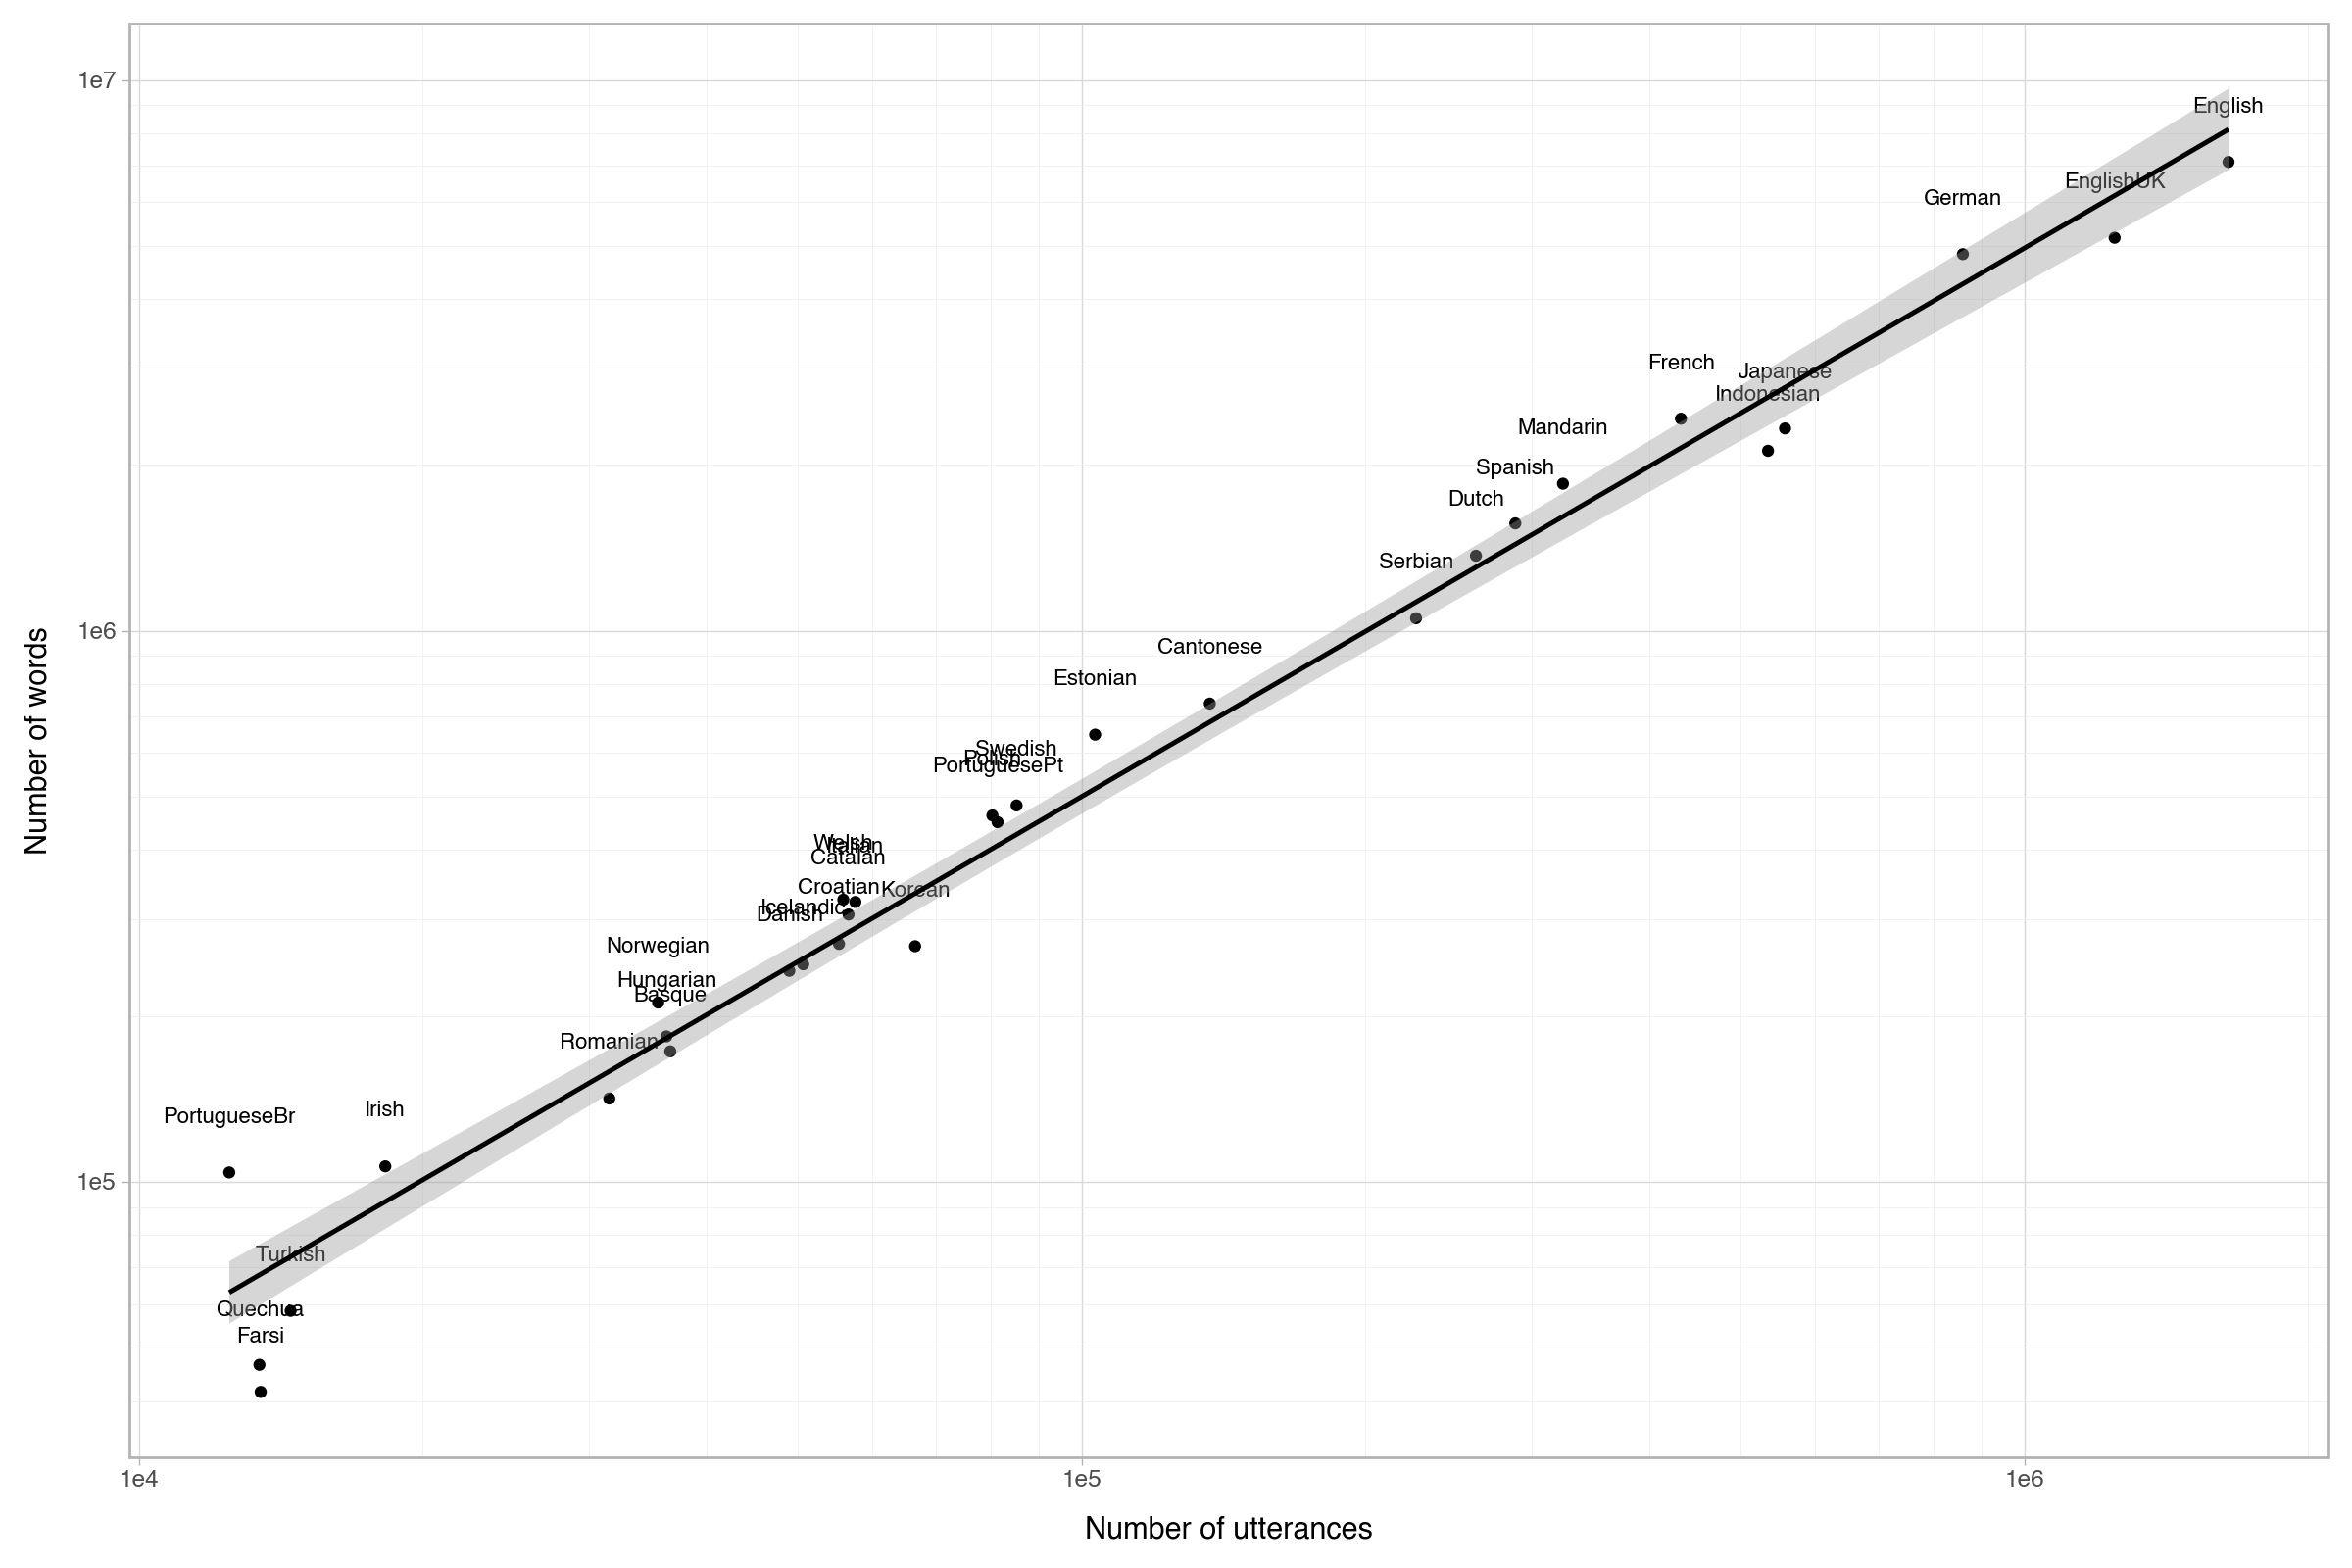

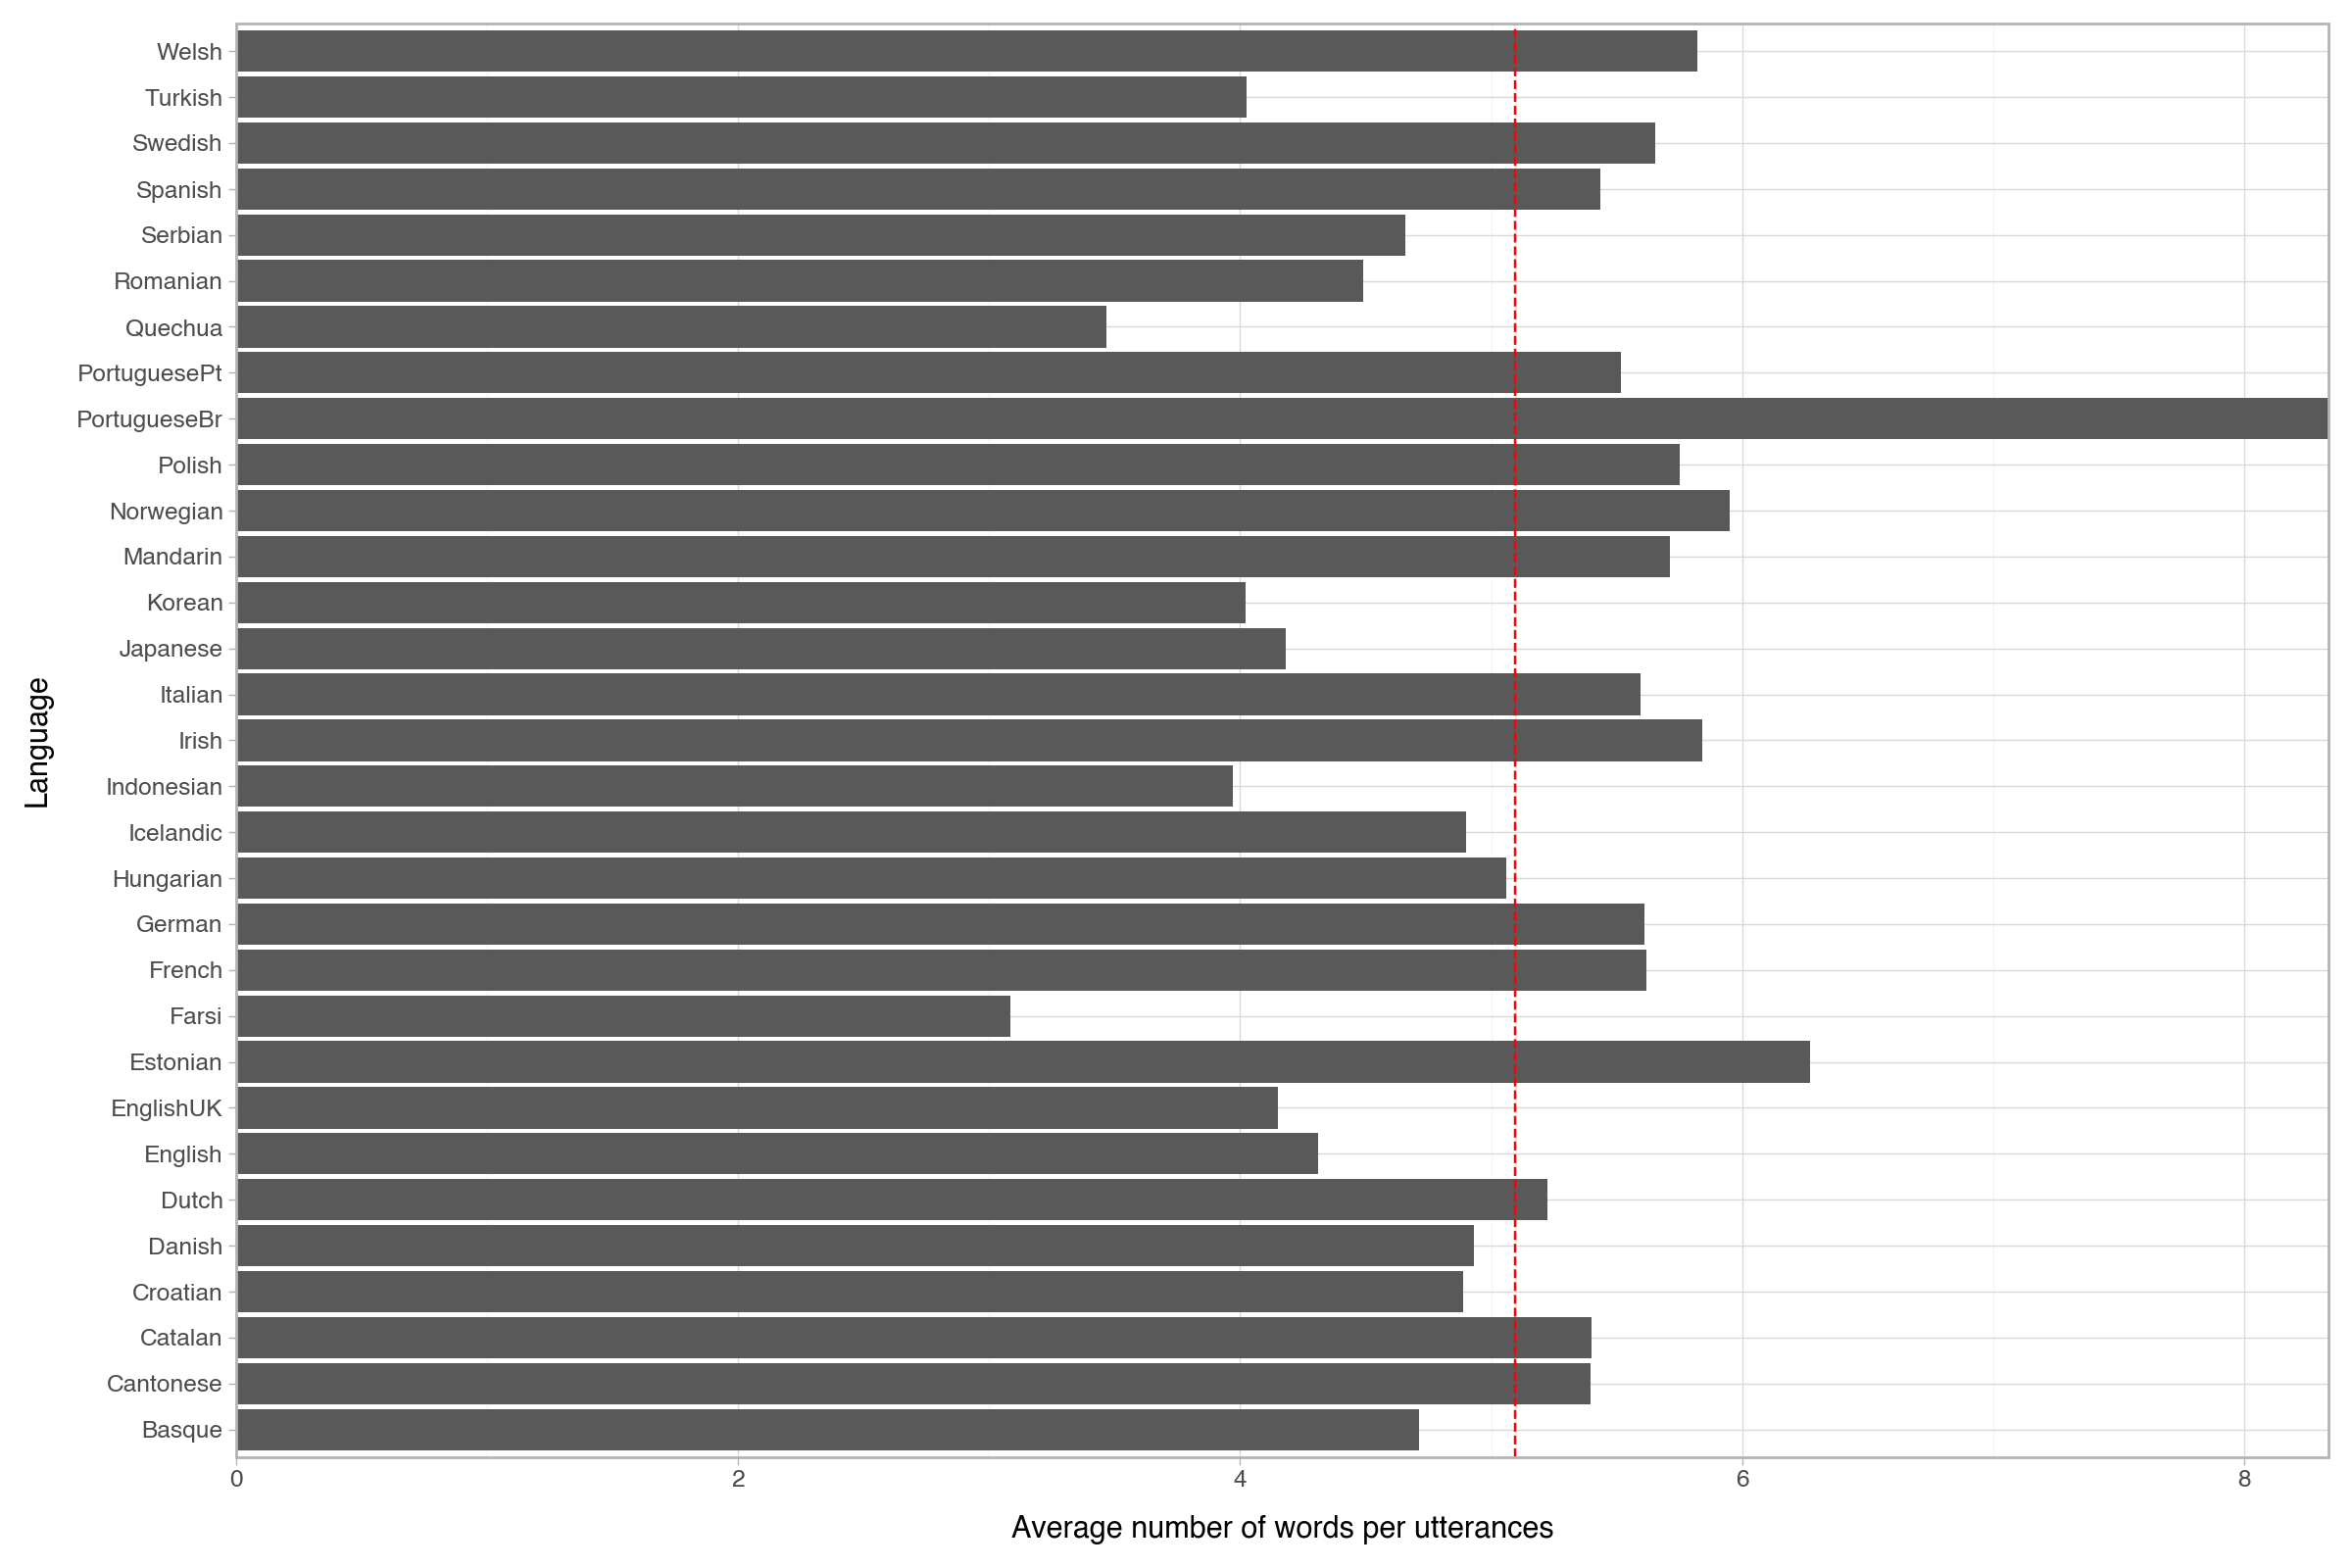

In [7]:
plot_two_counts(written_properties, 'n_utterances', 'n_words', 'utterances', 'words', type='scatter-p9')
plot_two_counts(written_properties, 'n_utterances', 'n_words', 'utterances', 'words', type='bar')

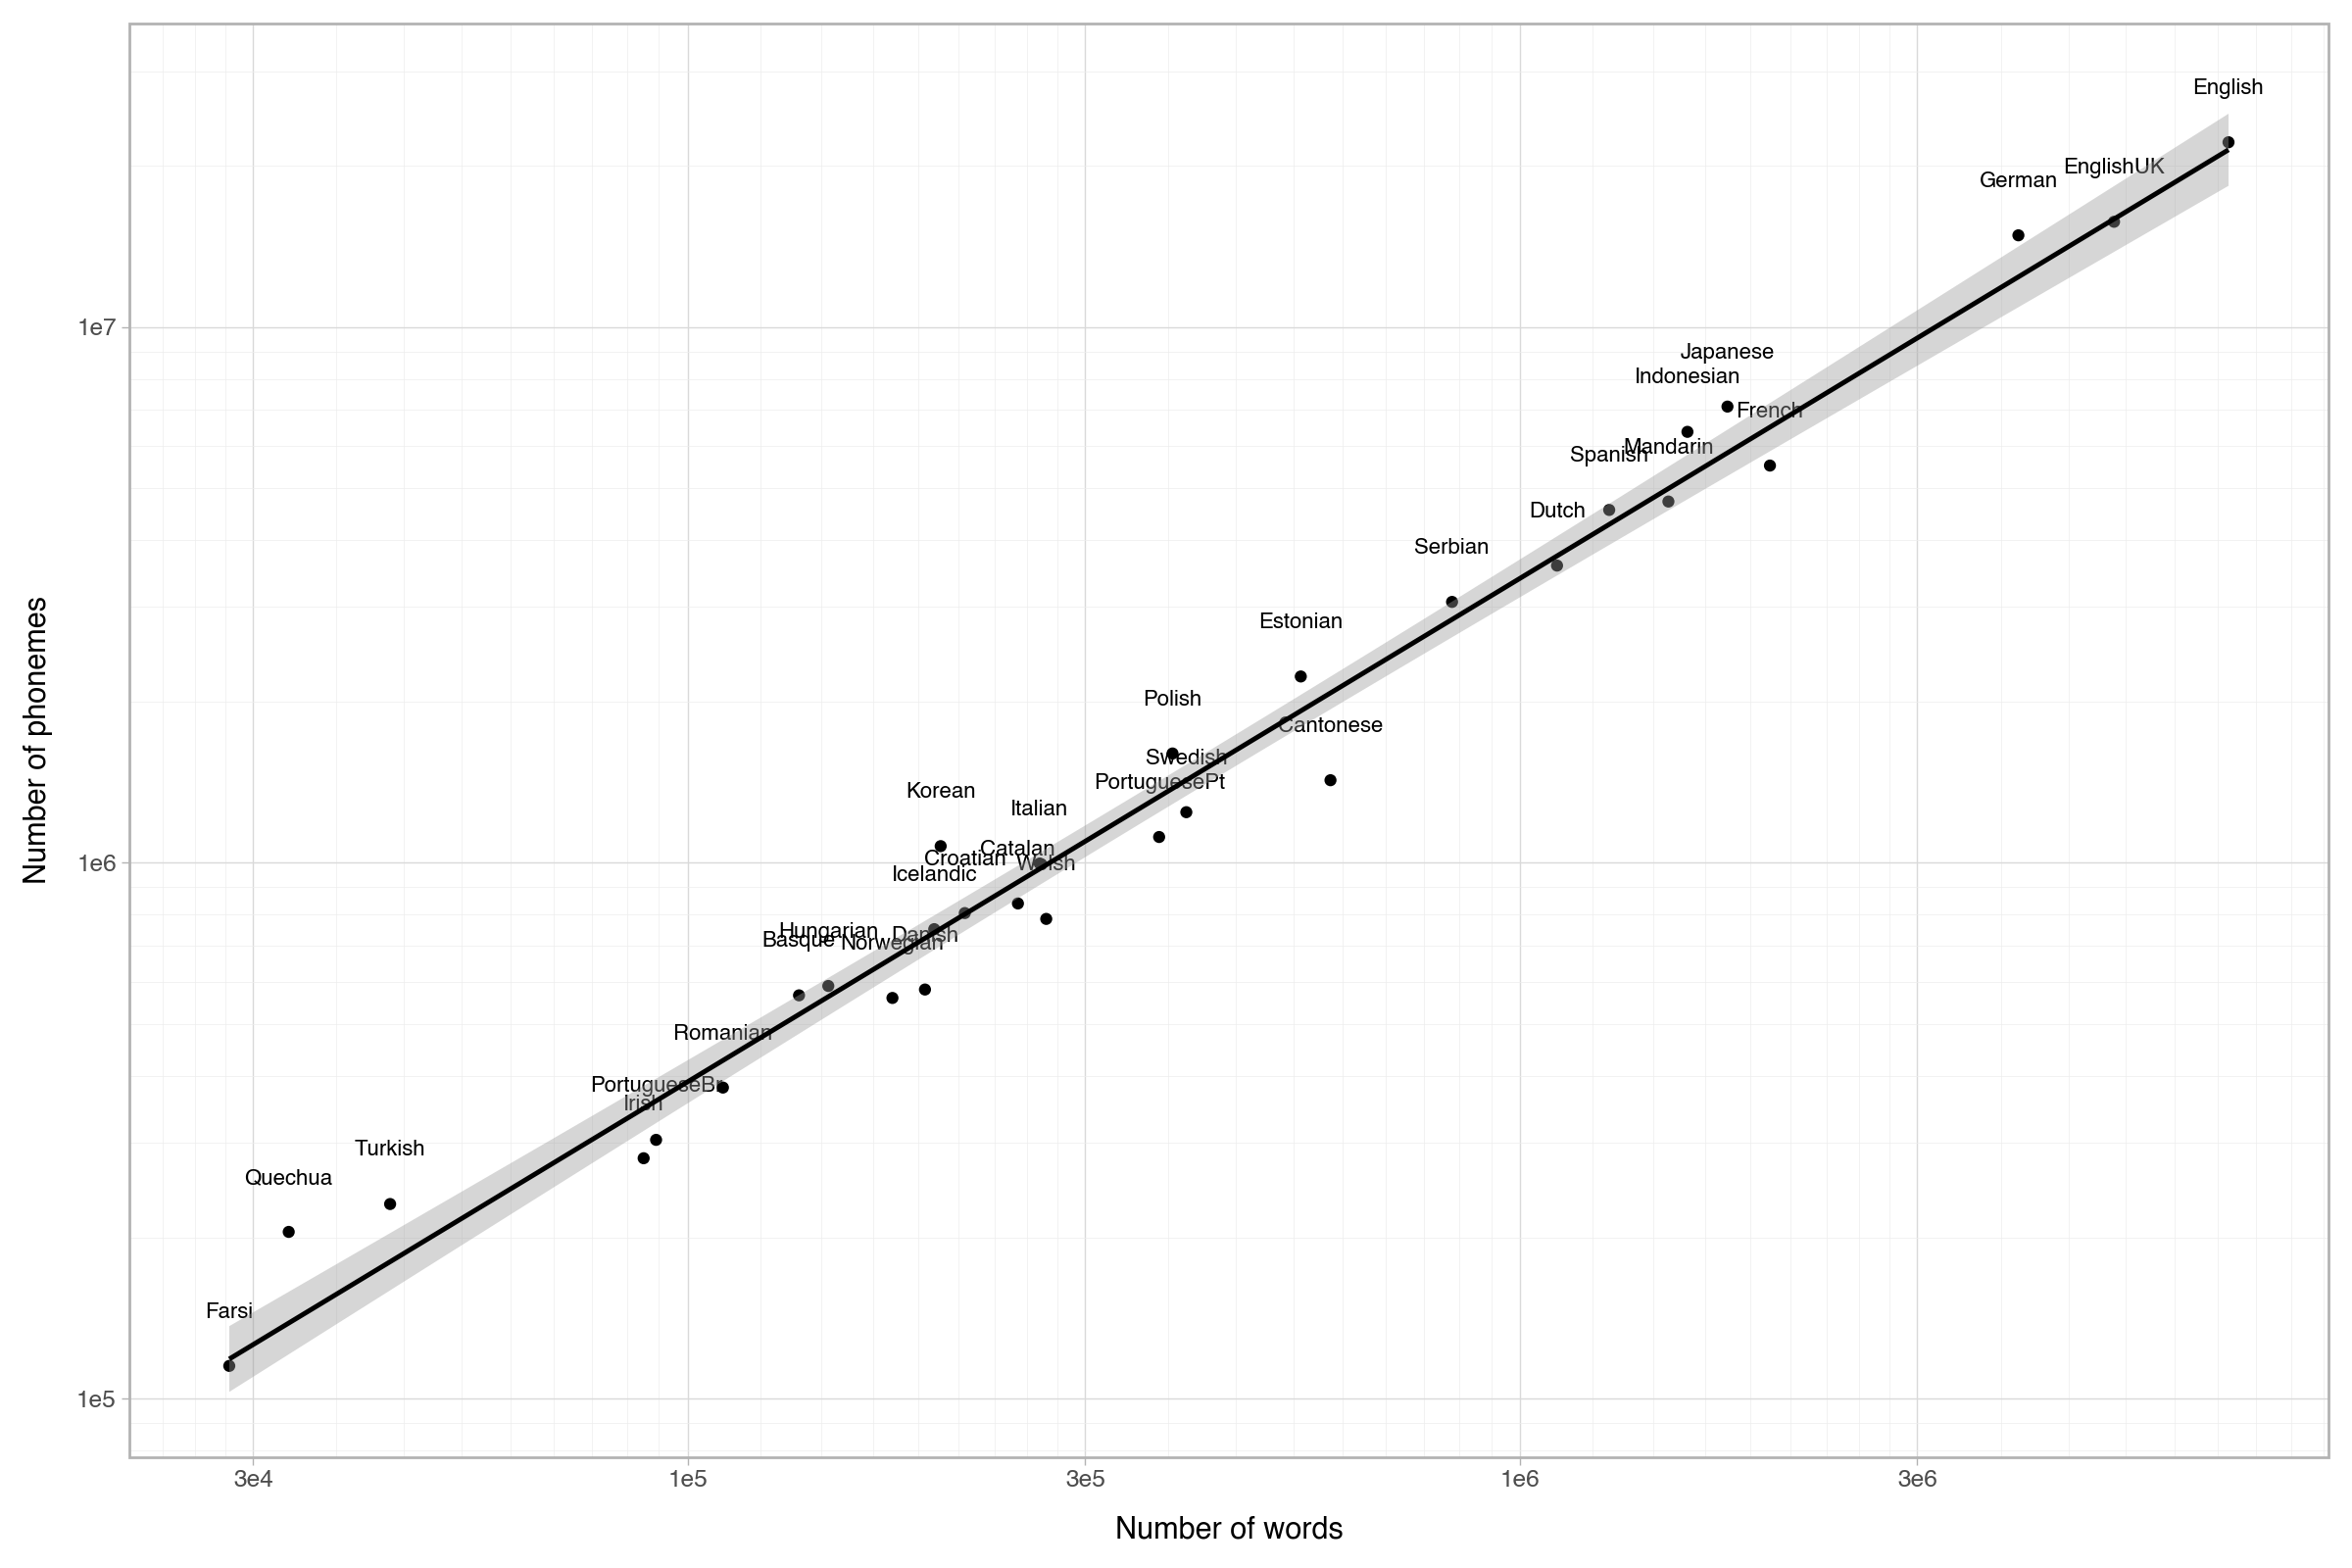

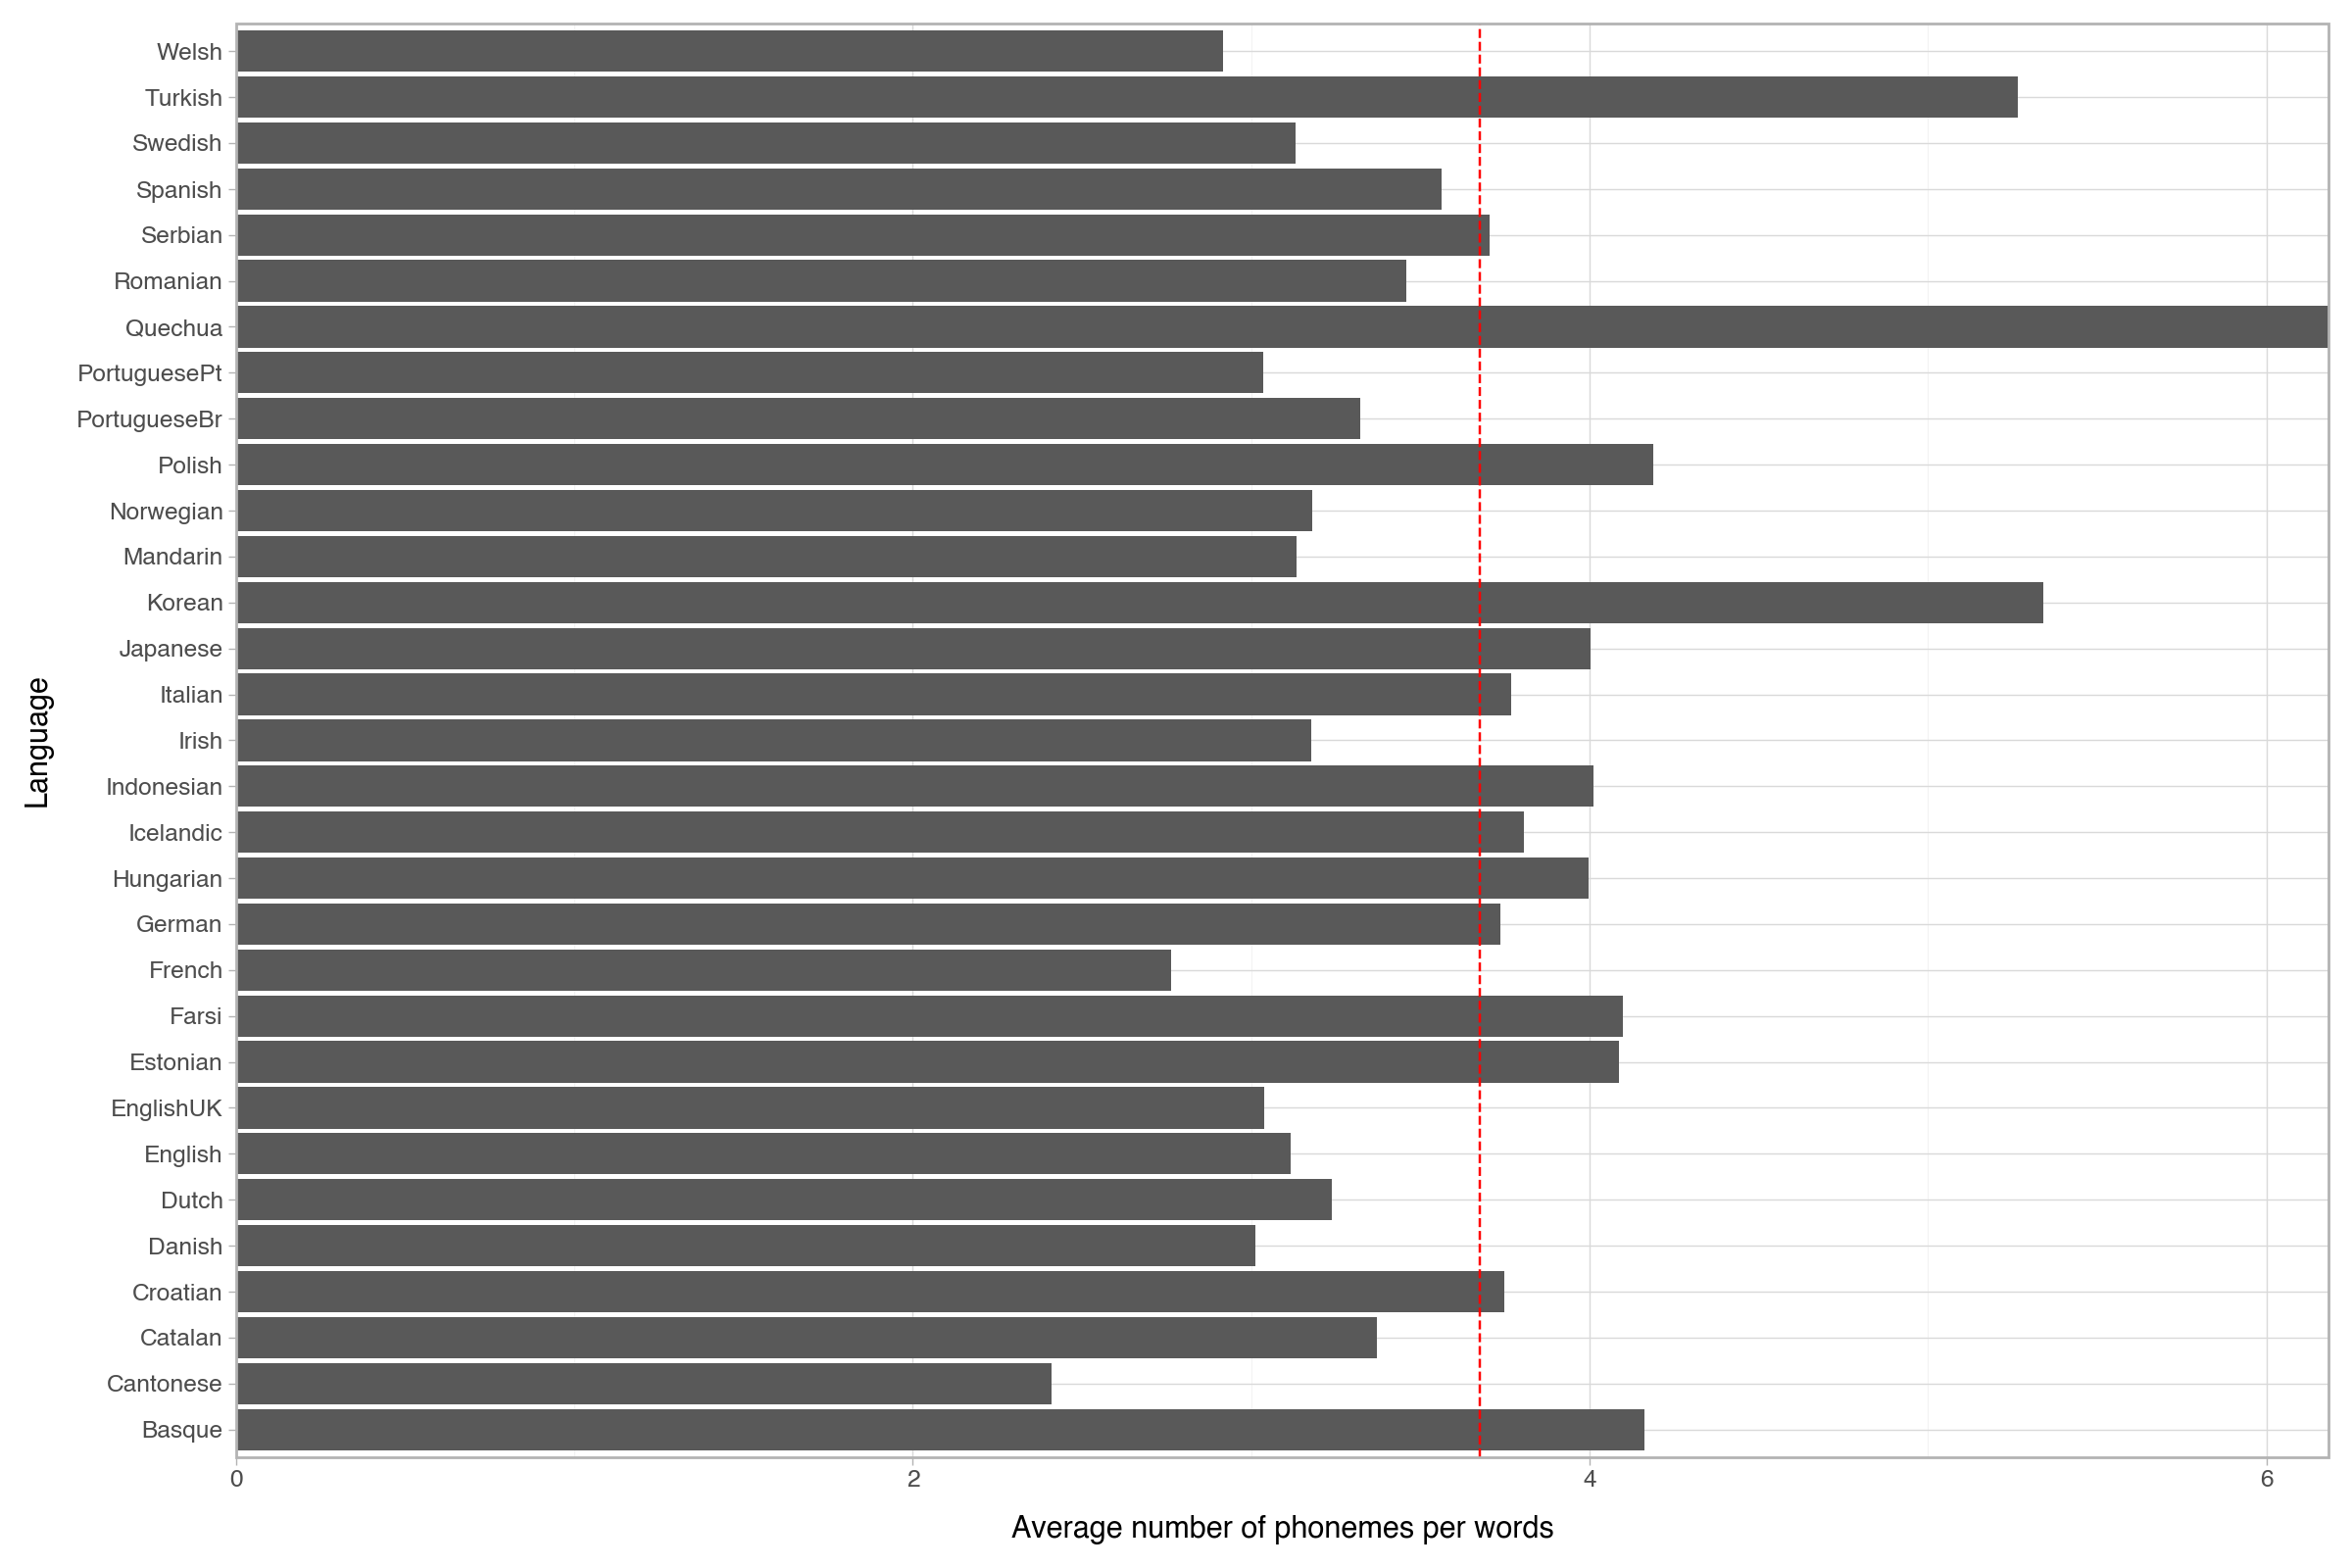

In [8]:
plot_two_counts(properties, 'n_words', 'n_phonemes', 'words', 'phonemes', type='scatter-p9')
plot_two_counts(properties, 'n_words', 'n_phonemes', 'words', 'phonemes', type='bar')

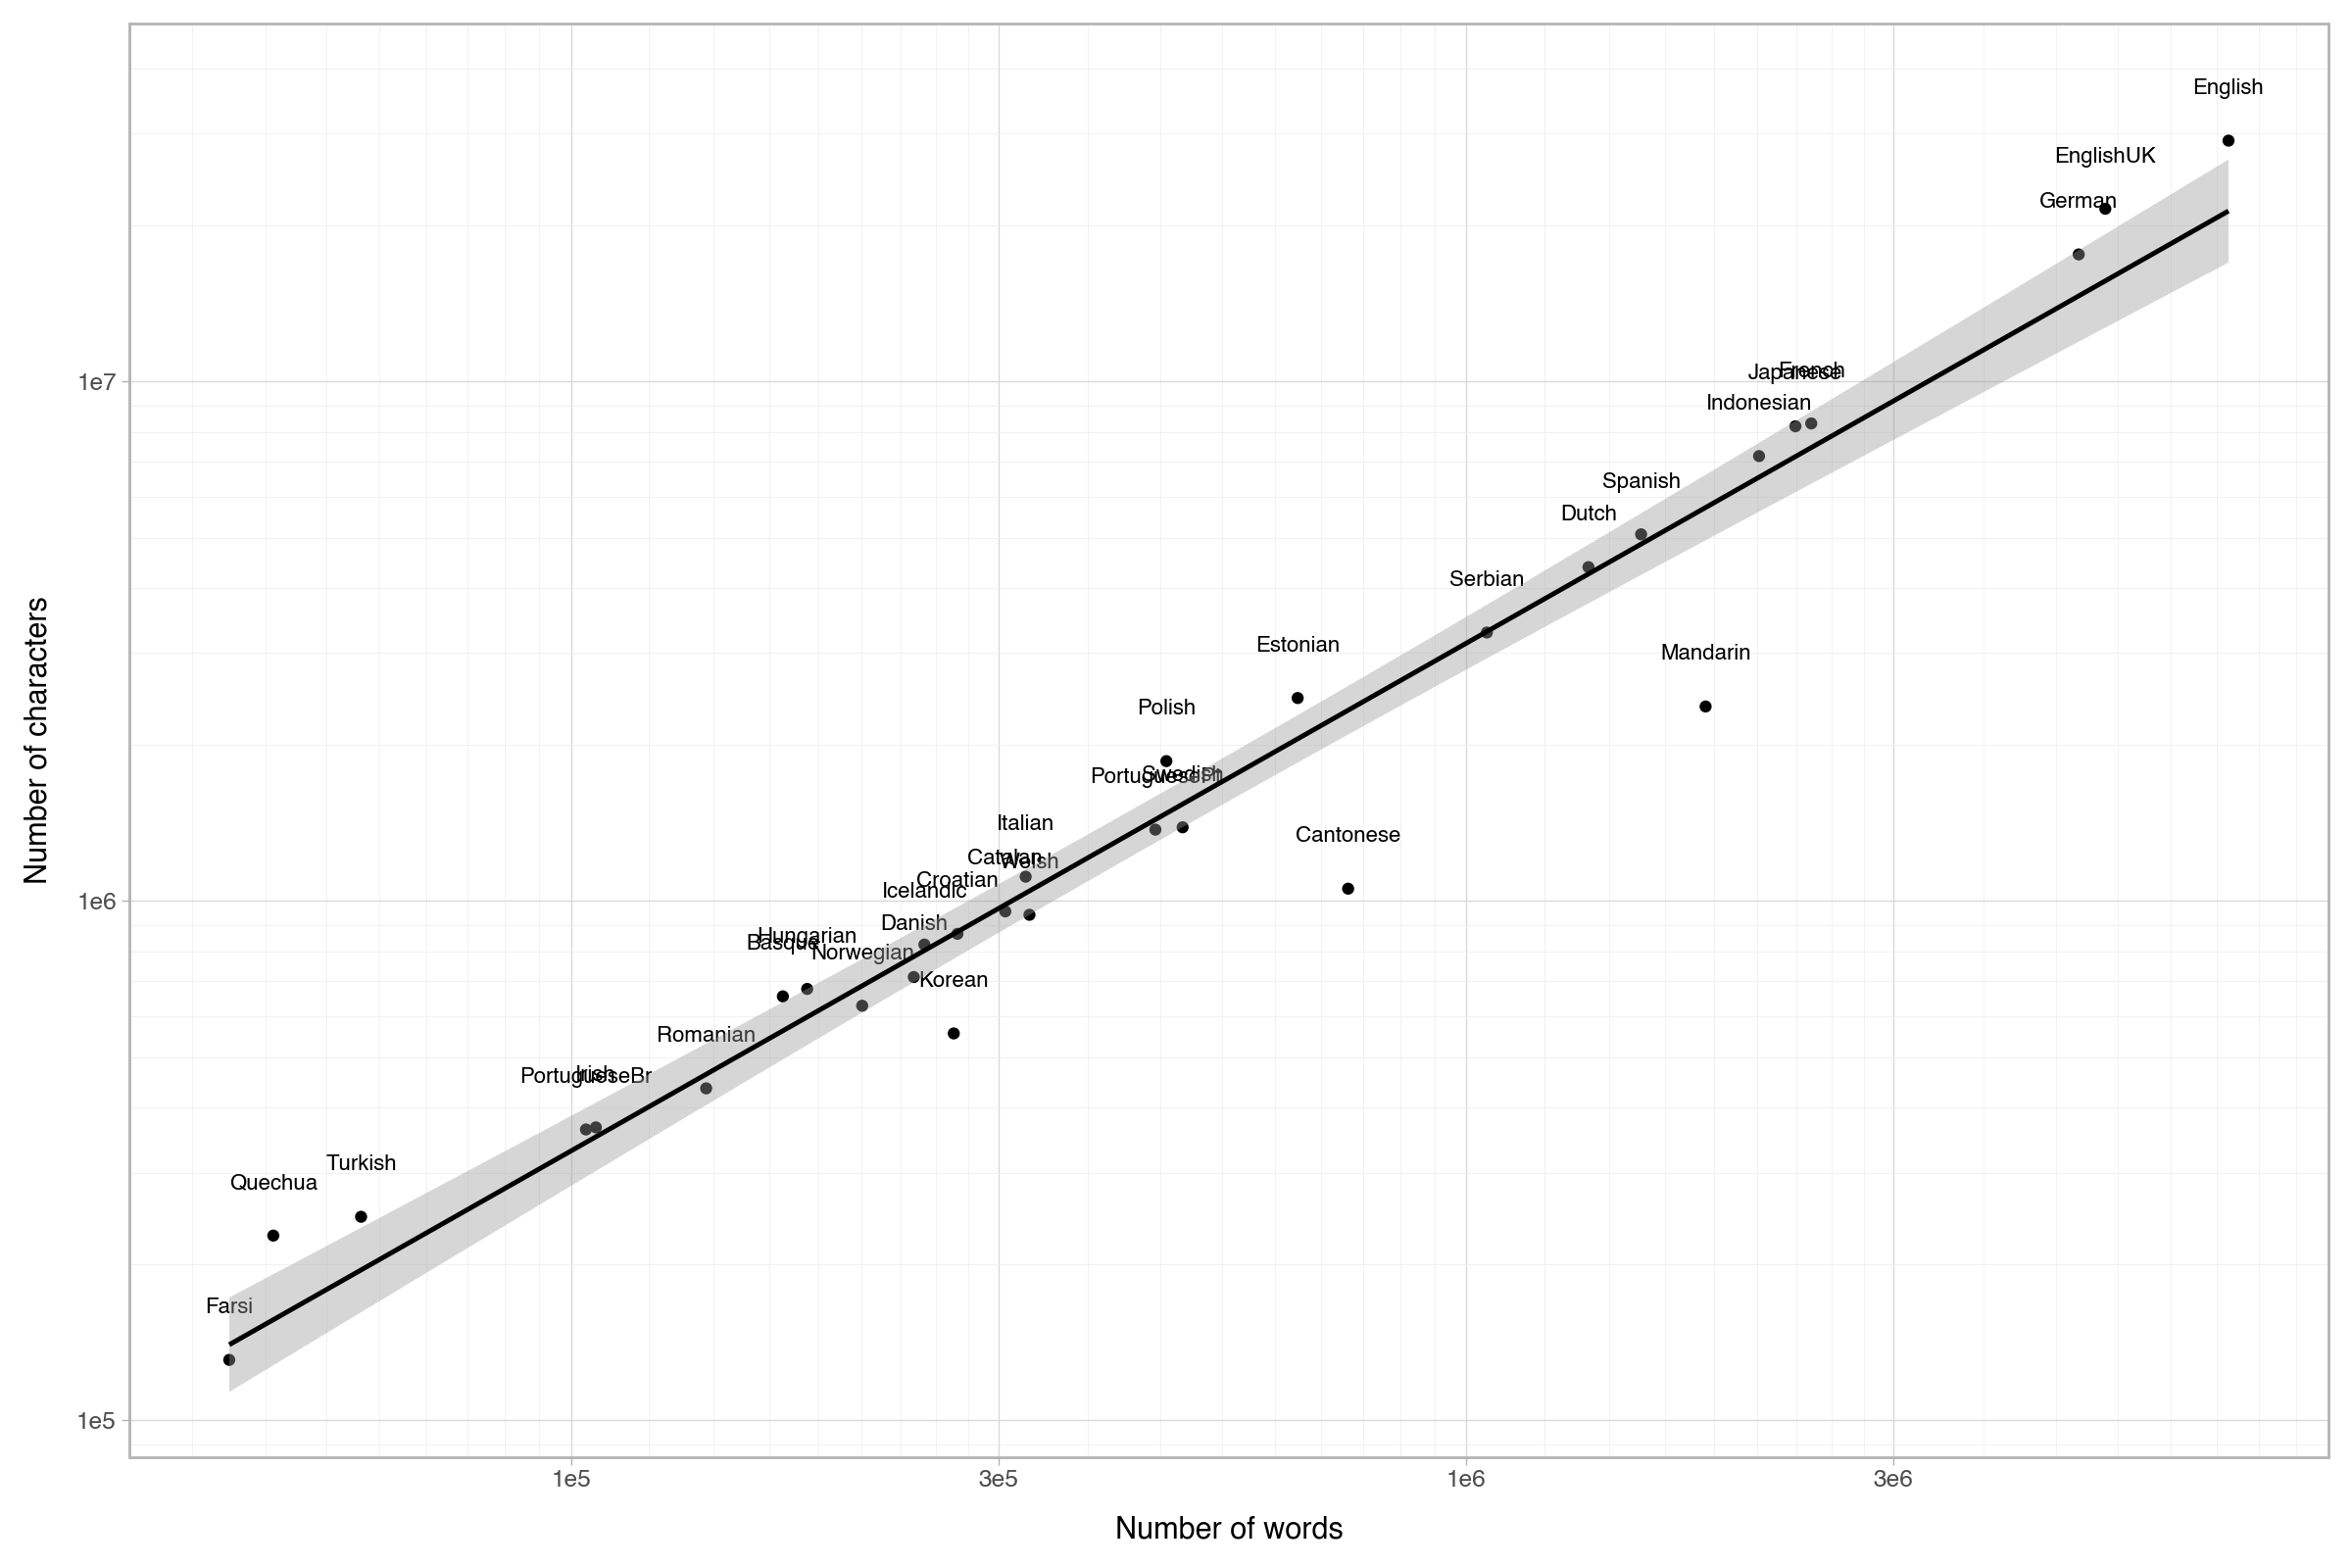

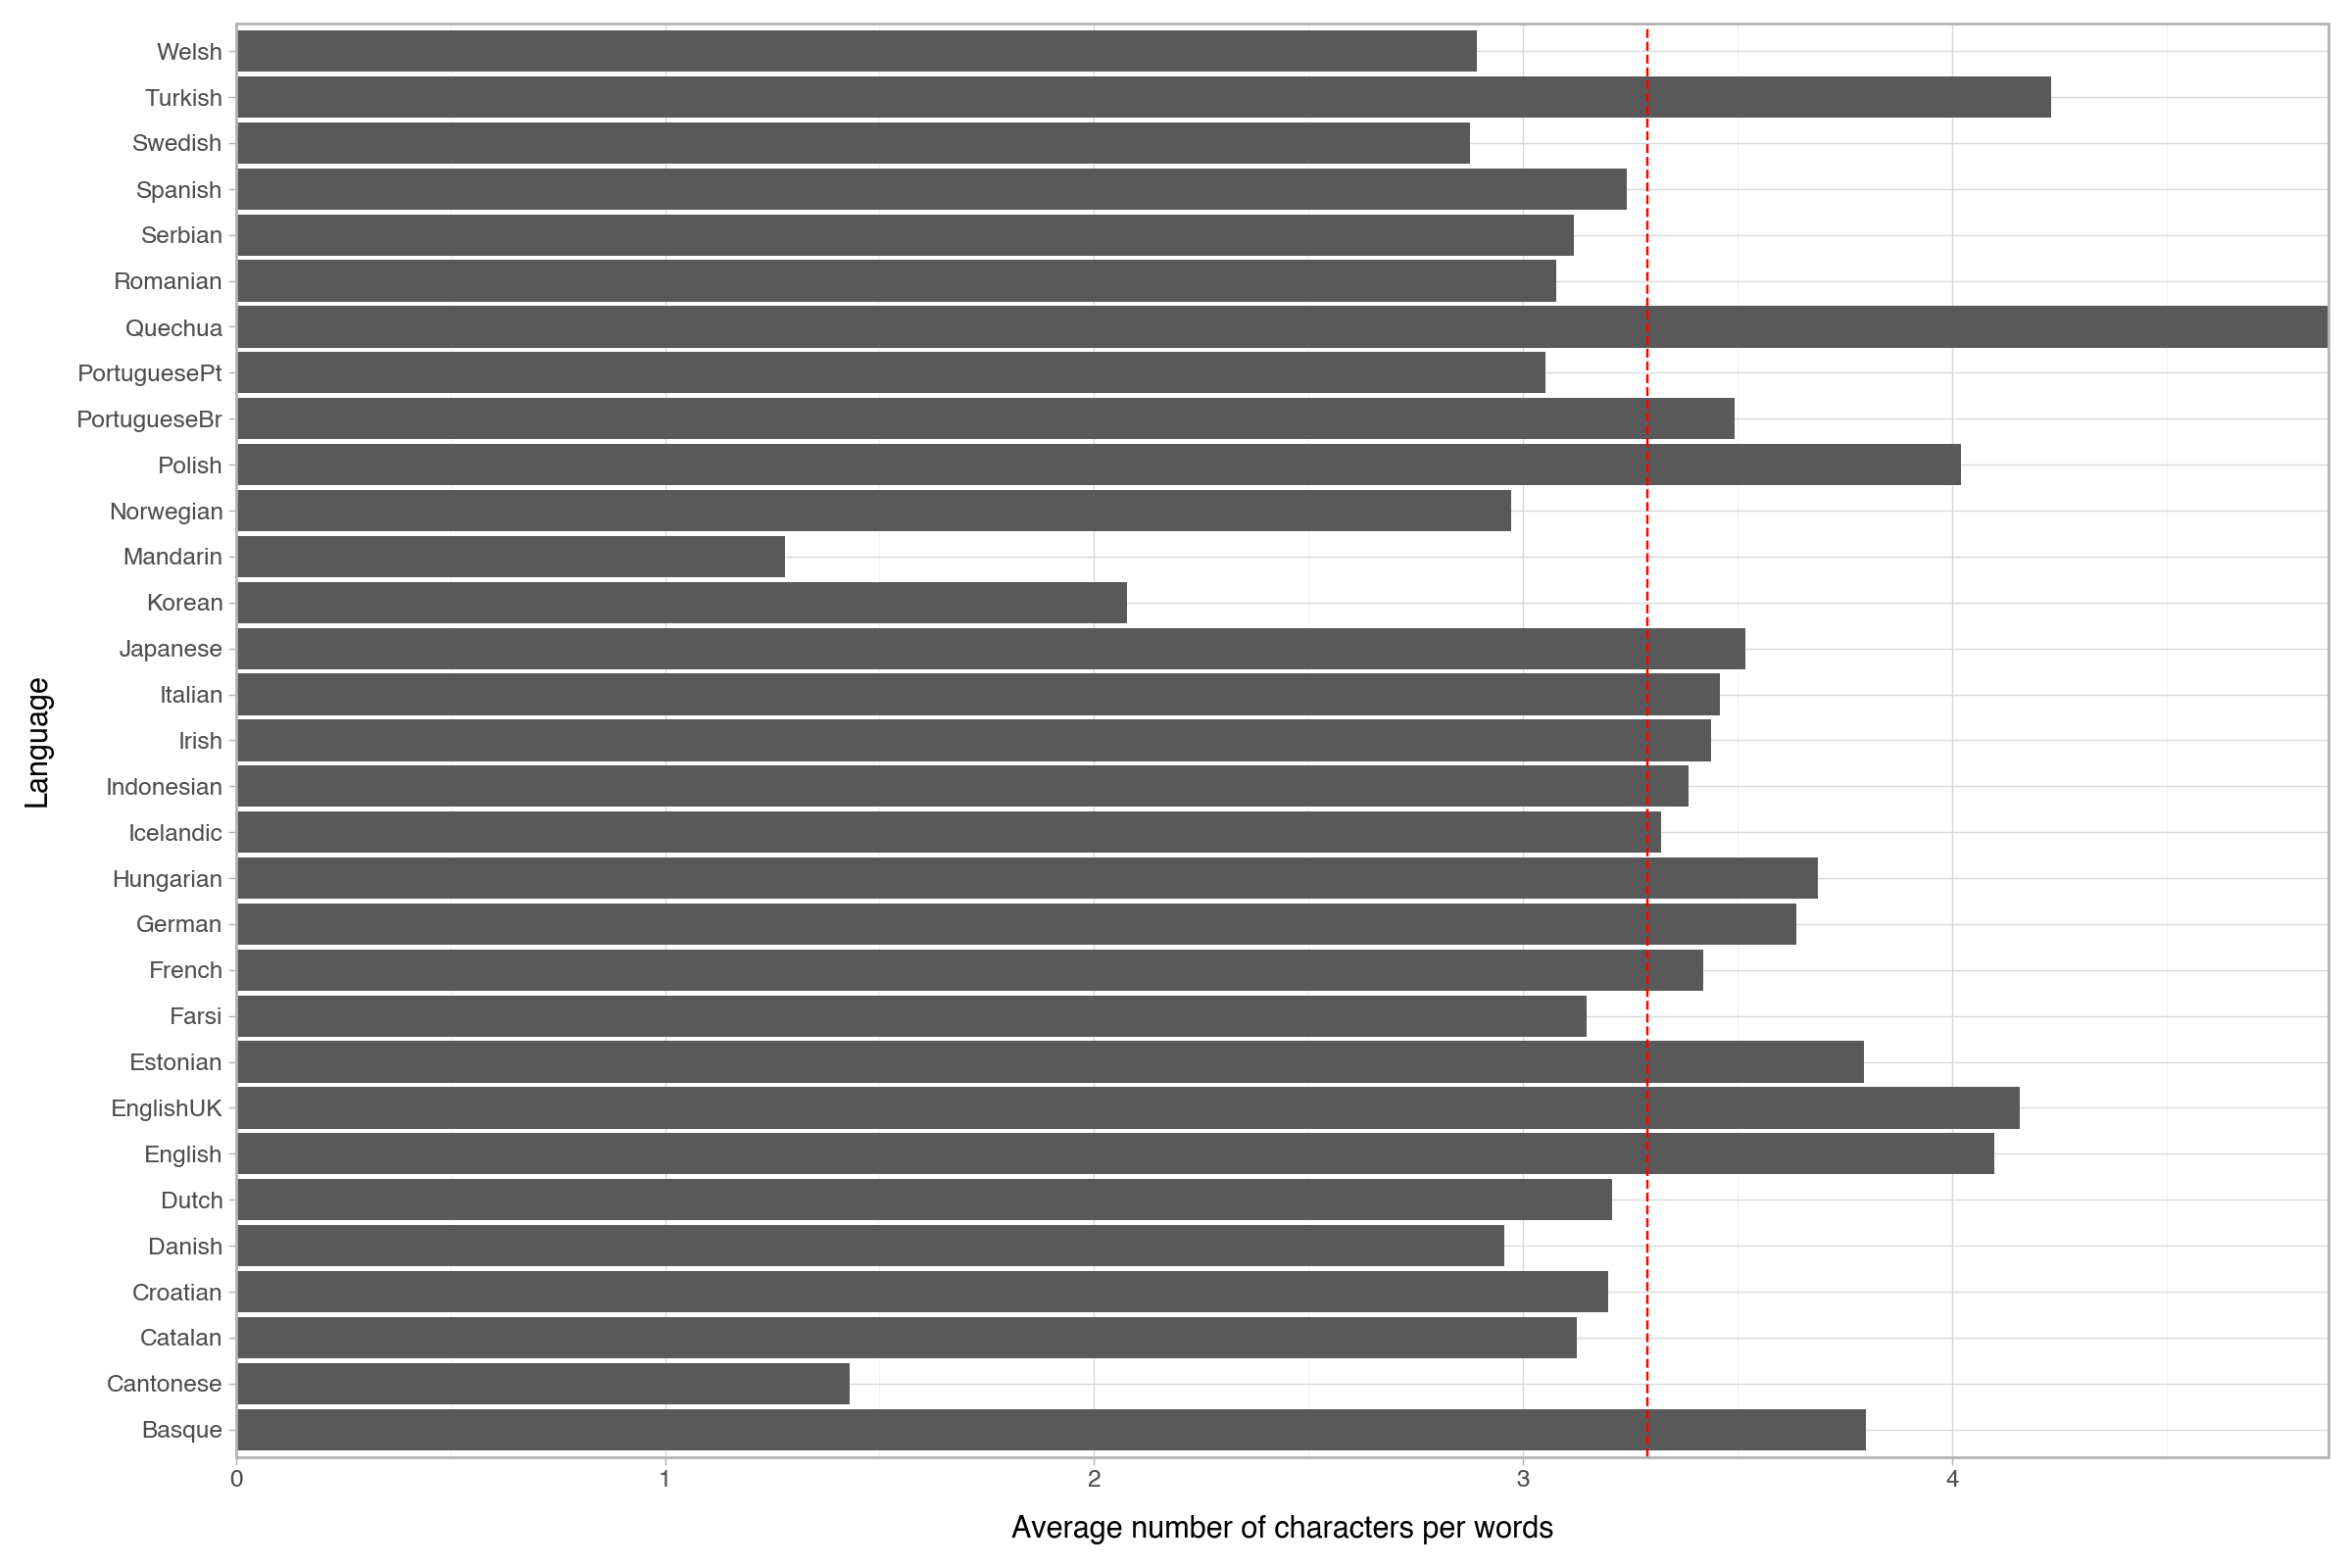

In [9]:
plot_two_counts(written_properties, 'n_words', 'n_characters', 'words', 'characters', type='scatter-p9')
plot_two_counts(written_properties, 'n_words', 'n_characters', 'words', 'characters', type='bar')

In [10]:
# Get average number of chracters per word averaged over all languages, with standard deviation
# Calculate average number of characters per word for each language
written_properties['average_characters'] = written_properties['n_characters'] / written_properties['n_words']

average = written_properties['average_characters'].mean()
std_dev = written_properties['average_characters'].std()

print(f'Average number of characters per word: {average:.2f} ± {std_dev:.2f}')

# Same for phonemes
properties['average_phonemes'] = properties['n_phonemes'] / properties['n_words']

average = properties['average_phonemes'].mean()
std_dev = properties['average_phonemes'].std()

print(f'Average number of phonemes per word: {average:.2f} ± {std_dev:.2f}')



Average number of characters per word: 3.29 ± 0.73
Average number of phonemes per word: 3.68 ± 0.79


## Language Properties

In [11]:
properties = properties.sort_values('n_utterances', ascending=True)
properties

language  n_utterances  n_words  n_phonemes  unique_words  \
27  PortugueseBr         12471    91484      303998          4384   
23       Quechua         13425    33102      204692          7527   
15         Farsi         13467    28080      115089          3352   
14       Turkish         14487    43823      230737          6412   
18         Irish         18256    88388      280906          4029   
28      Romanian         31550   110067      380577          5858   
22     Norwegian         35547   175952      559340          8138   
13     Hungarian         36272   147334      588934         13669   
12        Basque         36614   135866      565633         11900   
11        Danish         48976   192527      579972          4844   
16     Icelandic         50657   197519      751804          9775   
10      Croatian         55288   214949      805530         12146   
19         Welsh         55871   269295      785569          6323   
24       Catalan         56588   248999      839462         10305   
25       Italian         57542   264479      996701          9375   
20        Korean         66576   201078     1074044         26999   
30        Polish         80412   381940     1599152         31569   
26  PortuguesePt         81444   368032     1117010         11053   
21       Swedish         85299   396800     1242615          9274   
9       Estonian        103343   544680     2226518         27743   
8      Cantonese        136727   591314     1425686          3594   
29       Serbian        226266   827808     3067397         24959   
5          Dutch        261938  1106865     3585608         20287   
4        Spanish        288372  1278748     4553819         23714   
6       Mandarin        323940  1506344     4721486          8740   
2         French        432133  1995063     5510523         17395   
17    Indonesian        534525  1587847     6369991         21404   
7       Japanese        557215  1773816     7100307         43014   
3         German        860297  3967699    14821727         58193   
1      EnglishUK       1246211  5170088    15710280         22450   
0        English       1645797  7096724    22107530         35687   

    average_phonemes  
27          3.322964  
23          6.183675  
15          4.098611  
14          5.265203  
18          3.178101  
28          3.457685  
22          3.178935  
13          3.997272  
12          4.163168  
11          3.012419  
16          3.806236  
10          3.747540  
19          2.917132  
24          3.371347  
25          3.768545  
20          5.341430  
30          4.186919  
26          3.035089  
21          3.131590  
9           4.087754  
8           2.411047  
29          3.705445  
5           3.239427  
4           3.561154  
6           3.134401  
2           2.762080  
17          4.011716  
7           4.002843  
3           3.735598  
1           3.038687  
0           3.115174

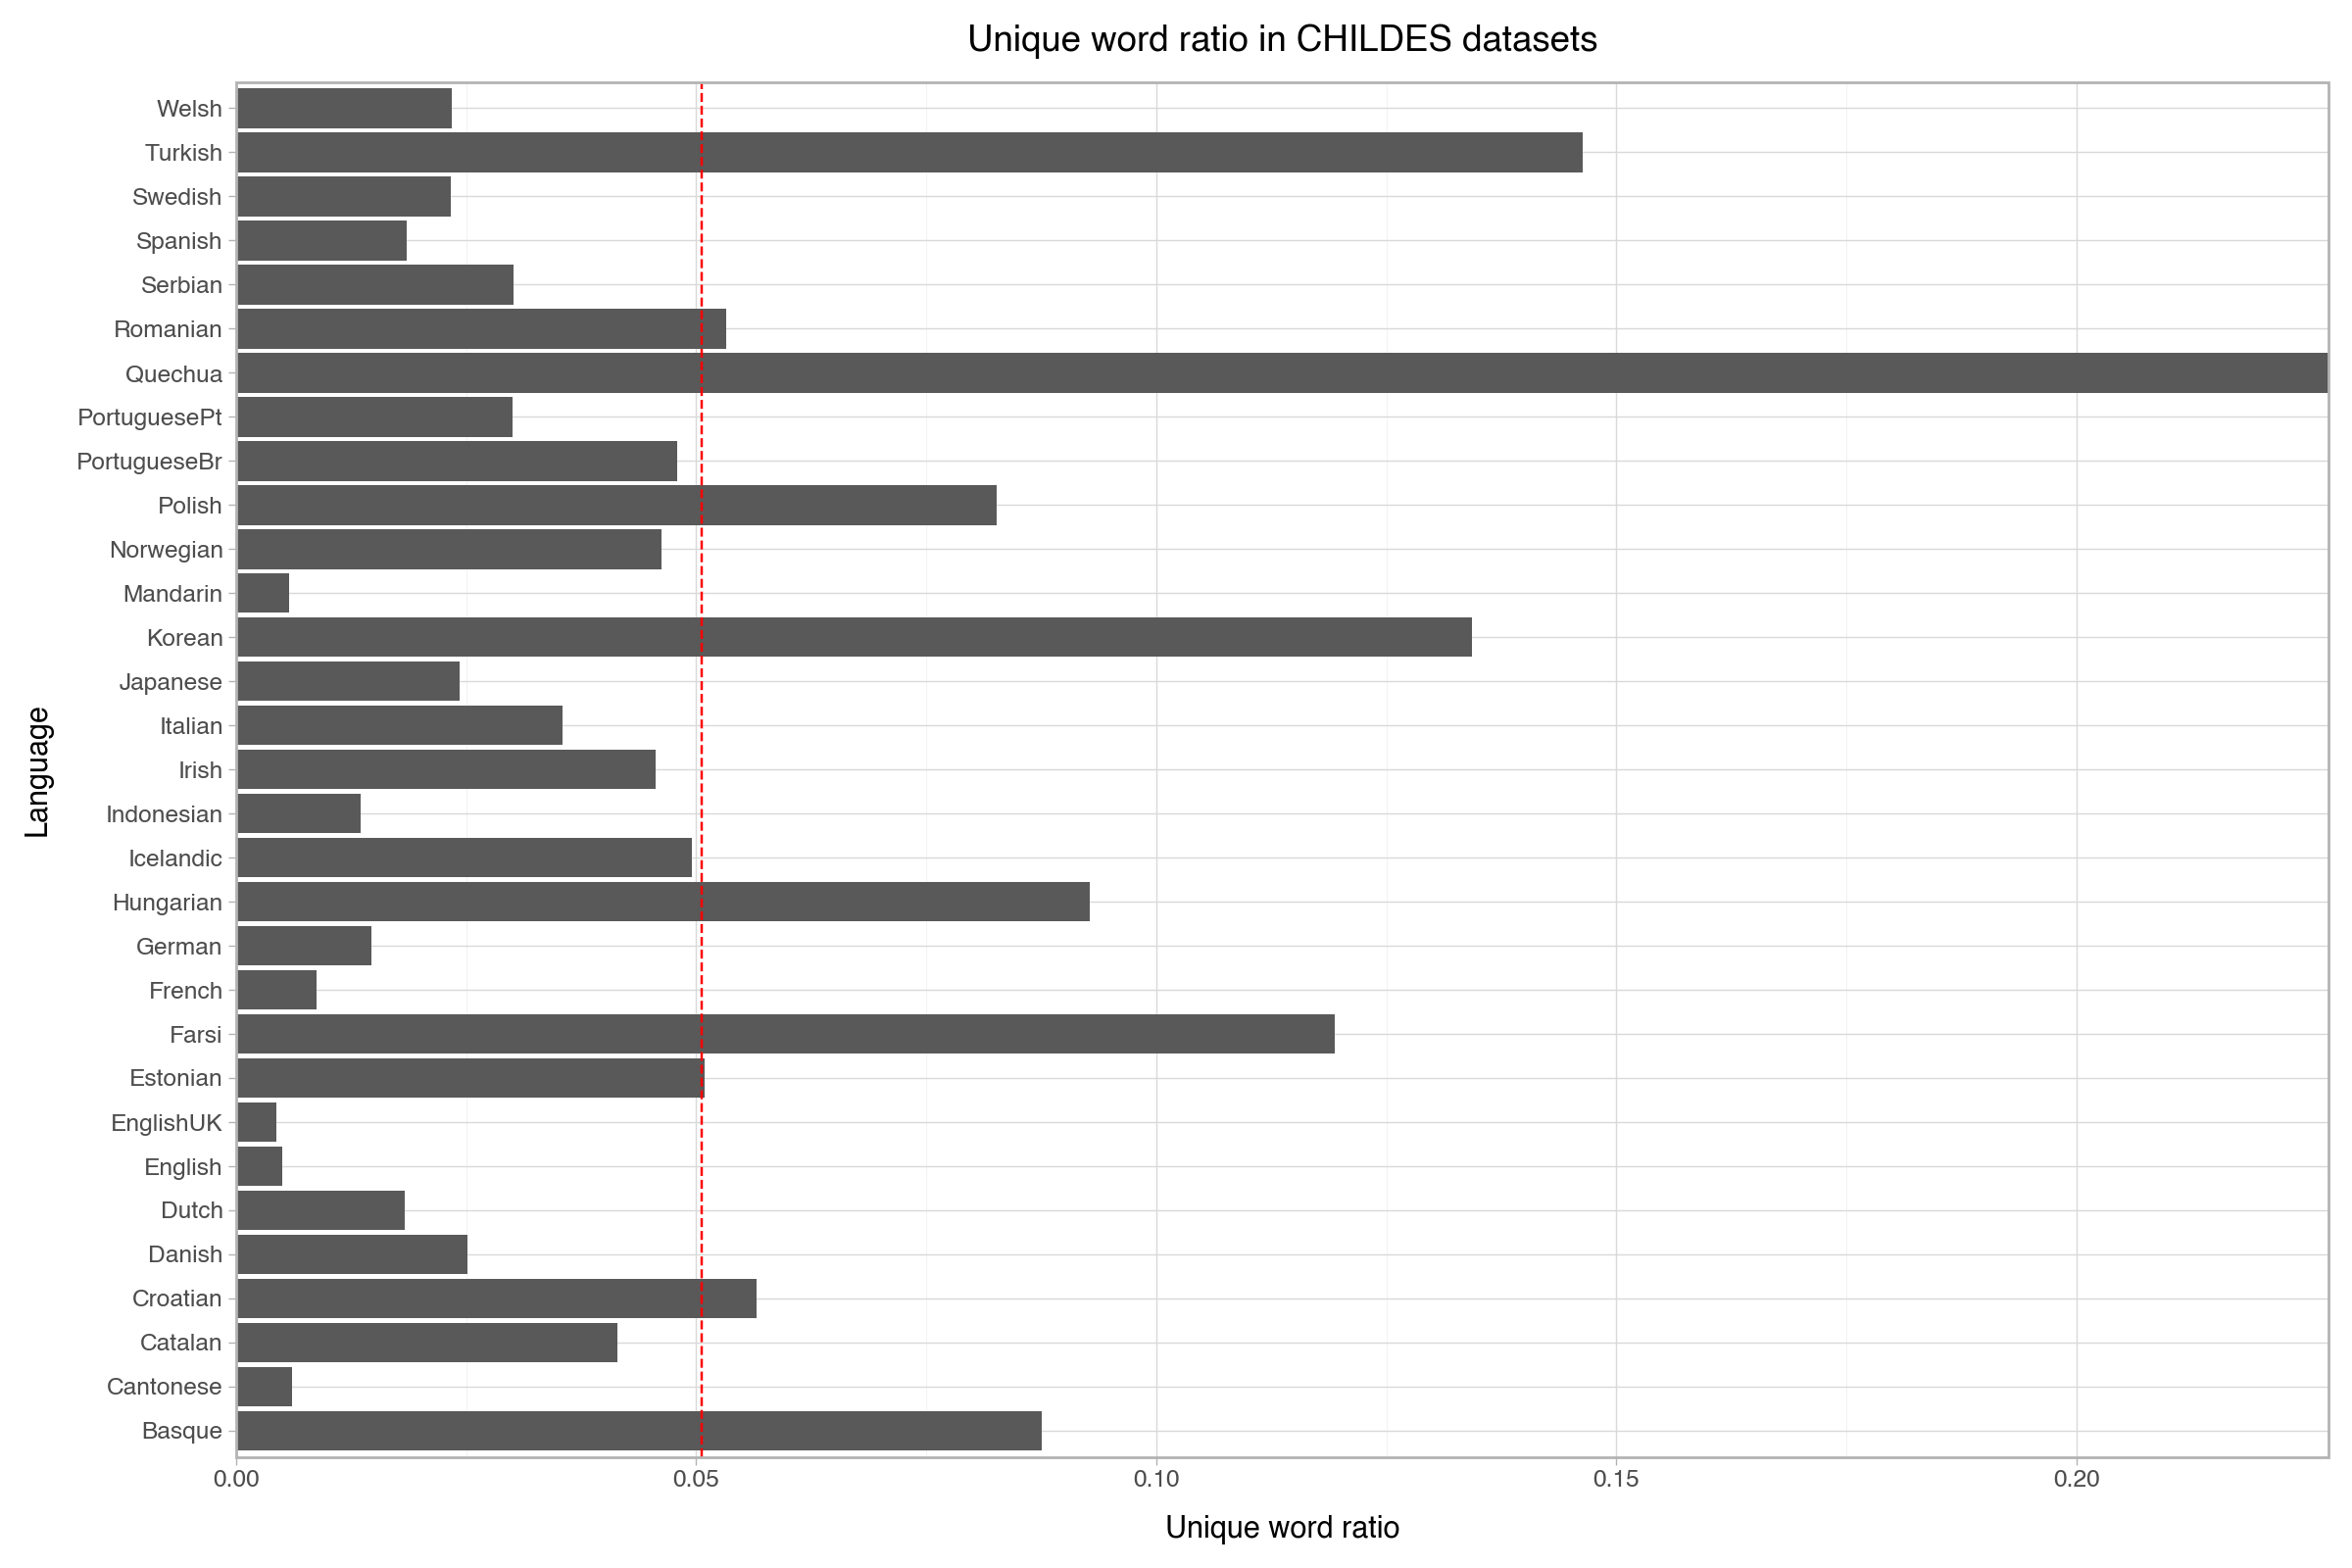

In [12]:
# Plot the ratio of unique words to words in each language
properties['unique_word_ratio'] = properties['unique_words'] / properties['n_words']
#properties = properties.sort_values('language', ascending=False)
#properties['language'] = pd.Categorical(properties['language'], categories=properties.sort_values('n_words', ascending=True)['language'], ordered=True)

p = (p9.ggplot(properties, p9.aes(x='language', y='unique_word_ratio'))
     + p9.geom_bar(stat='identity')
     + p9.geom_hline(yintercept=properties['unique_word_ratio'].mean(), linetype='dashed', color='red')
     + p9.scale_y_continuous(limits=(0, None), expand=(0, 0))
     + p9.coord_flip()
     + p9.theme(figure_size=(12, 8))
     + p9.ggtitle('Unique word ratio in CHILDES datasets')
     + p9.xlab('Language')
     + p9.ylab('Unique word ratio')
)

p.show()



In [13]:
# Plot heap's law for English
english = datasets['English']
lines = list(english['phonemized_utterance'])
np.random.shuffle(lines)
n_words = []
unique_words = []
vocabulary = set()
total_words = 0
for i, line in enumerate(tqdm(lines)):
    words = [word.strip() for word in line.split('WORD_BOUNDARY') if word.strip() != '']
    total_words += len(words)
    n_words.append(total_words)
    vocabulary.update(words)
    unique_words.append(len(vocabulary))

100%|██████████| 1645797/1645797 [00:02<00:00, 601941.65it/s]


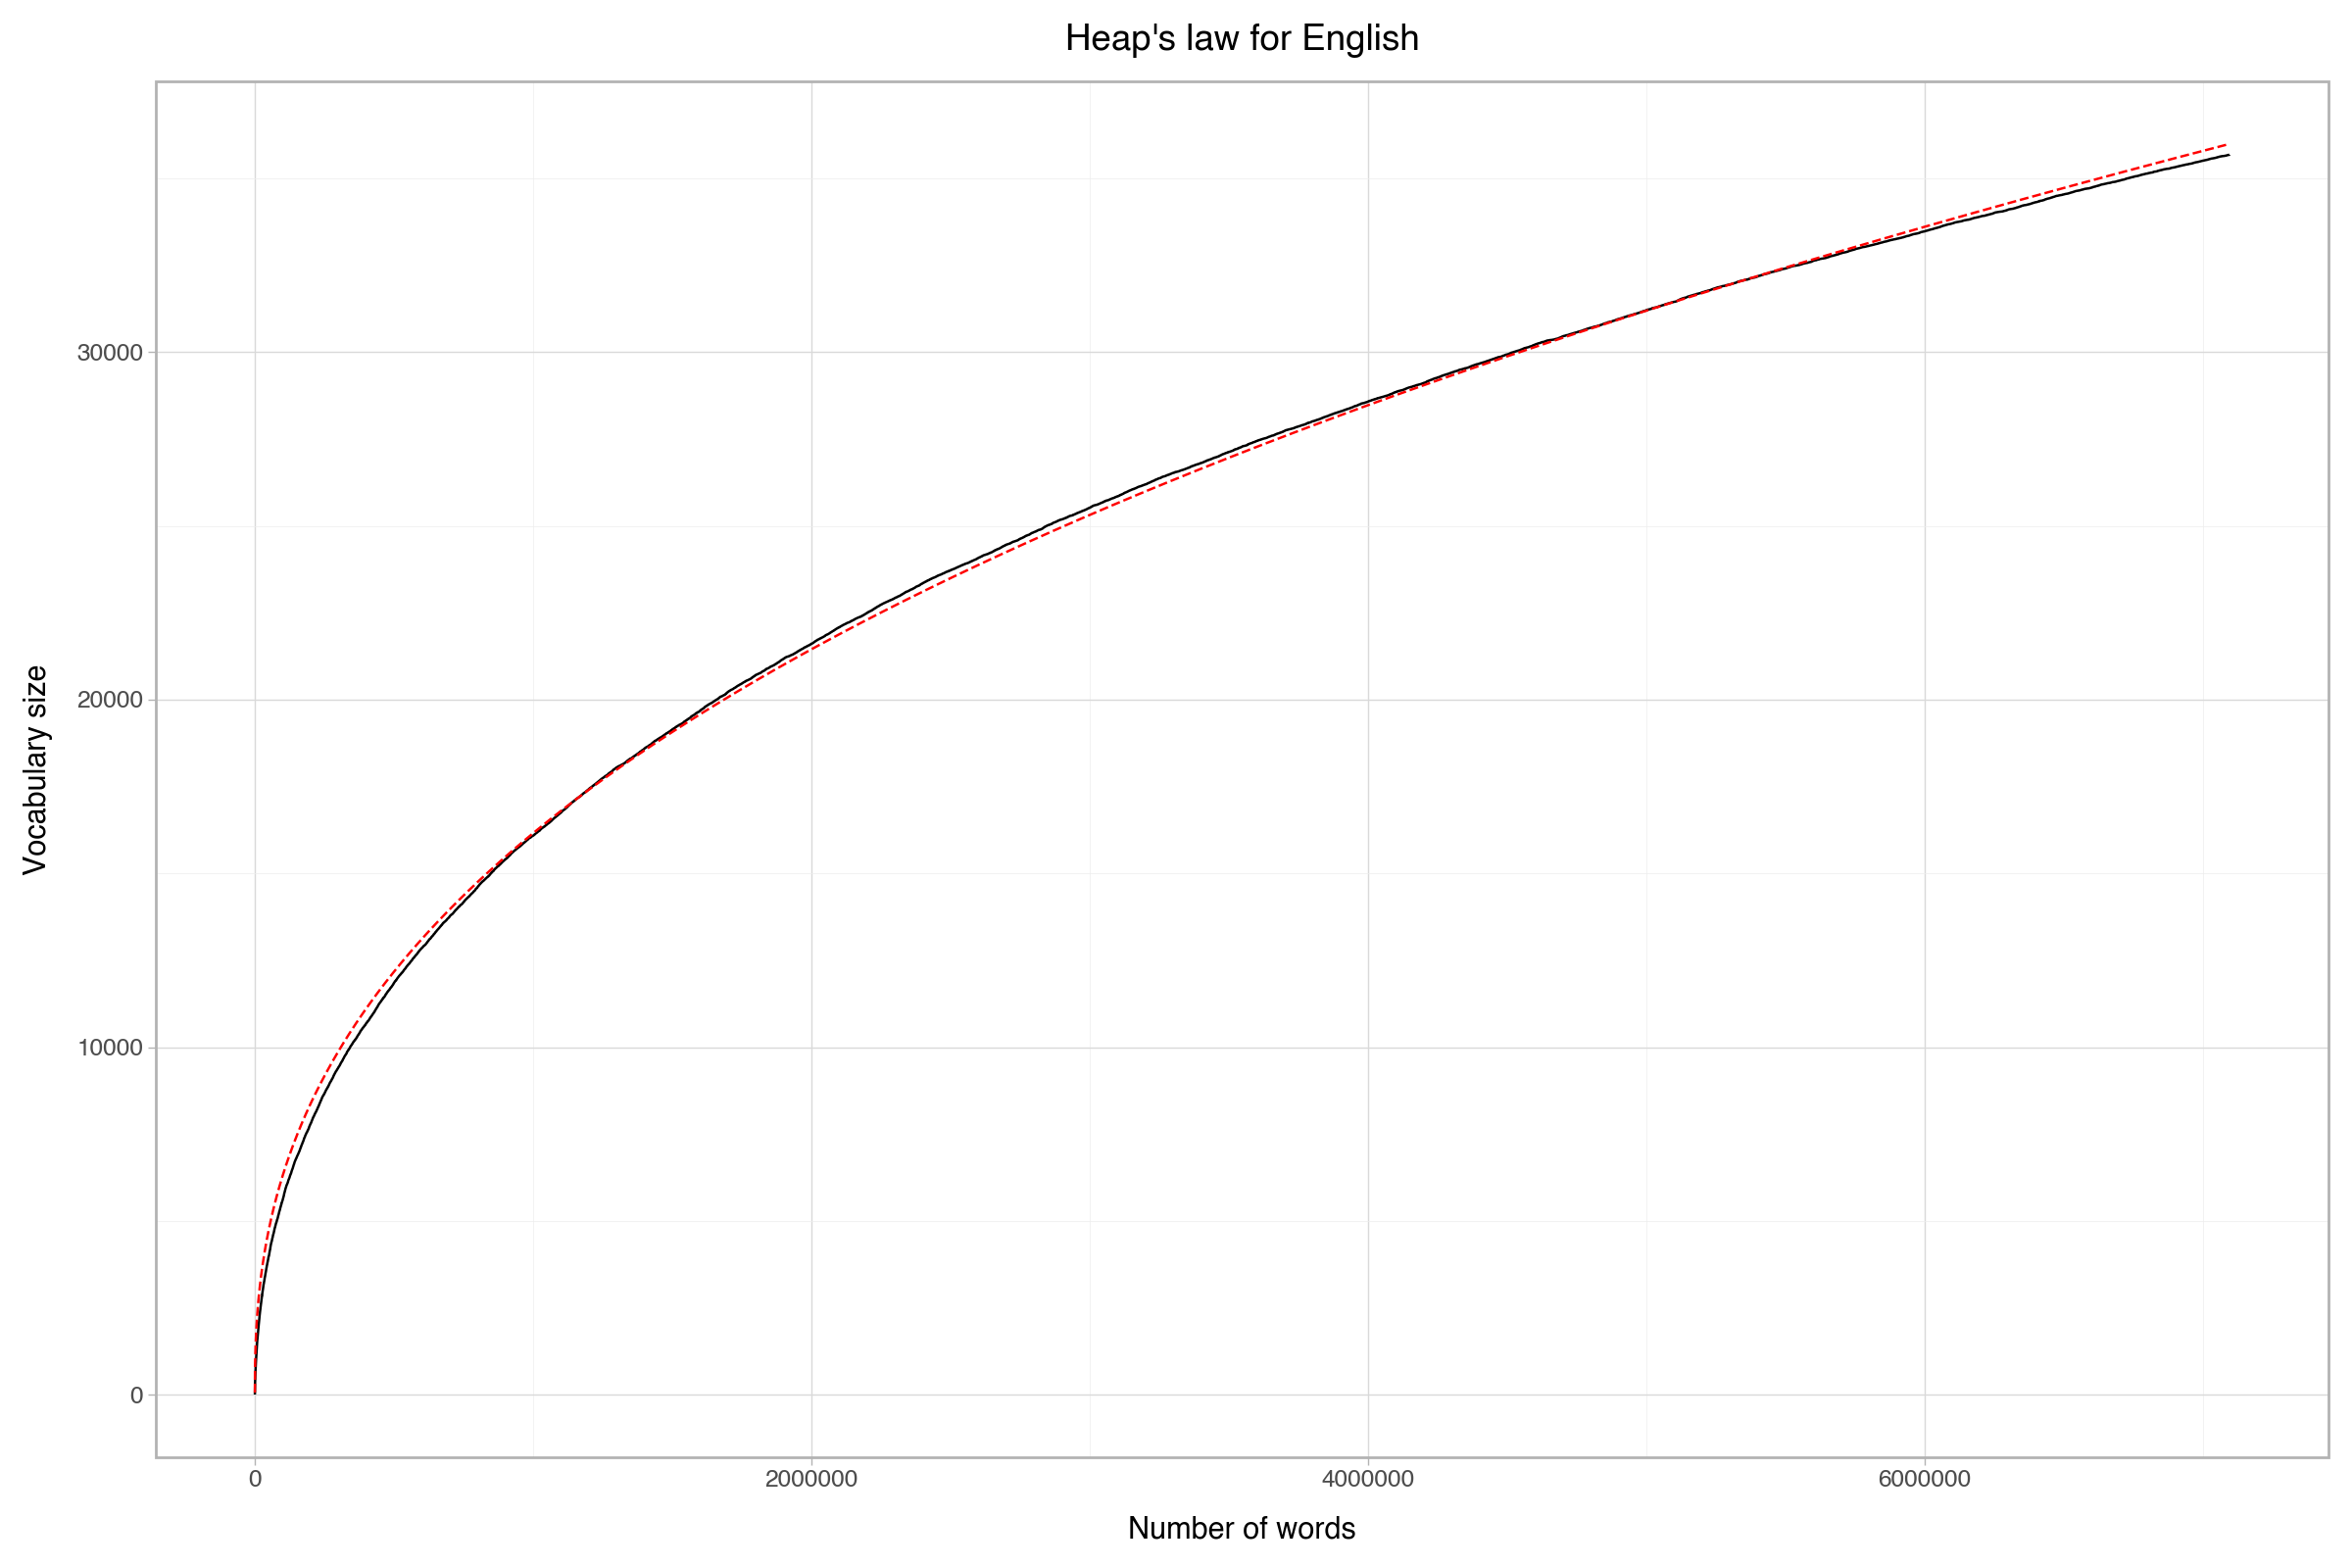

In [14]:
# Fit a power law to the data
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

popt, pcov = curve_fit(power_law, n_words, unique_words)
a, b = popt
# plt.figure(figsize=(10, 5))
# plt.plot(n_words, unique_words)
# plt.plot(n_words, power_law(n_words, a, b), color='red', linestyle='--')
# plt.xlabel('Number of words')
# plt.ylabel('Vocabulary size')
# plt.title("Heap's law for English")
# plt.show()

# print(f'Heap\'s law for English: V = {a:.2f} * N^{b:.2f}')

# Plot using plotnine
heap_data = pd.DataFrame({'n_words': n_words, 'unique_words': unique_words})
heap_data['fitted'] = power_law(heap_data['n_words'], a, b)

p = (p9.ggplot(heap_data, p9.aes(x='n_words', y='unique_words'))
        + p9.geom_line()
        + p9.geom_line(p9.aes(y='fitted'), color='red', linetype='dashed')
        + p9.theme(figure_size=(12, 8))
        + p9.ggtitle("Heap's law for English")
        + p9.xlab('Number of words')
        + p9.ylab('Vocabulary size')
    )

p.show()


In [15]:
# # Plot heaps law for all languages
# heap_parameters = {}
# plt.figure(figsize=(20, 10))
# for language, dataset in datasets.items():
#     lines = list(dataset['phonemized_utterance'])
#     np.random.shuffle(lines)
#     n_words = []
#     unique_words = []
#     vocabulary = set()
#     total_words = 0
#     for i, line in enumerate(lines):
#         words = [word.strip() for word in line.split('WORD_BOUNDARY') if word.strip() != '']
#         total_words += len(words)
#         n_words.append(total_words)
#         vocabulary.update(words)
#         unique_words.append(len(vocabulary))
#     plt.plot(n_words, unique_words, label=language)

#     # Fit a power law to the data
#     popt, pcov = curve_fit(power_law, n_words, unique_words)
#     a, b = popt
#     heap_parameters[language] = (a, b)
#     print(f'Heap\'s law for {language}: V = {a:.2f} * N^{b:.2f}')

# plt.xlabel('Number of words')
# plt.ylabel('Vocabulary size')
# # Make legend two columns
# plt.legend(ncol=3)
# plt.title("Heap's law for all languages")
# plt.show()

# Now with plotnine
# heap_data = pd.DataFrame(columns=['language', 'n_words', 'unique_words'])
# for language, dataset in datasets.items():
#     lines = list(dataset['phonemized_utterance'])
#     np.random.shuffle(lines)
#     n_words = []
#     unique_words = []
#     vocabulary = set()
#     total_words = 0
#     for i, line in enumerate(lines):
#         words = [word.strip() for word in line.split('WORD_BOUNDARY') if word.strip() != '']
#         total_words += len(words)
#         n_words.append(total_words)
#         vocabulary.update(words)
#         unique_words.append(len(vocabulary))
#     heap_data = pd.concat([heap_data, pd.DataFrame({'language': language, 'n_words': n_words, 'unique_words': unique_words})], ignore_index=True)

# p = (p9.ggplot(heap_data, p9.aes(x='n_words', y='unique_words', color='language'))
#         + p9.geom_line()
#         + p9.theme(figure_size=(12, 8))
#         + p9.ggtitle("Heap's law for all languages")
#         + p9.xlab('Number of words')
#         + p9.ylab('Vocabulary size')
#     )

# p.show()

## Information content

In [16]:
def get_frequencies(column):
    totals = {}
    per_language_frequencies = {}
    for language, dataset in datasets.items():
        lines = list(dataset[column])
        tokens = [token for line in lines for token in line.split(' ')]
        tokens = [token for token in tokens if token not in ['WORD_BOUNDARY', '.', ',', '?', '!', ';', ':', '(', ')', '[', ']', '{', '}', '"', "'", '']]
        per_language_frequencies[language] = pd.Series(tokens).value_counts()
        per_language_frequencies[language] = per_language_frequencies[language].drop('WORD_BOUNDARY', errors='ignore')
        totals[language] = per_language_frequencies[language].sum()
    return totals, per_language_frequencies

total_phoneme_frequencies, phoneme_frequencies = get_frequencies('phonemized_utterance')
total_character_frequencies, character_frequencies = get_frequencies('character_split_utterance')

In [17]:
def get_bigram_frequencies(column):
    totals = {}
    per_language_frequencies = {}
    for language, dataset in datasets.items():
        lines = list(dataset[column])
        # TODO: Remove punctuation
        bigrams = [bigram for line in lines for bigram in zip(line.split(' ')[:-1], line.split(' ')[1:])]
        bigrams = [bigram for bigram in bigrams if bigram[0] != 'WORD_BOUNDARY' and bigram[1] != 'WORD_BOUNDARY']
        per_language_frequencies[language] = pd.Series(bigrams).value_counts()
        totals[language] = per_language_frequencies[language].sum()
    return totals, per_language_frequencies

total_phoneme_bigram_frequencies, phoneme_bigram_frequencies = get_bigram_frequencies('phonemized_utterance')
total_character_bigram_frequencies, character_bigram_frequencies = get_bigram_frequencies('character_split_utterance')

In [18]:
def word_information(word, language, type='phoneme', bigram=False):

    tokens = word.split(' ')
    tokens = [token for token in tokens if token not in ['.', ',', '?', '!', ';', ':', '(', ')', '[', ']', '{', '}', '"', "'"]]

    # Estimate the information content of a word using the token frequencies
    if not bigram:
        information = 0  
        for token in tokens:
            if type == 'phoneme':
                if token in (phoneme_frequencies[language]):
                    p = phoneme_frequencies[language][token] / total_phoneme_frequencies[language]
                    information += -np.log2(p)
            else:
                if token in (character_frequencies[language]):
                    p = character_frequencies[language][token] / total_character_frequencies[language]
                    information += -np.log2(p)
    else:
        tokens = word.split(' ')
        bigrams = [(tokens[i], tokens[i+1]) for i in range(len(tokens) - 1)]
        information = 0
        for bigram in bigrams:
            if type == 'phoneme':
                if bigram in (phoneme_bigram_frequencies[language]):
                    p = phoneme_bigram_frequencies[language][bigram] / phoneme_frequencies[language][bigram[0]]
                    information += -np.log2(p)
            else:
                if bigram in (character_bigram_frequencies[language]):
                    p = character_bigram_frequencies[language][bigram] / character_frequencies[language][bigram[0]]
                    information += -np.log2(p)
    return information

def get_information_content(column, type='word', trim_top=False, bigram=False):
    information_content = {}
    for language, dataset in tqdm(datasets.items()):
        lines = list(dataset[column])
        if type == 'utterance':
            lines = [line.replace(' WORD_BOUNDARY', '') for line in lines]
            np.random.shuffle(lines)
            lines = lines[:10000]
        if type == 'word':
            np.random.shuffle(lines)
            lines = lines[:100000]
            lines = [word.strip() for line in lines for word in line.split('WORD_BOUNDARY') if word.strip() != '']
        information_content[language] = [word_information(line, language=language, type=('phoneme' if column == 'phonemized_utterance' else 'char'), bigram=bigram) for line in lines]

    if trim_top:
        # Remove top of information content values for each language
        for language in information_content:
            percentile = np.percentile(information_content[language], trim_top)
            information_content[language] = [i for i in information_content[language] if i <= percentile]
    
    return information_content

In [19]:
word_information('k æ t', 'English', True)

33.78771797284805

In [20]:
l = datasets['Mandarin']['character_split_utterance'][:10]
l = [line.replace(' WORD_BOUNDARY', '') for line in l]
for line in l:
    i = word_information(line, 'Mandarin', type='char', bigram=False)
    print(line, i)

啊 呜 啊 ! 24.55869302865892
奥 那 是 什 么 ? 37.68096747001128
别 看 那 个 . 28.77859550780051
那 是 锅 . 24.152826221518765
嘎 嘎 . 31.667770843576562
称 称 称 称 . 64.4207497744227
那 是 什 么 东 西 呀 ? 48.4331976985354
老 虎 . 22.526270486708185
一 个 水 瓶 . 35.13246237509516
还 有 锅 是 不 是 ? 41.420553051820676


In [21]:
def plot_information_content(information_content, type='violin', label='words'):
    information_data = pd.DataFrame({'language': [language for language in information_content for _ in information_content[language]],
                                        'information': [info for infos in information_content.values() for info in infos]})

    if type == 'violin':
        p = (p9.ggplot(information_data, p9.aes(x='language', y='information'))
                + p9.geom_violin()
                + p9.coord_flip()
                + p9.theme(figure_size=(12, 8))
                + p9.ggtitle(f'Information content of {label} in CHILDES datasets')
                + p9.xlab('Language')
                + p9.ylab('Information content (bits)')
            )

    if type == 'box':
        p = (p9.ggplot(information_data, p9.aes(x='language', y='information'))
                + p9.geom_boxplot()
                + p9.coord_flip()
                + p9.theme(figure_size=(12, 8))
                + p9.ggtitle(f'Information content of {label} in CHILDES datasets')
                + p9.xlab('Language')
                + p9.ylab('Information content (bits)')
            )
        
    if type == 'average':
                # Plot average information content of words in each language
        data = pd.DataFrame({'language' : [language for language in information_content],
                'average_information_content' : [np.mean(information_content[language]) for language in information_content]})
        
        p = (p9.ggplot(data, p9.aes(x='language', y='average_information_content'))
            + p9.geom_bar(stat='identity')
            + p9.geom_hline(yintercept=data['average_information_content'].mean(), linetype='dashed', color='red')
            + p9.scale_y_continuous(limits=(0, None), expand=(0, 0))
            + p9.coord_flip()
            + p9.theme(figure_size=(12, 8))
            + p9.ggtitle(f'Average information content of {label} in CHILDES datasets')
            + p9.xlab('Language')
            + p9.ylab('Average information content (bits)')
        )

    p.show()

In [22]:
information_content_orth = get_information_content('character_split_utterance', type='word', trim_top=95, bigram=False)
information_content_phon = get_information_content('phonemized_utterance', type='word', trim_top=95, bigram=False)

100%|██████████| 31/31 [01:09<00:00,  2.24s/it]


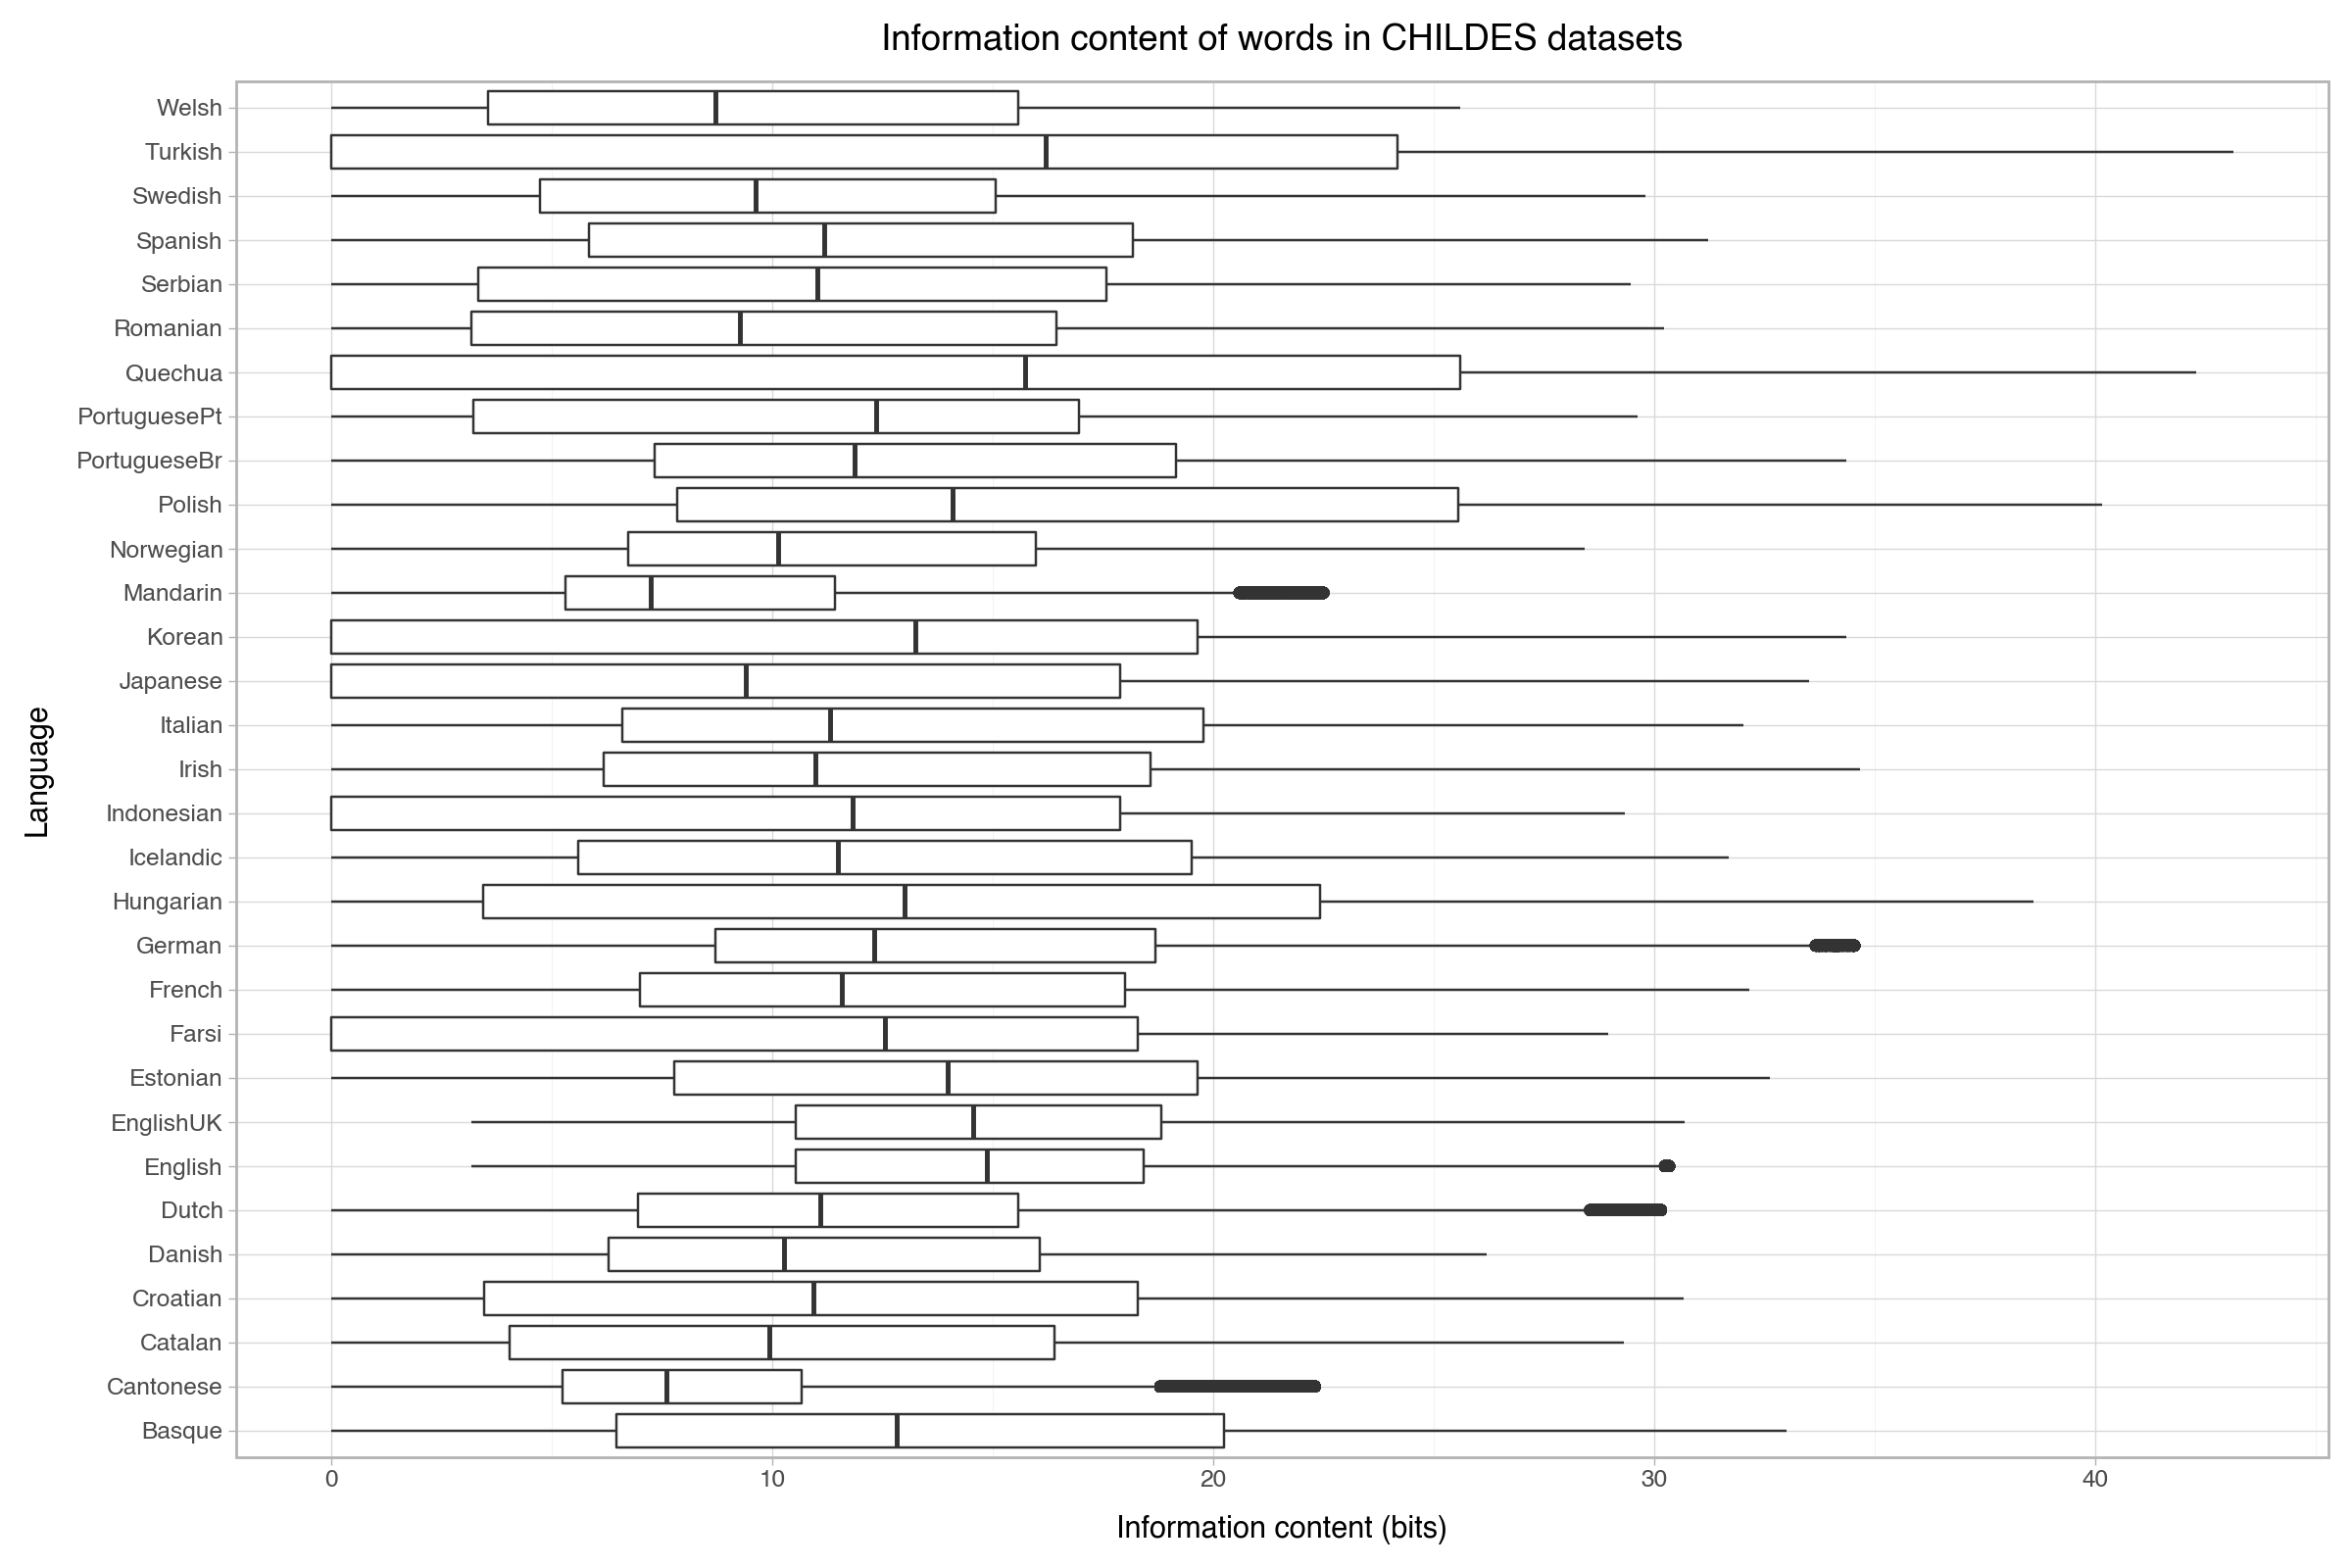

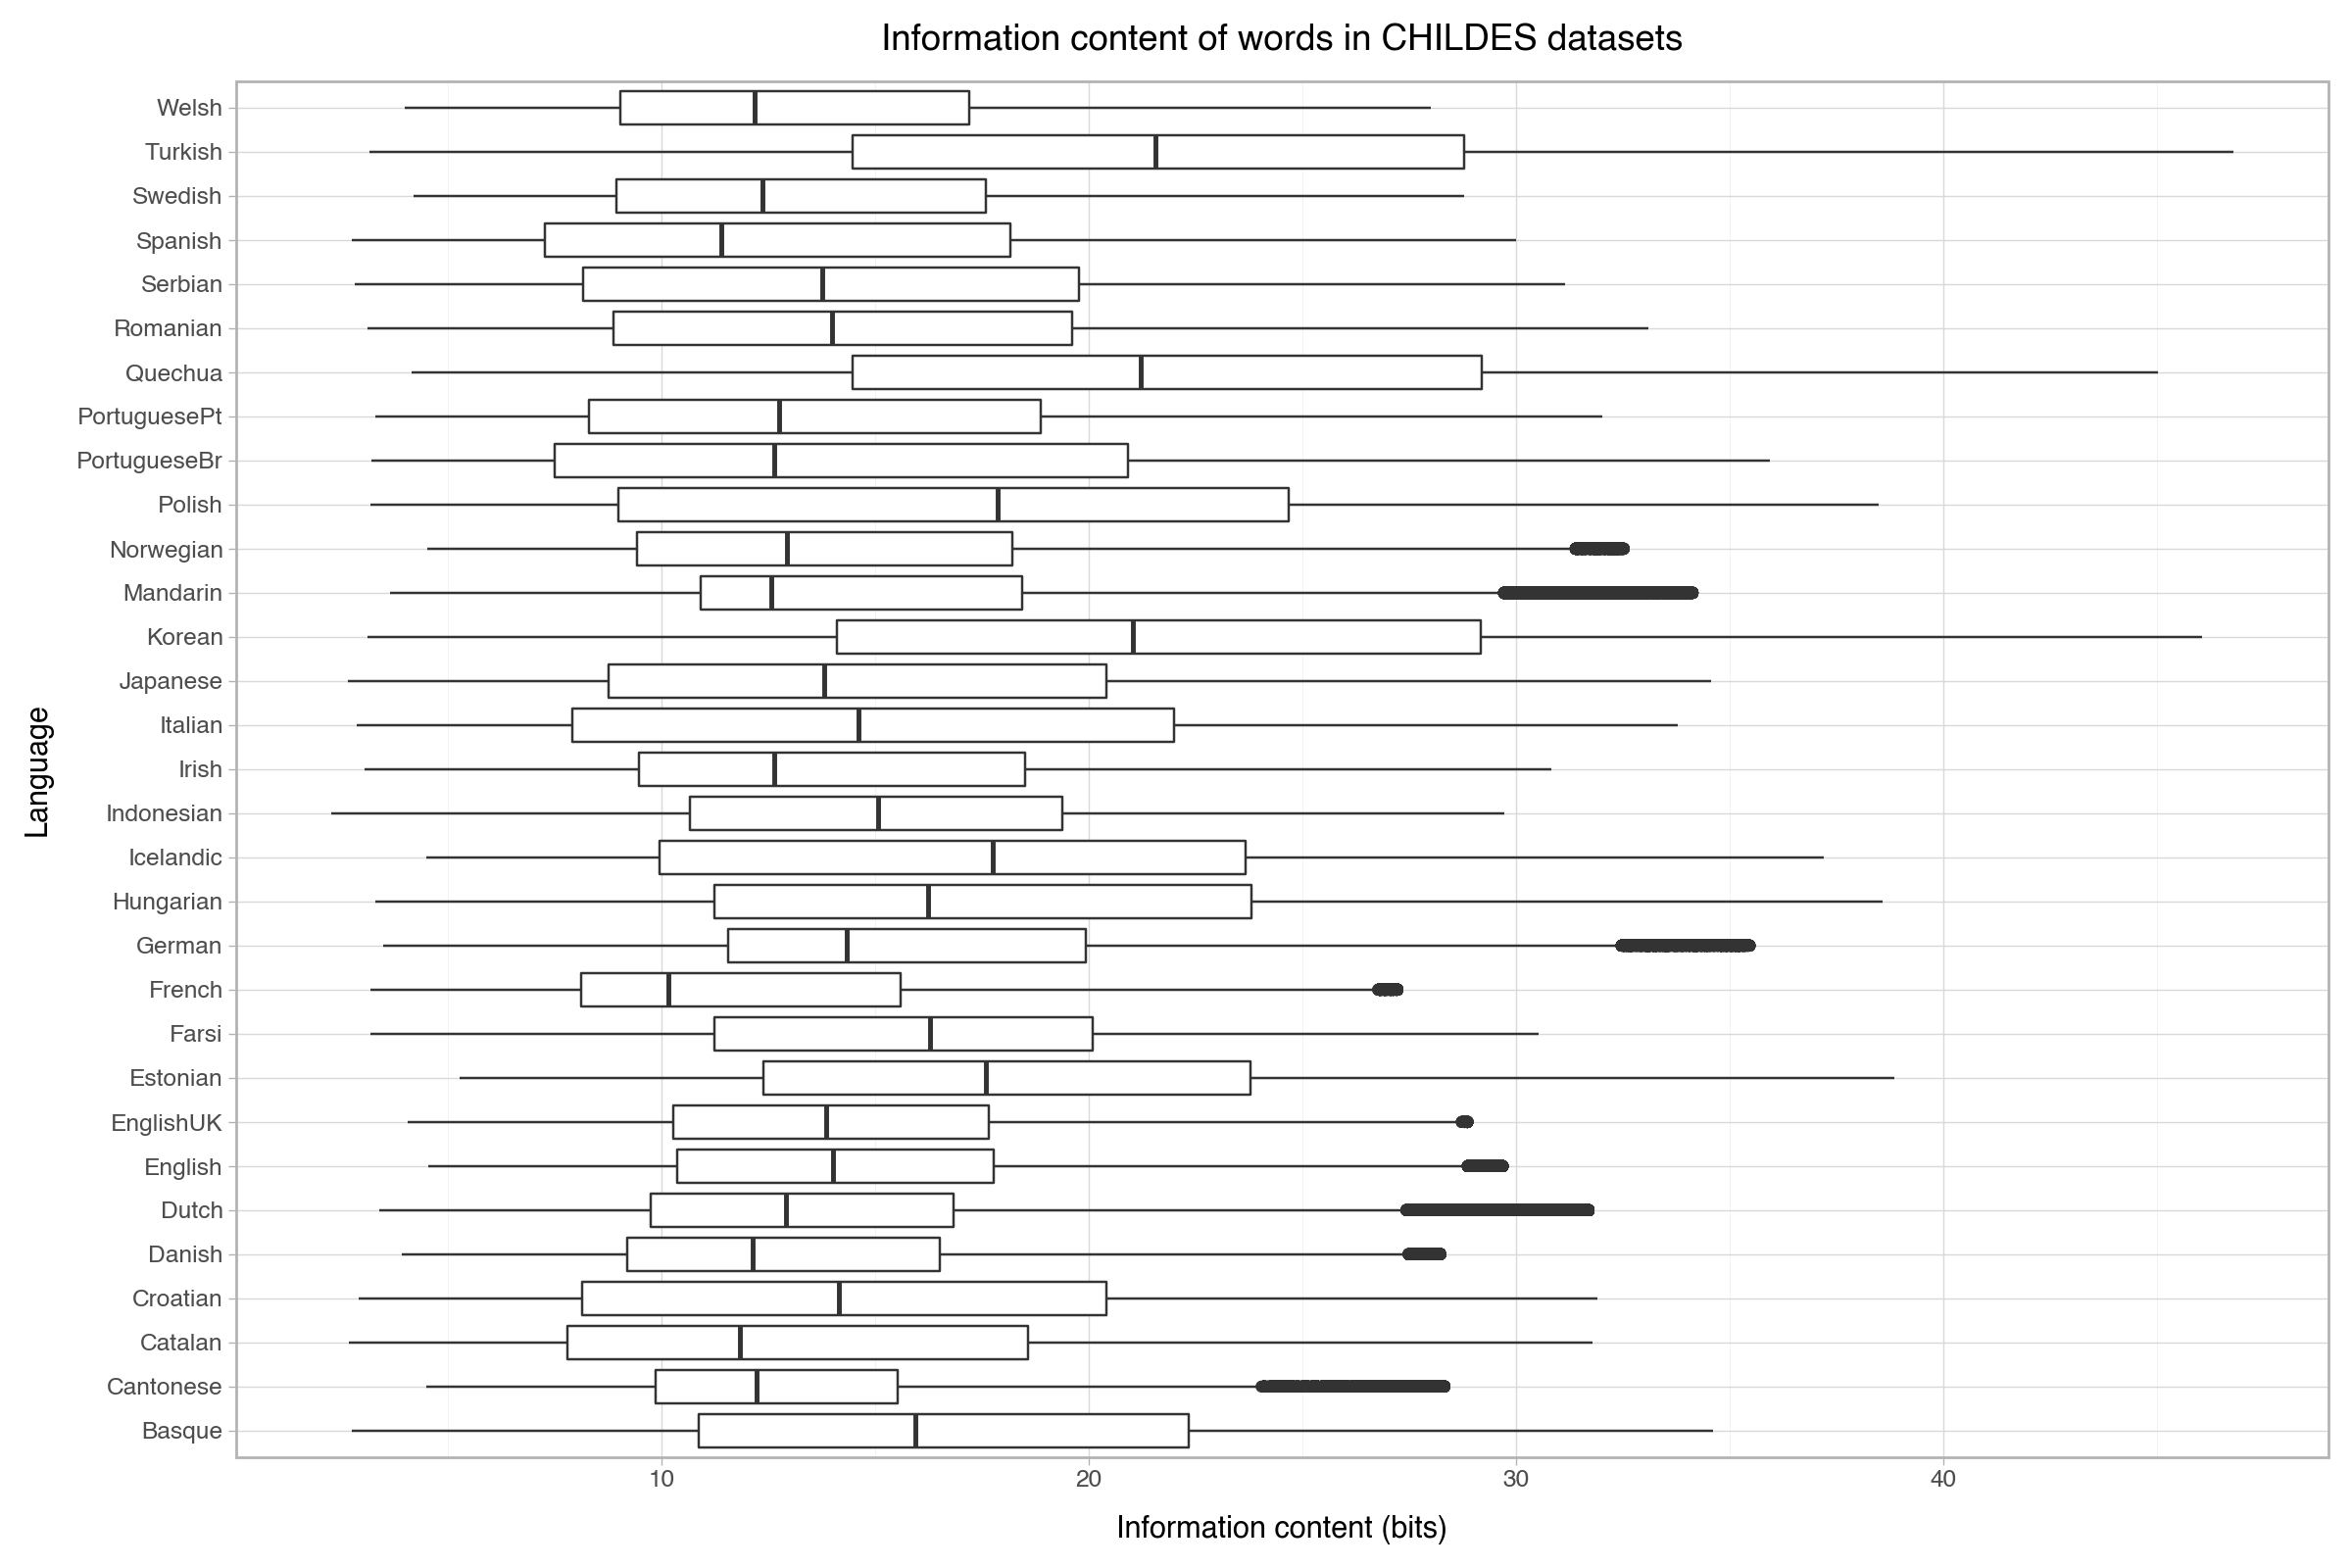

In [23]:
plot_information_content(information_content_orth, type='box')
plot_information_content(information_content_phon, type='box')

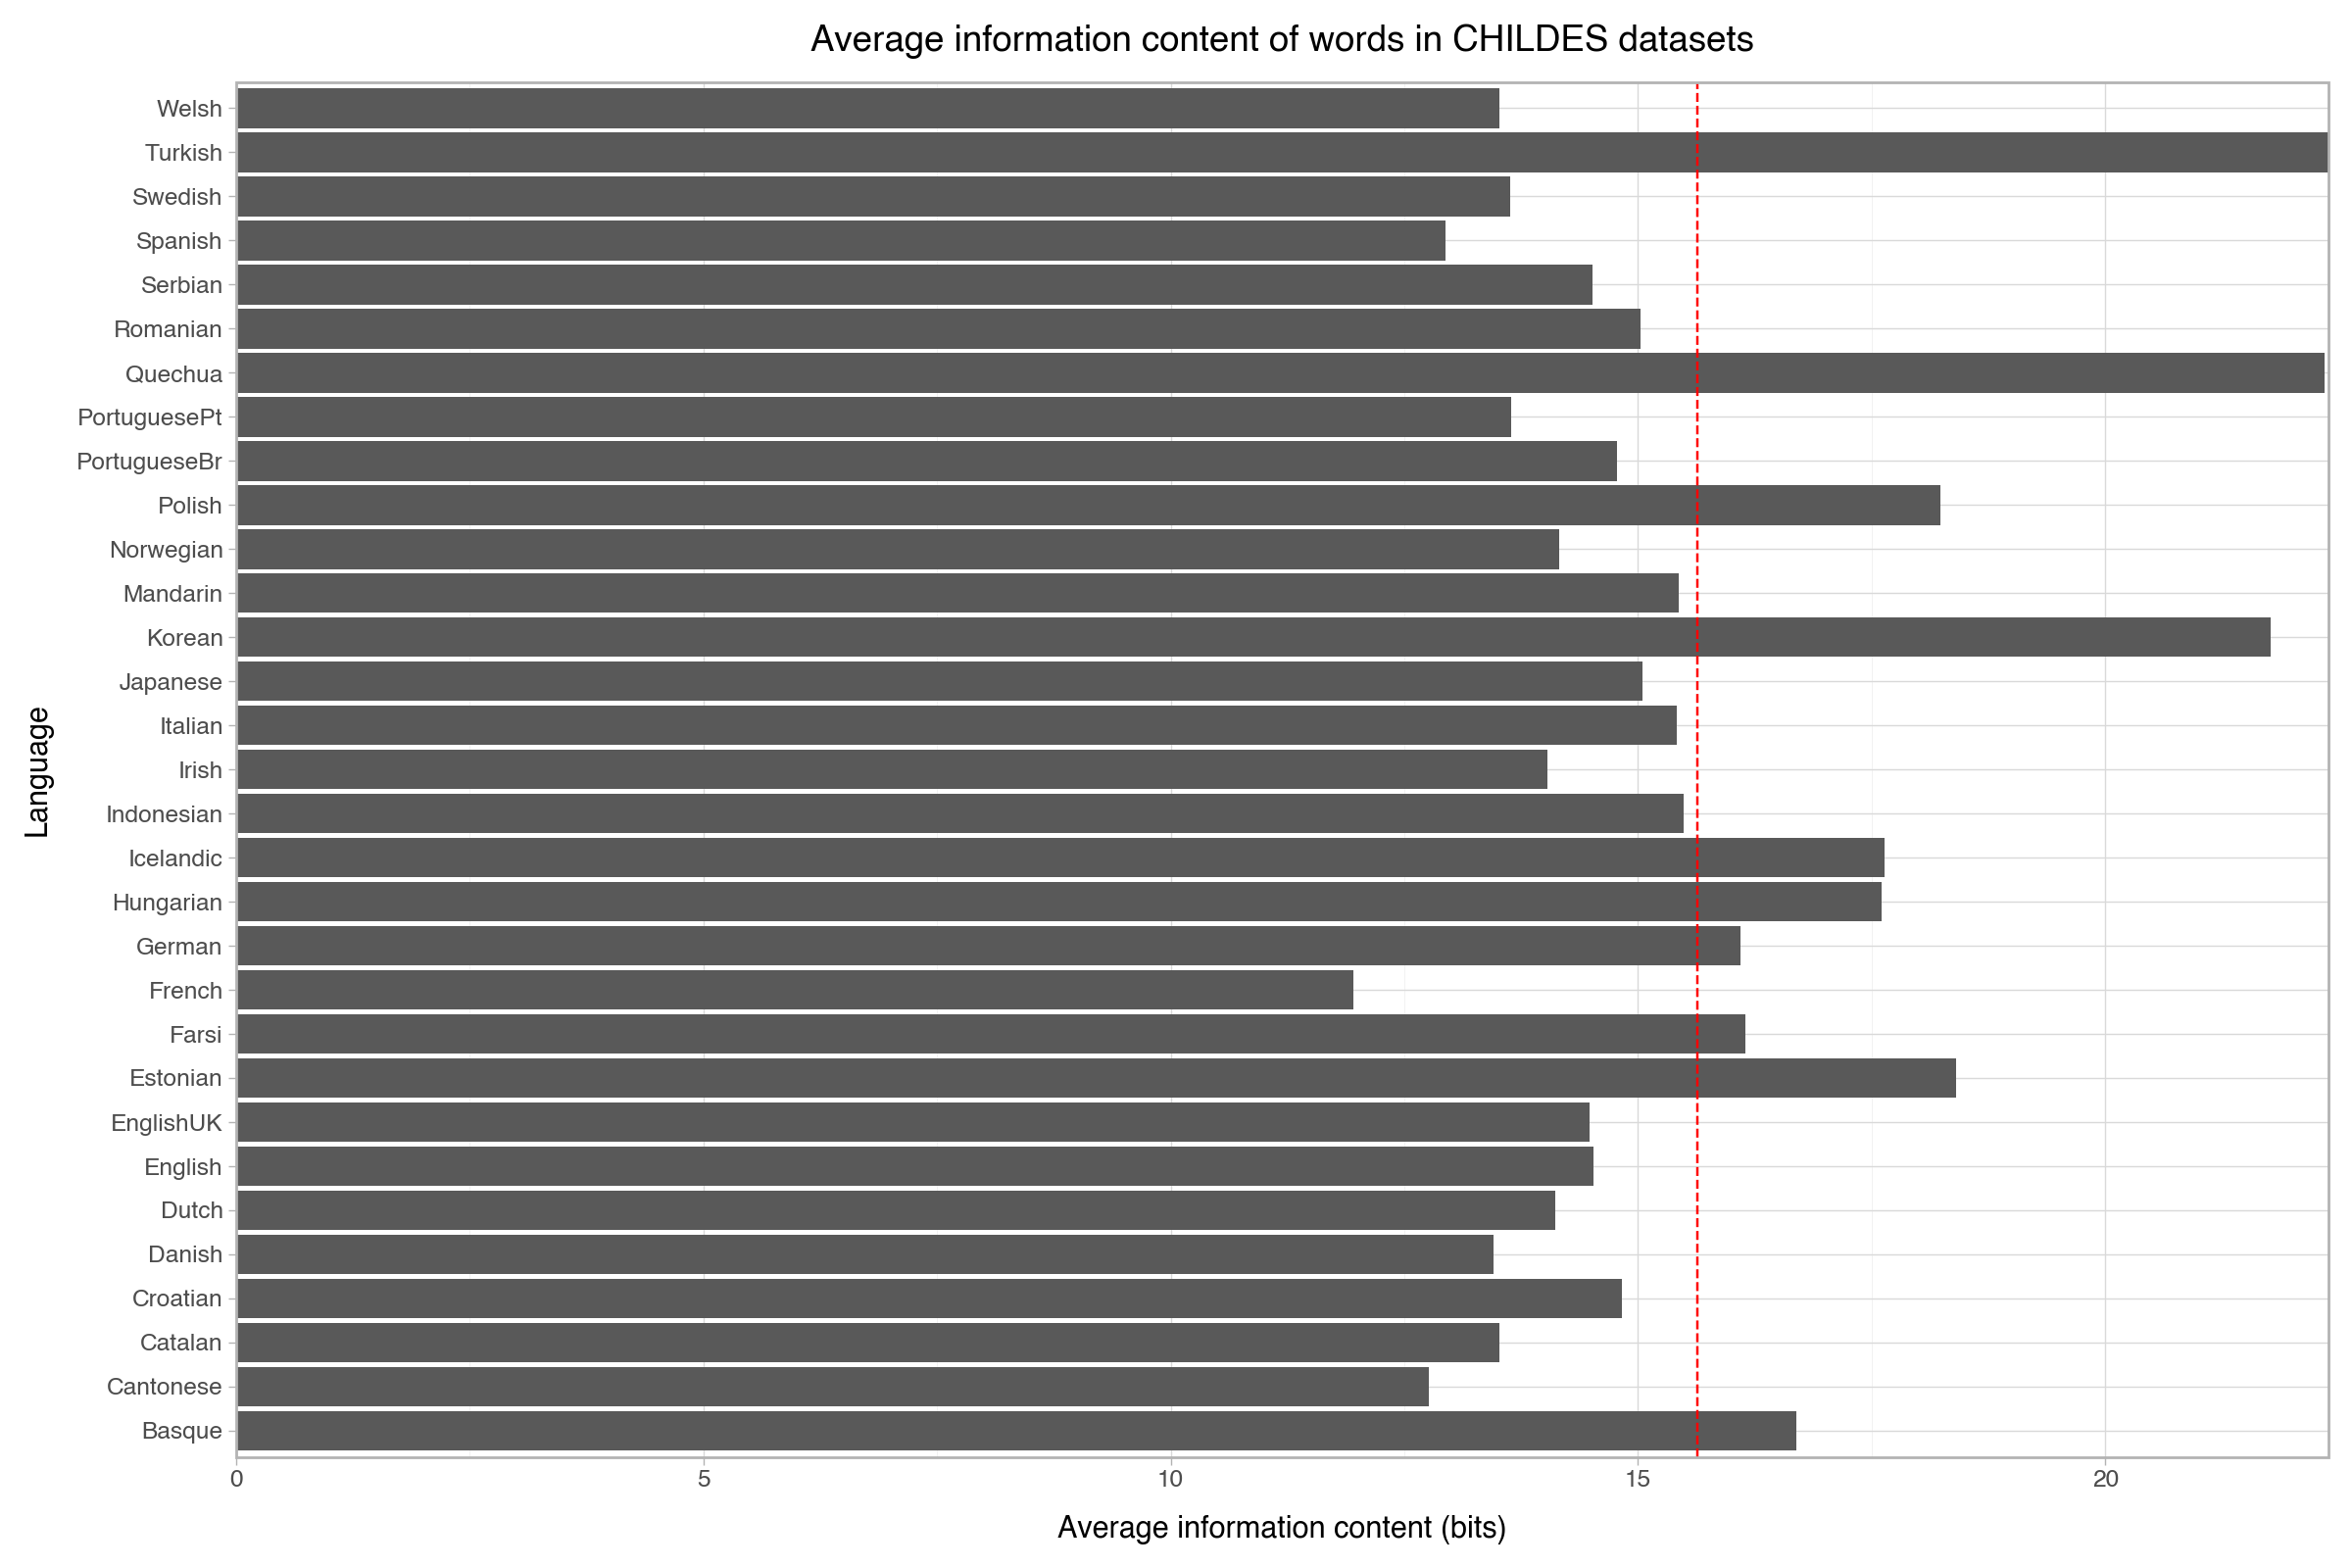

In [24]:
plot_information_content(information_content_phon, type='average')

100%|██████████| 31/31 [00:26<00:00,  1.17it/s]


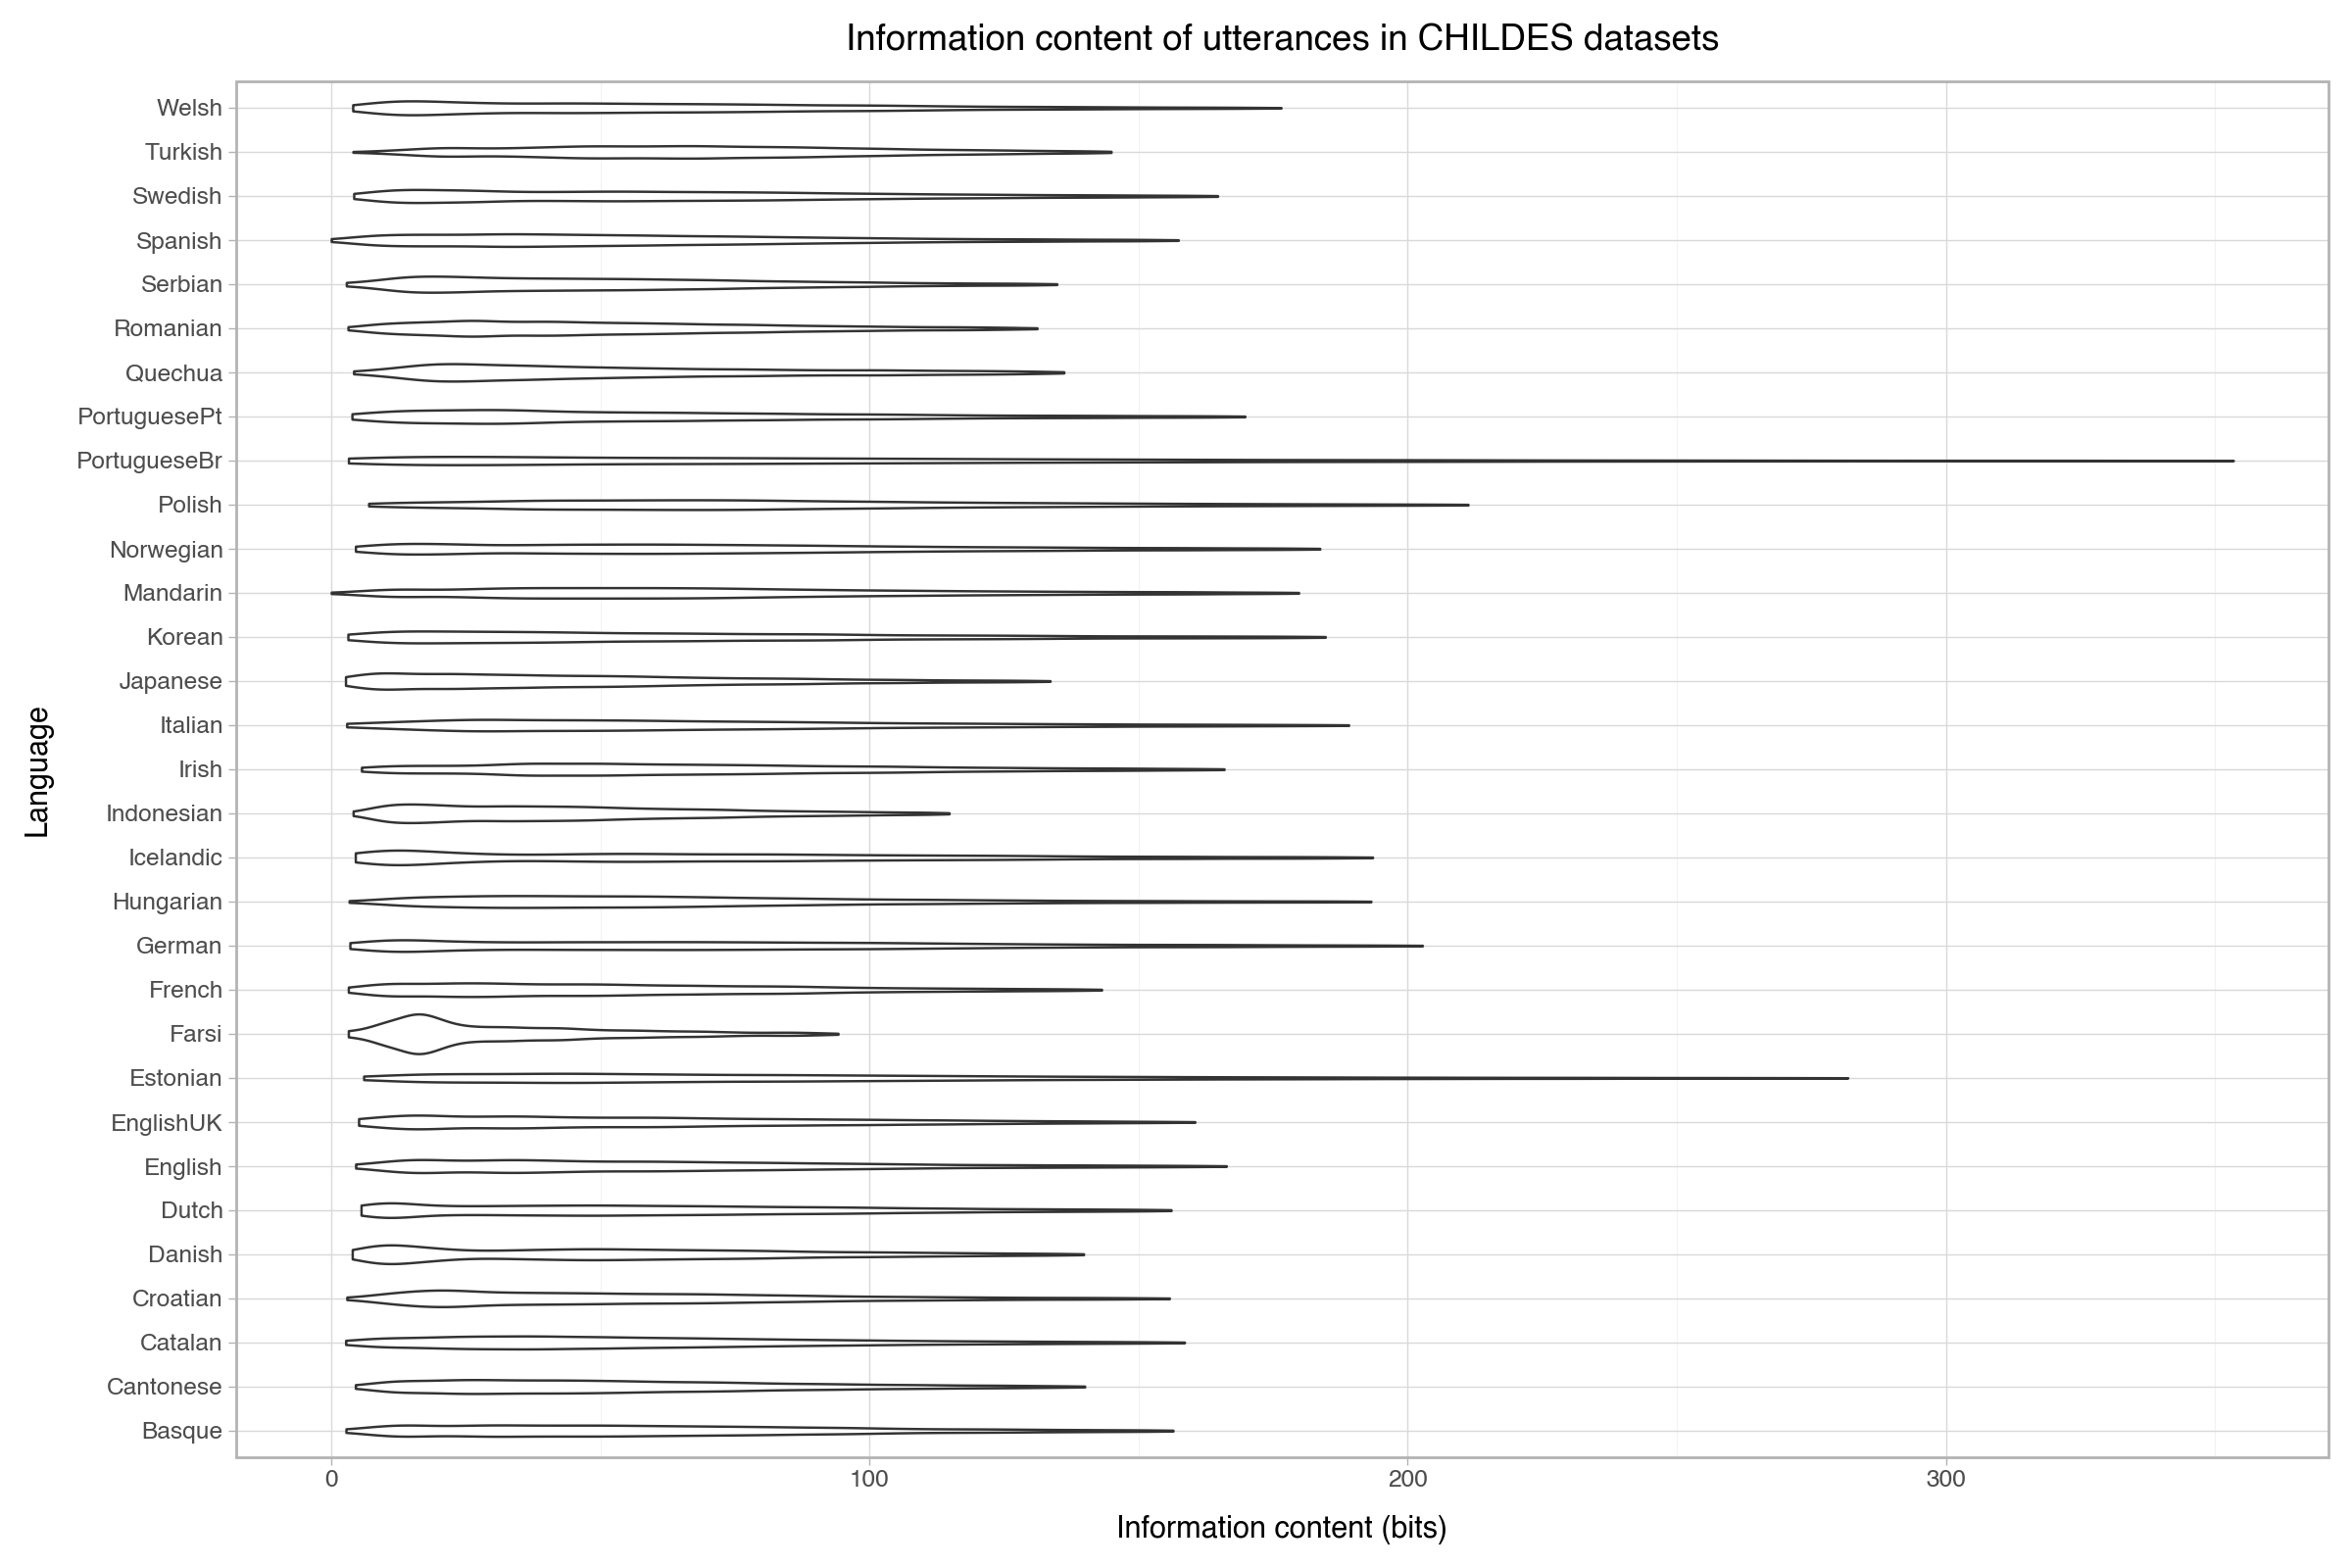

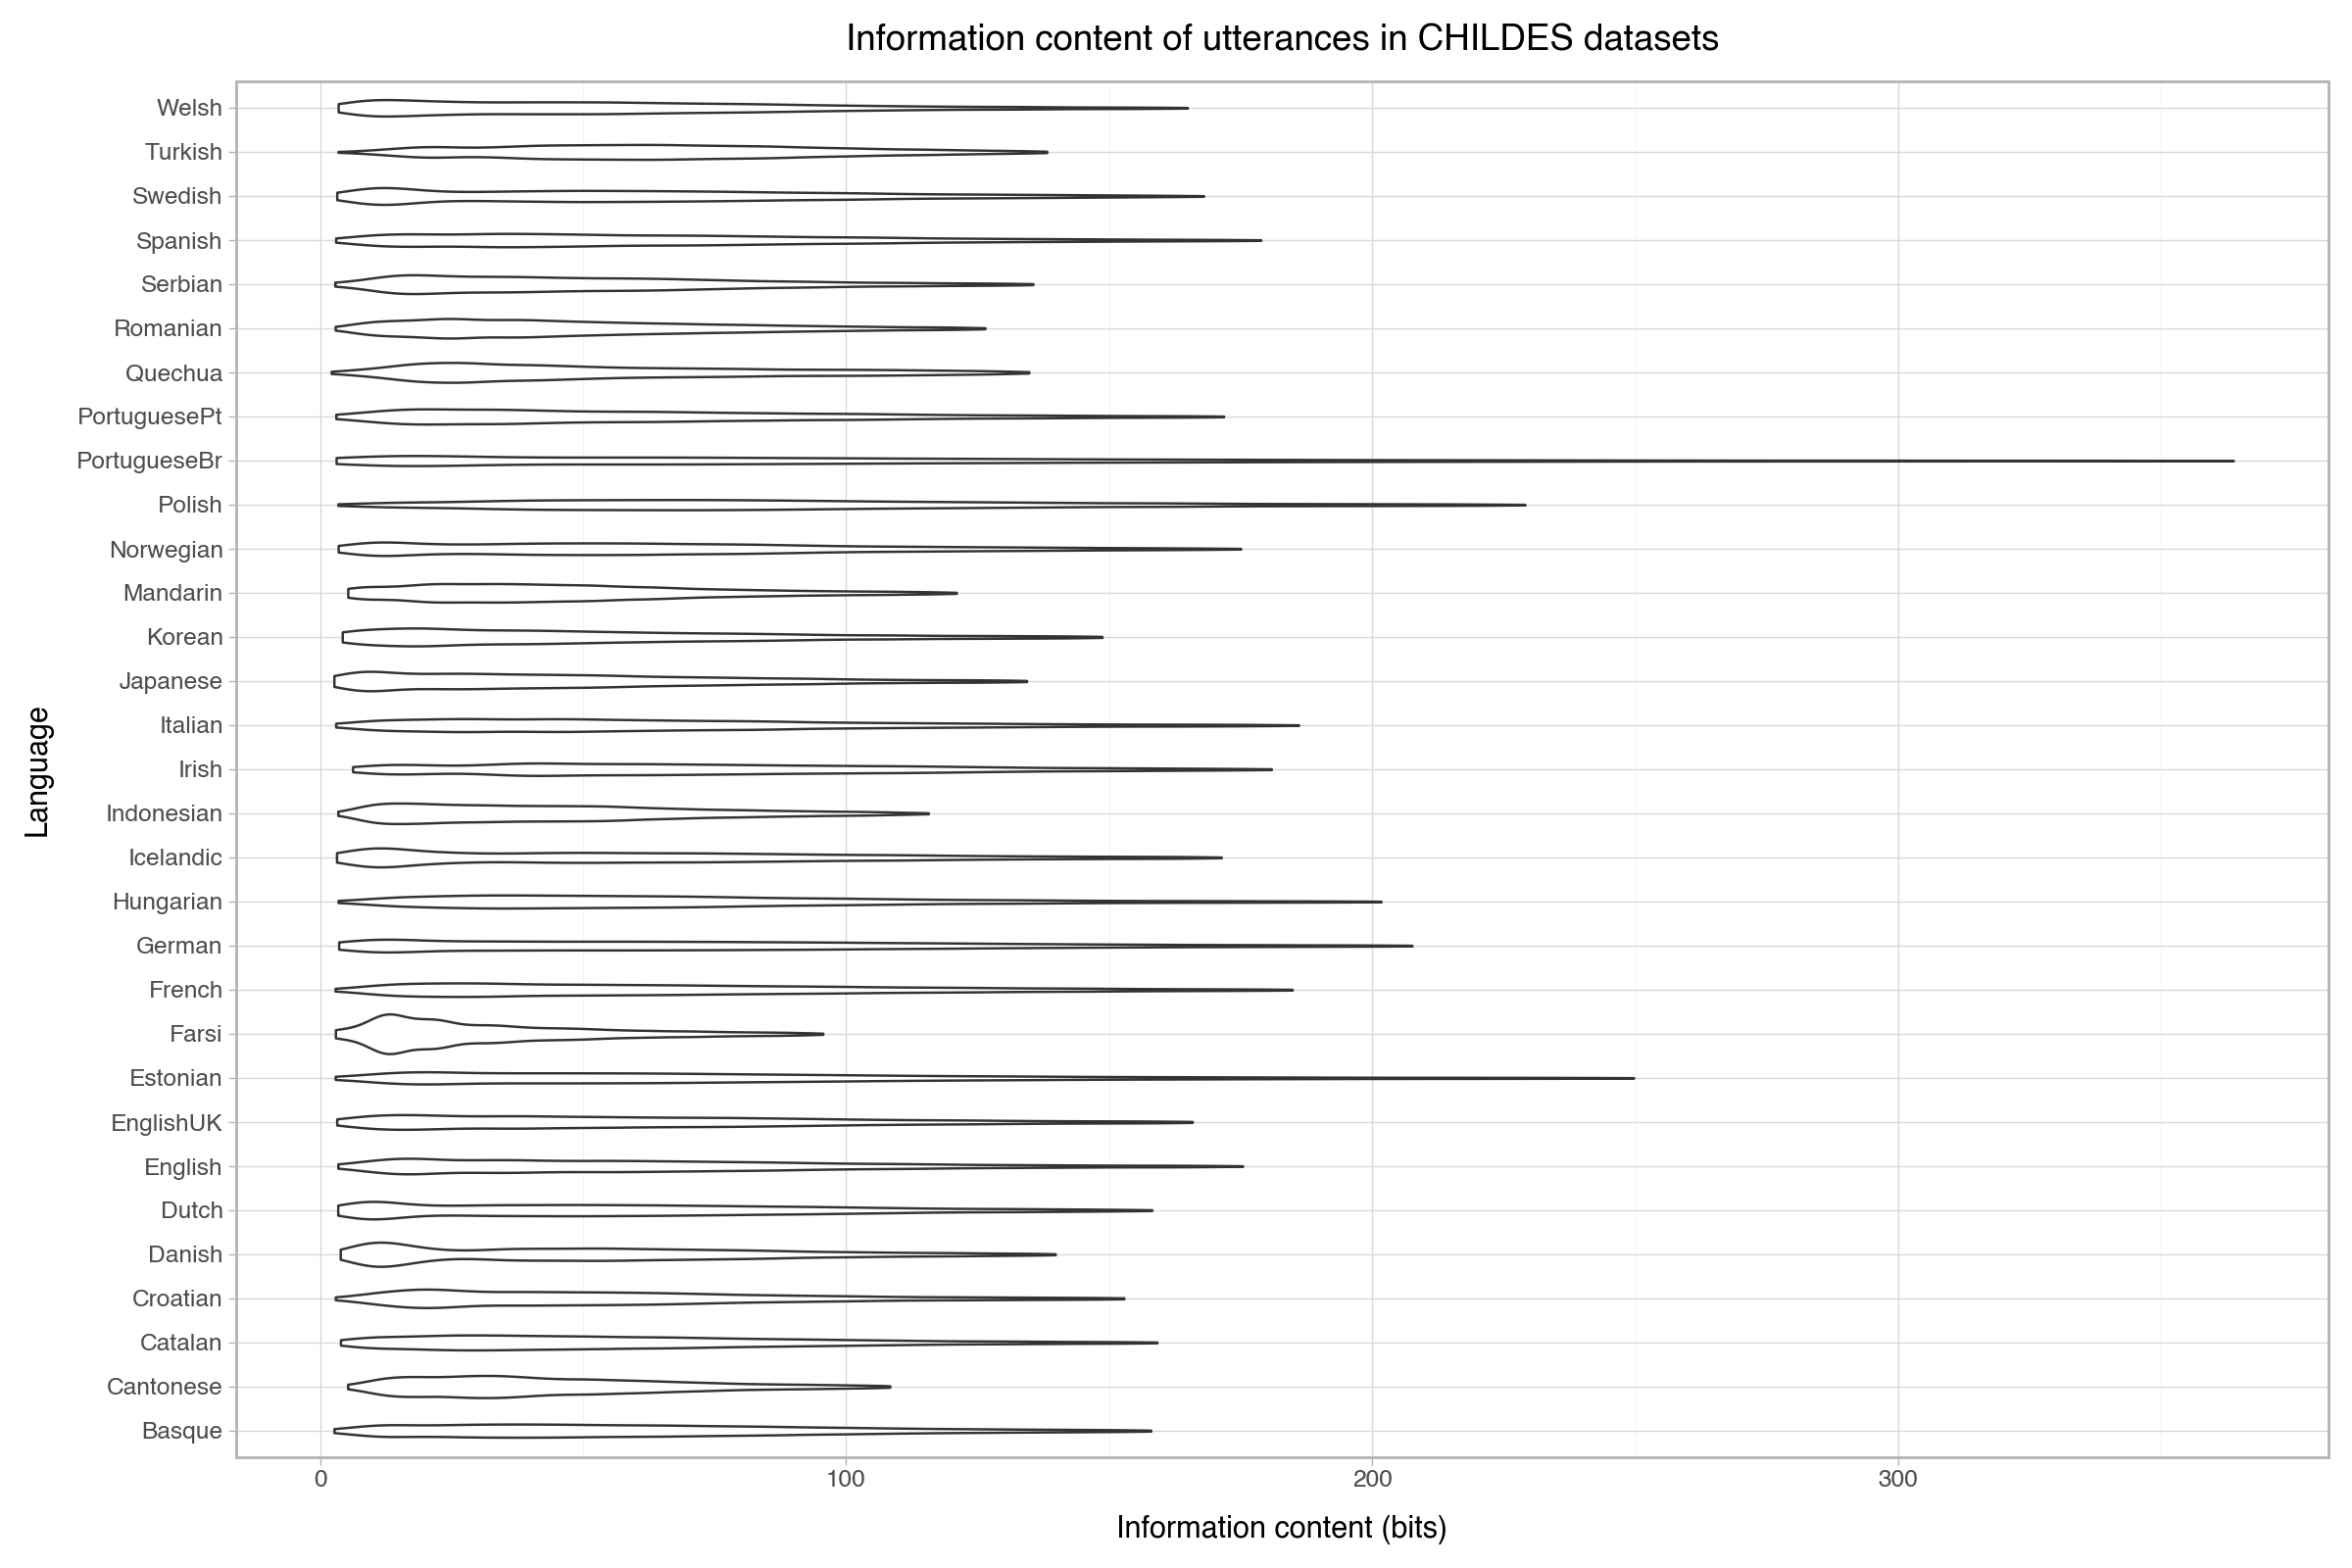

In [25]:
# Calculate the information content of each utterance in each language
information_content_utt_phon = get_information_content('phonemized_utterance', type='utterance', trim_top=95)
information_content_utt_orth = get_information_content('character_split_utterance', type='utterance', trim_top=95)

plot_information_content(information_content_utt_phon, type='violin', label='utterances')
plot_information_content(information_content_utt_orth, type='violin', label='utterances')


In [26]:
# Get average information content of words in each language 
average_phon = np.mean([np.mean(information_content_utt_phon[language]) for language in information_content_utt_phon])
average_orth = np.mean([np.mean(information_content_utt_orth[language]) for language in information_content_utt_orth])

std_dev_phon = np.std([np.mean(information_content_utt_phon[language]) for language in information_content_utt_phon])
std_dev_orth = np.std([np.mean(information_content_utt_orth[language]) for language in information_content_utt_orth])

print(f'Average information rate of utterances (ortho): {average_orth:.2f} ± {std_dev_orth:.2f}')
print(f'Average information rate of utterances (phon): {average_phon:.2f} ± {std_dev_phon:.2f}')

# Same for phonemes
average_phon = np.mean([np.mean(information_content_phon[language]) for language in information_content_phon])
average_orth = np.mean([np.mean(information_content_orth[language]) for language in information_content_orth])

std_dev_phon = np.std([np.mean(information_content_phon[language]) for language in information_content_phon])
std_dev_orth = np.std([np.mean(information_content_orth[language]) for language in information_content_orth])

print(f'Average information rate of words (ortho): {average_orth:.2f} ± {std_dev_orth:.2f}')
print(f'Average information rate of words (phon): {average_phon:.2f} ± {std_dev_phon:.2f}')



Average information rate of utterances (ortho): 59.39 ± 13.03
Average information rate of utterances (phon): 60.42 ± 12.24
Average information rate of words (ortho): 12.04 ± 1.98
Average information rate of words (phon): 15.63 ± 2.64


In [27]:
# Plot the difference in average information of words between orthographic and phonemic
information_diff = pd.DataFrame(columns=['language', 'information_orth', 'information_phon', 'information_diff', 'classification', 'family'])

for language in information_content_phon:
    #information_diff.loc[len(information_diff)] = [language, - np.mean(information_content_orth[language]) + np.mean(information_content_phon[language]), languages_classification[language], families[language]]
    orth = np.mean(information_content_orth[language])
    phon = np.mean(information_content_phon[language])
    
    information_diff.loc[len(information_diff)] = [language,
                                                    orth,
                                                    phon,
                                                    (orth - phon),
                                                   languages_classification[language],
                                                   families[language]]

# Reset index to allow sort
information_diff.sort_values('information_orth', ascending=False, inplace=True)
information_diff['language'] = pd.Categorical(information_diff['language'], categories=information_diff['language'], ordered=True)
information_diff.reset_index(drop=True, inplace=True)

information_diff

language  information_orth  information_phon  information_diff  \
0         Polish         15.863445         18.230613         -2.367168   
1        Turkish         15.601775         22.387008         -6.785233   
2        Quechua         15.426180         22.345997         -6.919816   
3      EnglishUK         15.006188         14.476820          0.529368   
4        English         14.897485         14.522146          0.375339   
5      Hungarian         14.269670         17.602788         -3.333119   
6       Estonian         13.621225         18.398224         -4.776998   
7         German         13.052659         16.099706         -3.047047   
8   PortugueseBr         12.977363         14.778668         -1.801305   
9         Basque         12.919968         16.693503         -3.773535   
10        Korean         12.503454         21.766896         -9.263442   
11     Icelandic         12.332197         17.638998         -5.306800   
12         Irish         12.266909         14.031703         -1.764793   
13        French         12.228727         11.954003          0.274724   
14       Italian         12.164073         15.409392         -3.245318   
15       Spanish         11.751970         12.943984         -1.192014   
16      Croatian         11.490037         14.822094         -3.332057   
17    Indonesian         11.366486         15.490128         -4.123641   
18      Japanese         11.201067         15.049085         -3.848019   
19  PortuguesePt         11.129432         13.643324         -2.513892   
20       Serbian         11.039457         14.514657         -3.475199   
21         Dutch         10.911689         14.114634         -3.202944   
22       Catalan         10.744276         13.517558         -2.773282   
23     Norwegian         10.662470         14.151417         -3.488947   
24       Swedish         10.642741         13.626823         -2.984082   
25         Farsi         10.619372         16.148112         -5.528740   
26      Romanian         10.559657         15.026883         -4.467226   
27        Danish         10.310580         13.449134         -3.138554   
28         Welsh          9.858617         13.512161         -3.653544   
29      Mandarin          8.059964         15.430851         -7.370887   
30     Cantonese          7.880176         12.756312         -4.876135   

   classification         family  
0       synthetic  Indo-European  
1       synthetic         Turkic  
2       synthetic       Quechuan  
3      analytical  Indo-European  
4      analytical  Indo-European  
5       synthetic         Uralic  
6       synthetic         Uralic  
7       synthetic  Indo-European  
8       synthetic  Indo-European  
9       synthetic        Isolate  
10      synthetic       Koreanic  
11      synthetic  Indo-European  
12      synthetic  Indo-European  
13     analytical  Indo-European  
14      synthetic  Indo-European  
15      synthetic  Indo-European  
16      synthetic  Indo-European  
17     analytical   Austronesian  
18      synthetic        Japonic  
19      synthetic  Indo-European  
20      synthetic  Indo-European  
21     analytical  Indo-European  
22      synthetic  Indo-European  
23     analytical  Indo-European  
24     analytical  Indo-European  
25     analytical  Indo-European  
26      synthetic  Indo-European  
27     analytical  Indo-European  
28      synthetic  Indo-European  
29     analytical   Sino-Tibetan  
30     analytical   Sino-Tibetan

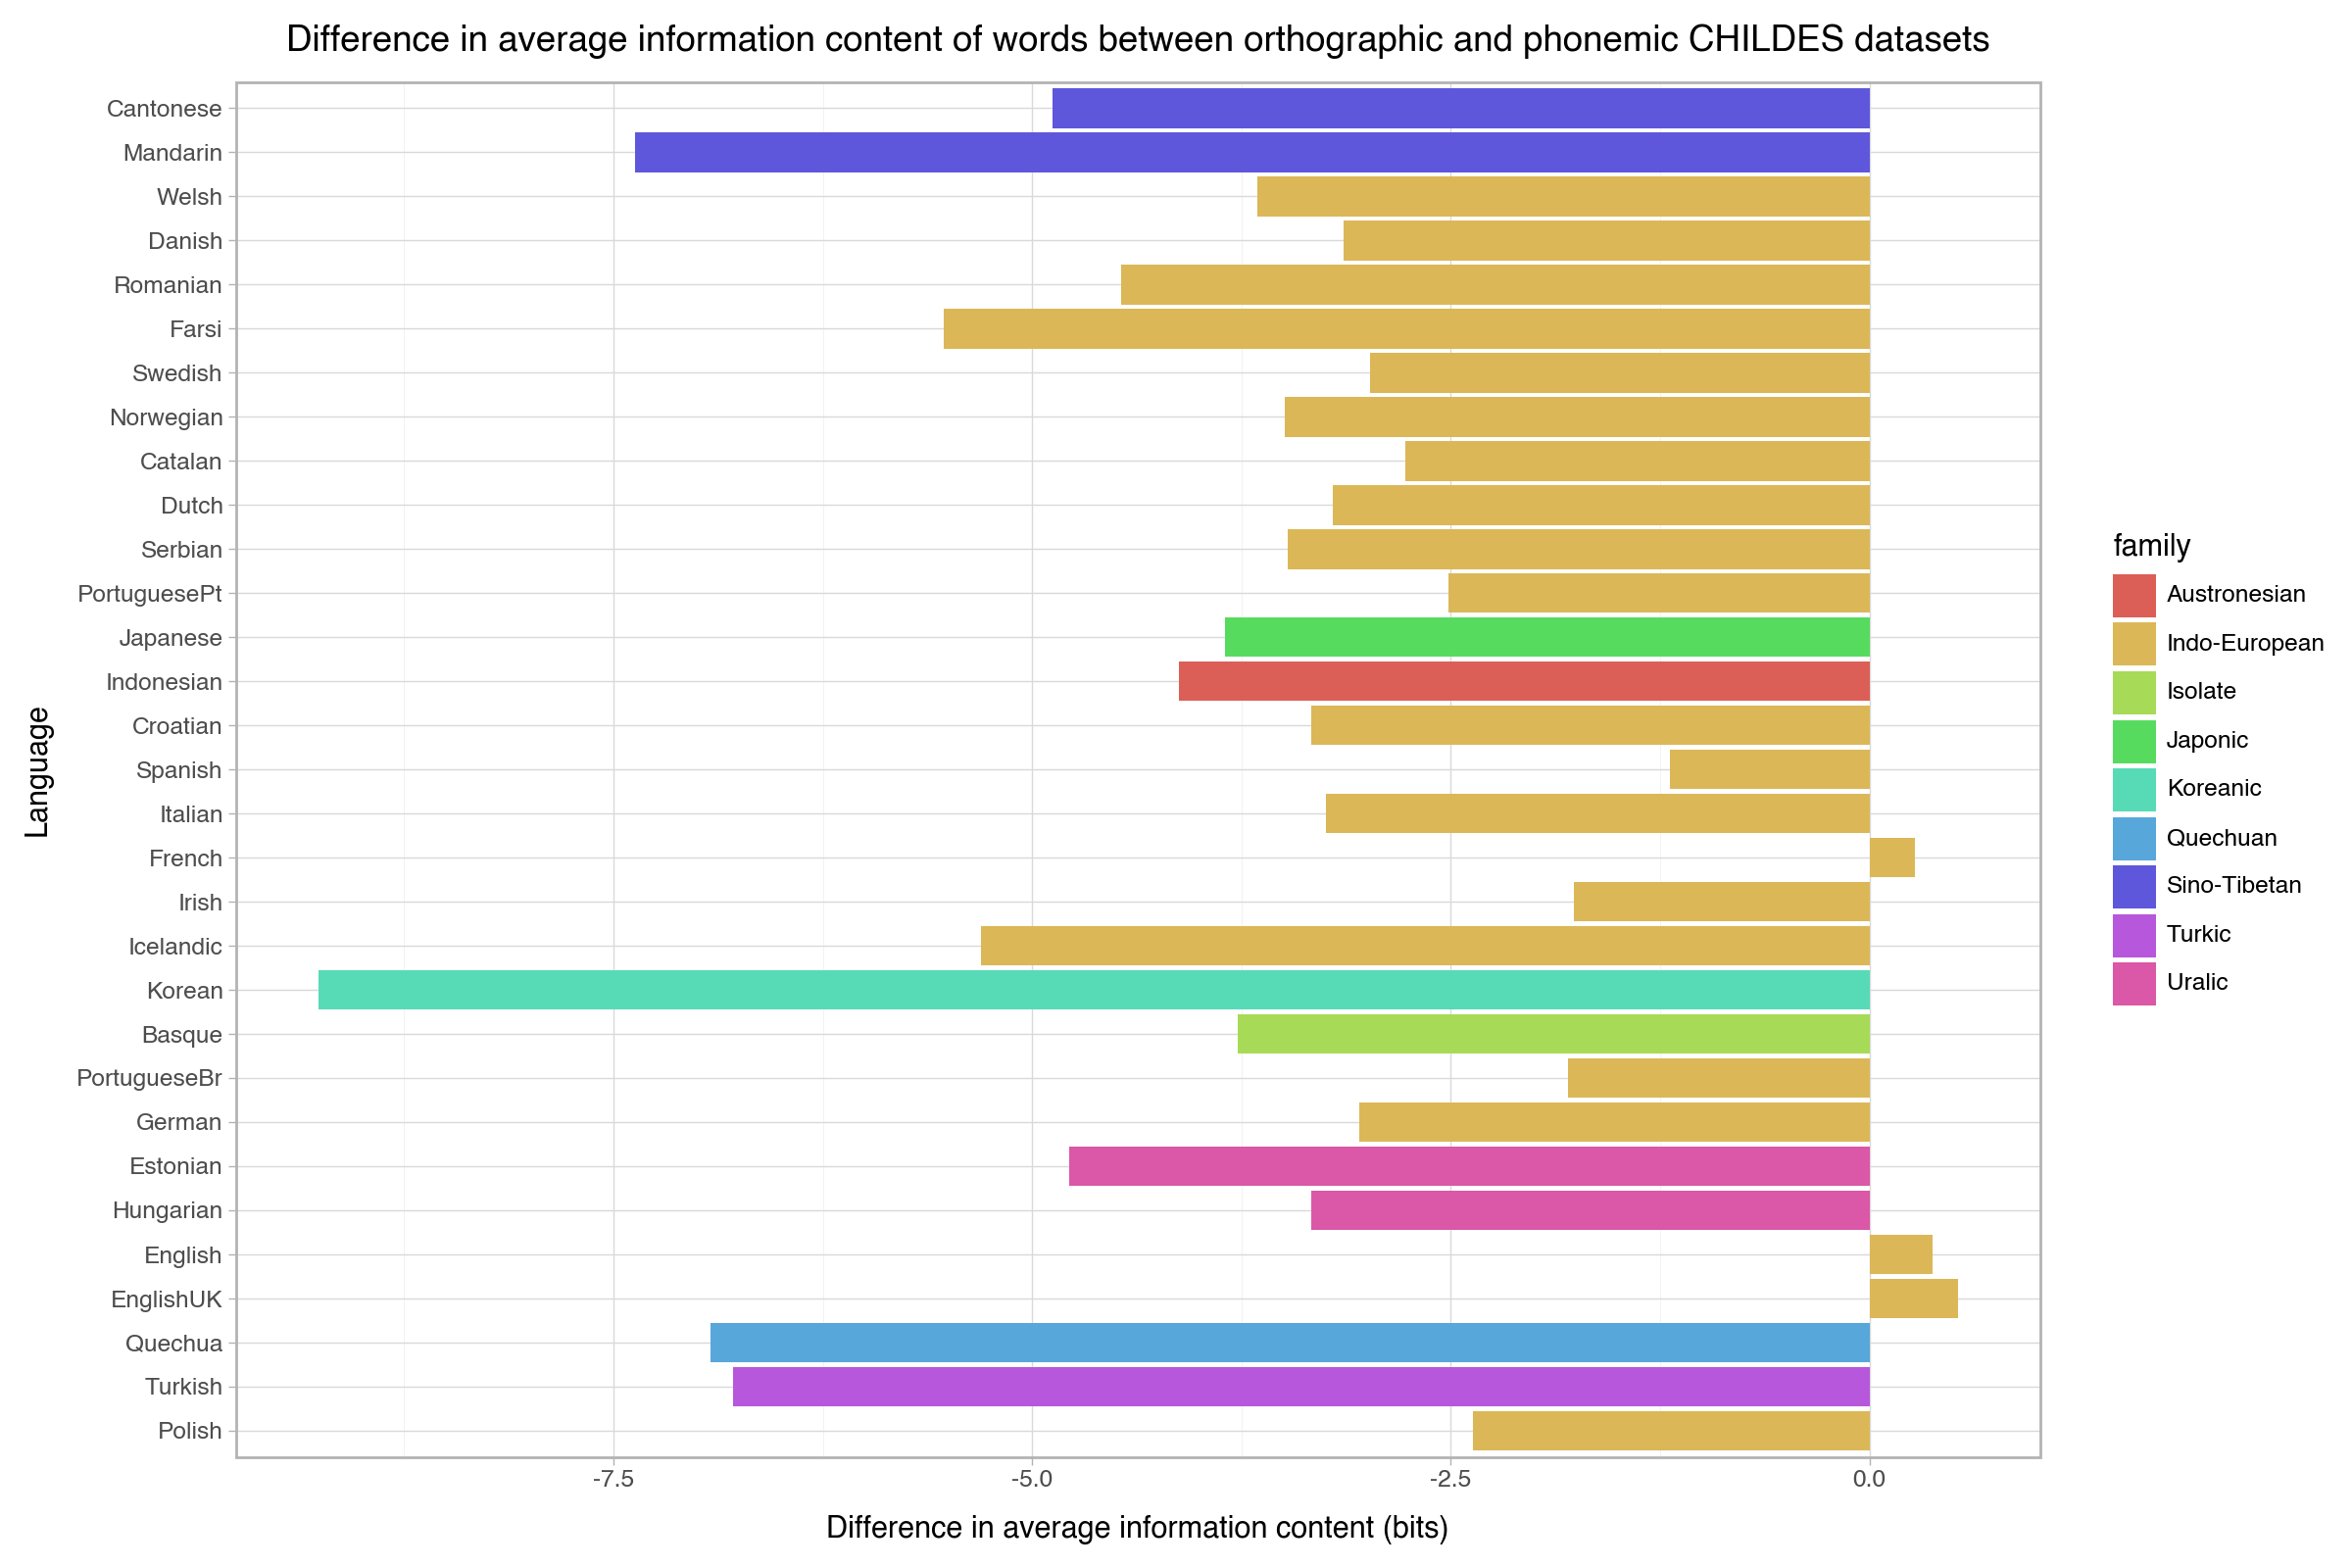

In [28]:

p = (p9.ggplot(information_diff, p9.aes(x='language', y='information_diff', fill='family'))
        + p9.geom_bar(stat='identity')
        + p9.coord_flip()
        + p9.theme(figure_size=(12, 8))
        + p9.ggtitle('Difference in average information content of words between orthographic and phonemic CHILDES datasets')
        + p9.xlab('Language')
        + p9.ylab('Difference in average information content (bits)')
    )

p.show()

## Age Analysis

/var/folders/nz/6tzh0bsj2txd1cz18gpcms_c0000gn/T/ipykernel_35486/1564609848.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
/Users/zebulongoriely/Documents/UniDocs/PHD/research/projects/CorpusPhonemizers/env/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 16646 rows containing non-finite values.


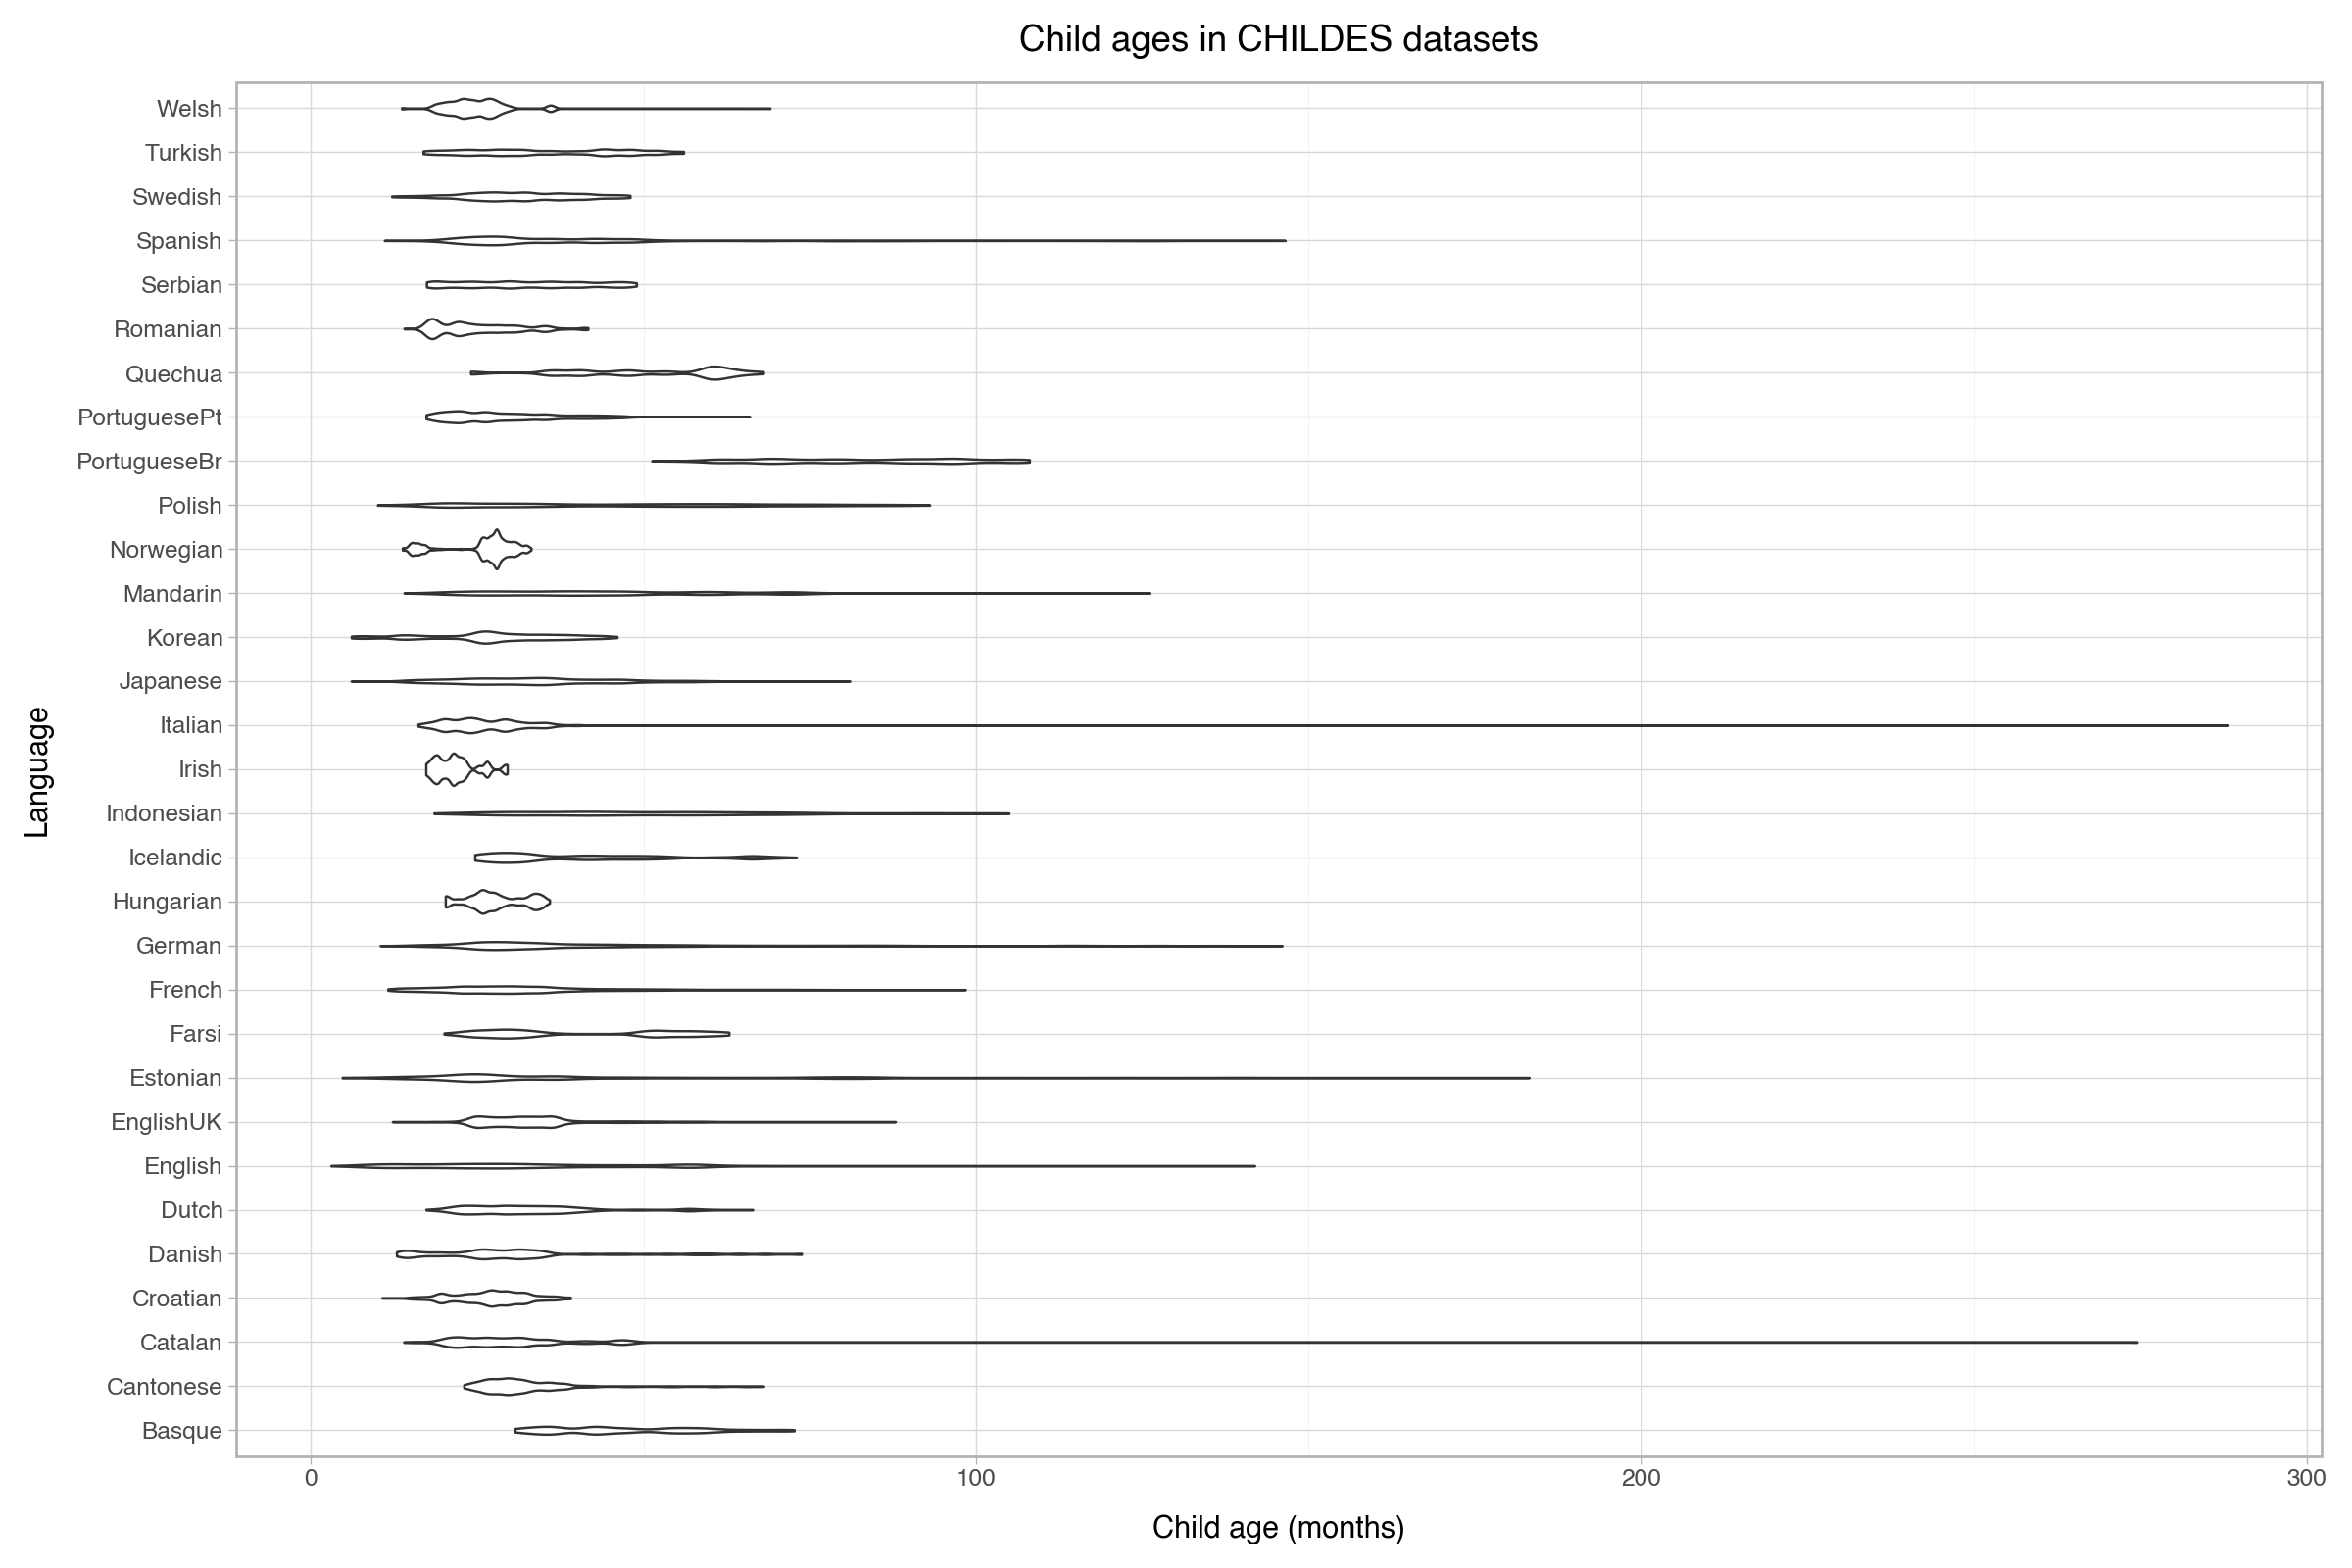

In [29]:
# Plot violin plot of child ages in each language
ages = pd.DataFrame(columns=['language', 'age'])

for language, dataset in datasets.items():
    mini_ages = dataset[['target_child_age']].rename(columns={'target_child_age': 'age'})
    # Sample 10,000
    mini_ages = mini_ages.sample(10000)
    mini_ages['language'] = language
    ages = pd.concat([ages, mini_ages])

p = (p9.ggplot(ages, p9.aes(x='language', y='age'))
        + p9.geom_violin()
        + p9.coord_flip()
        + p9.theme(figure_size=(12, 8))
        + p9.ggtitle('Child ages in CHILDES datasets')
        + p9.xlab('Language')
        + p9.ylab('Child age (months)')
    )

p.show()

In [30]:
# For English, get 10 bins of equal size for target_child_age
english = pd.DataFrame(datasets['English'])
english['target_child_age'] = english['target_child_age'].astype(float)
english['age_bin'] = pd.qcut(english['target_child_age'], 5)
age_bins = english['age_bin'].unique()
age_bins = age_bins.sort_values()

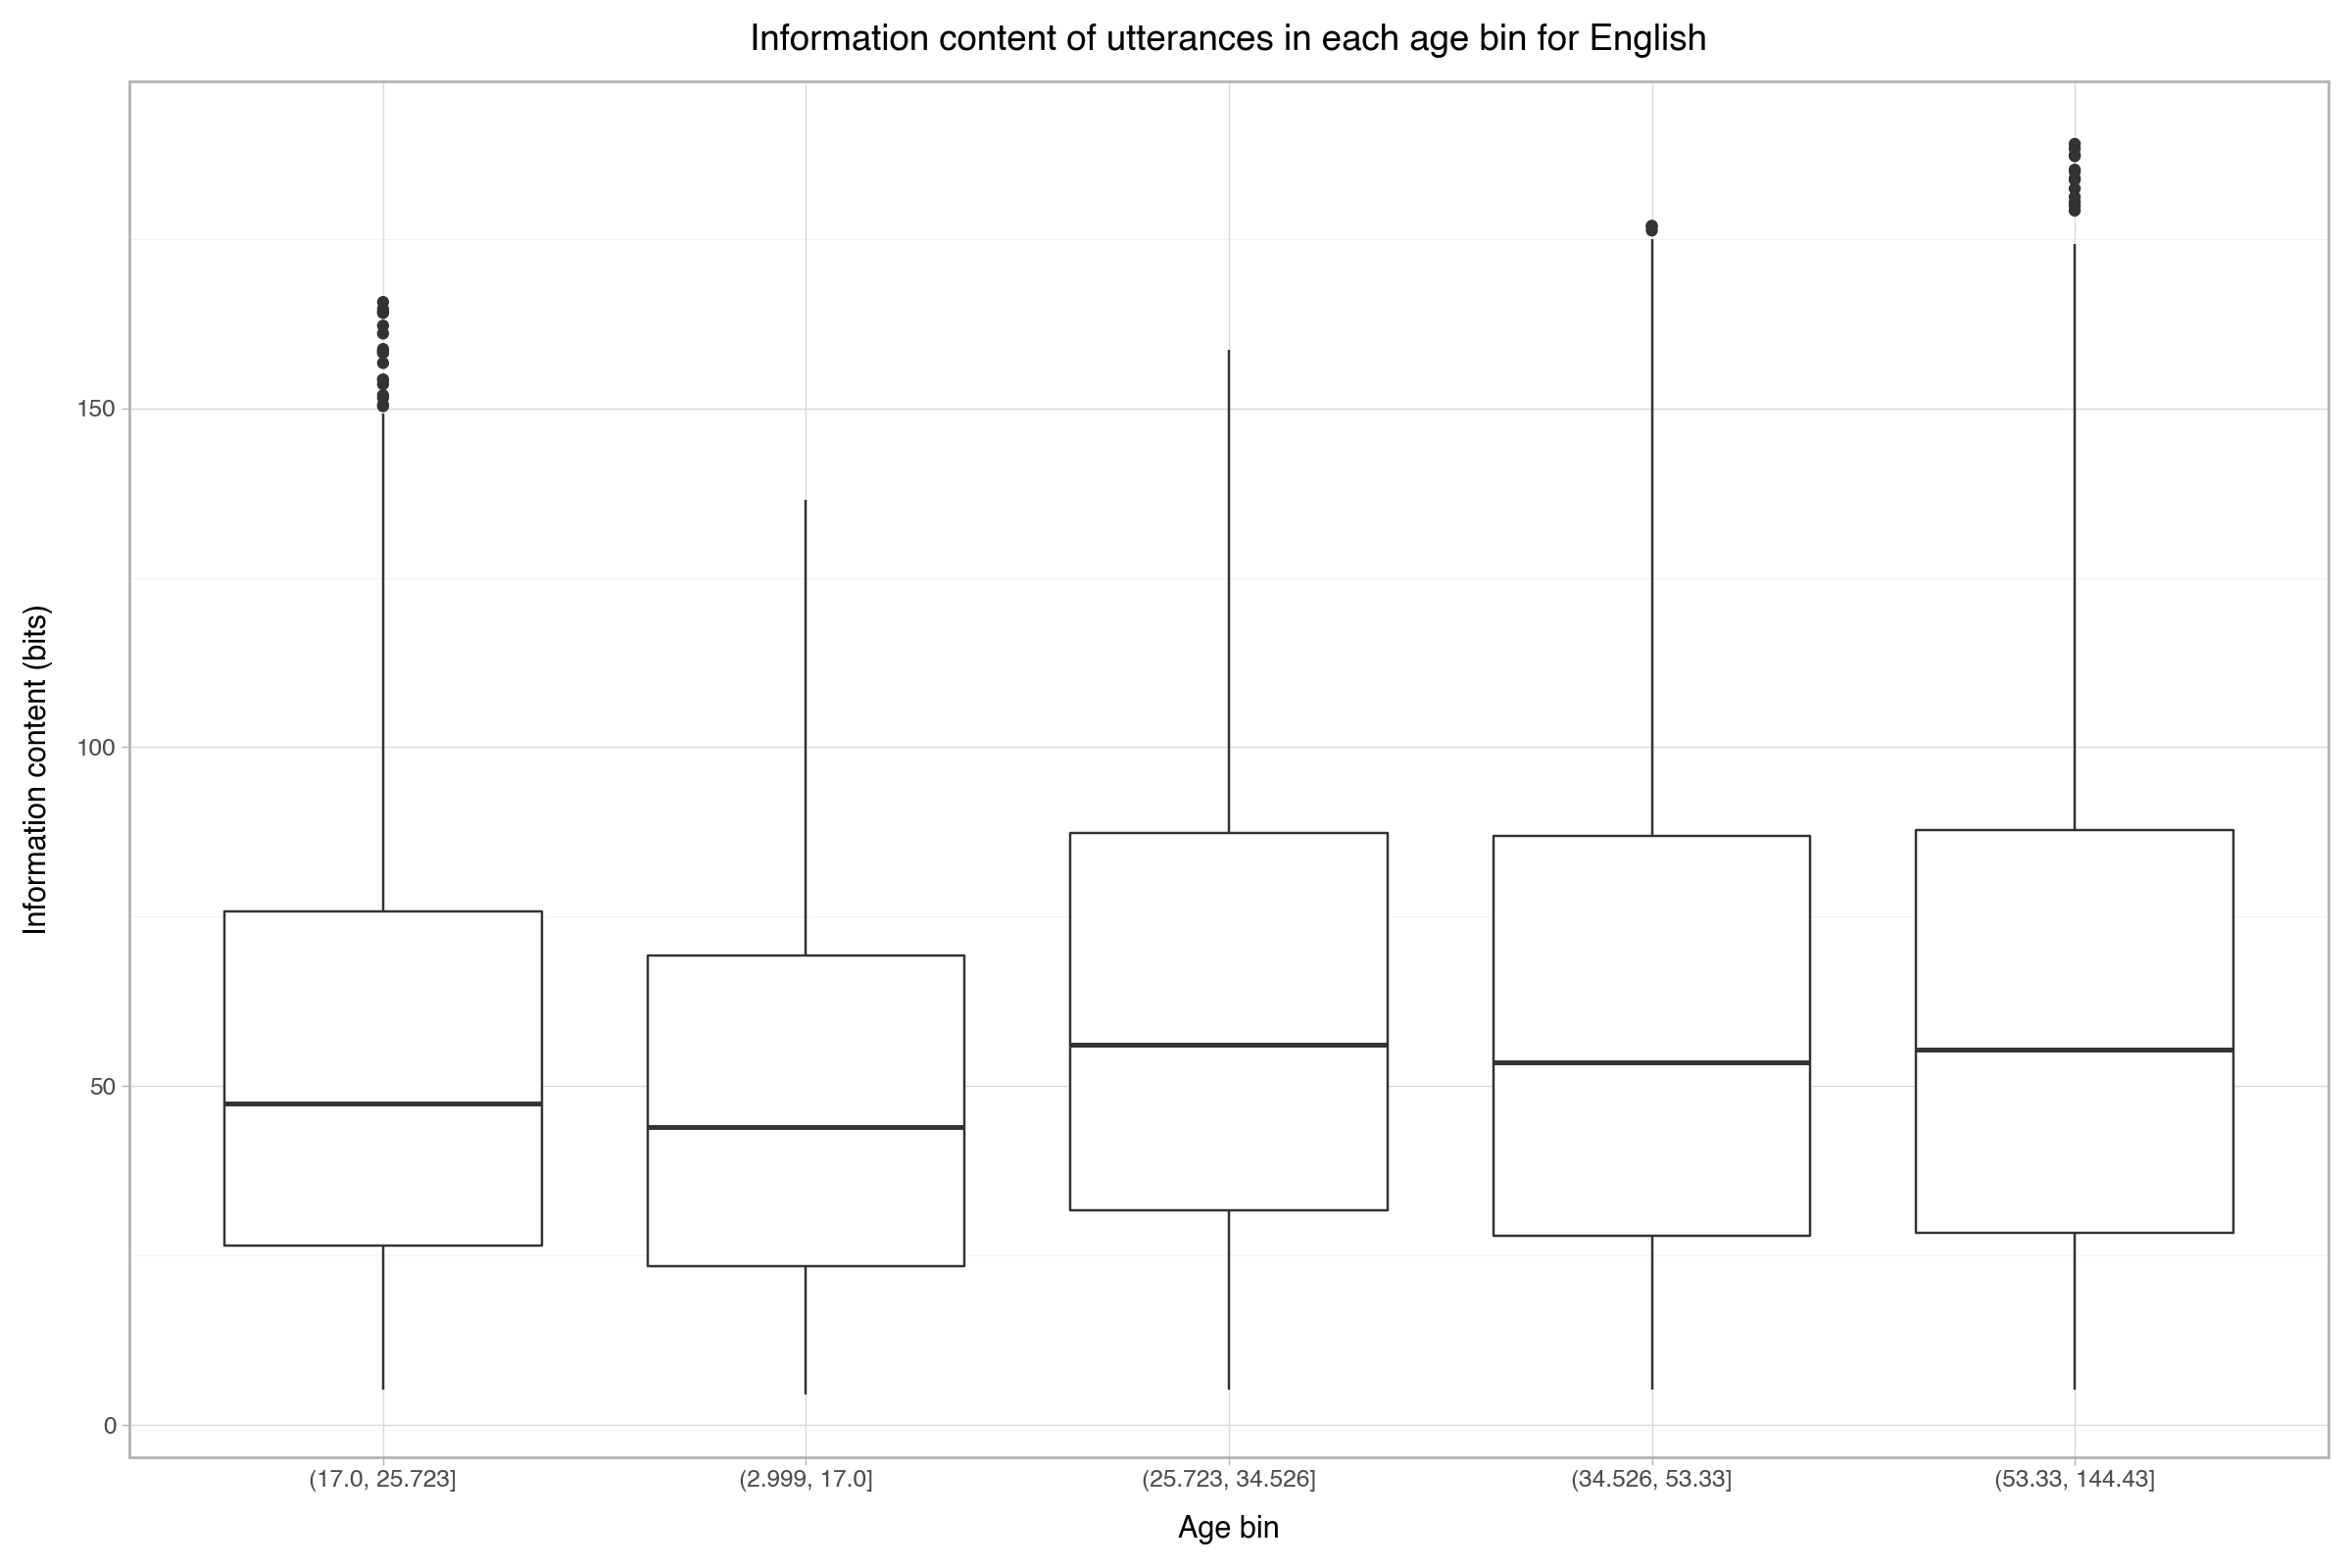

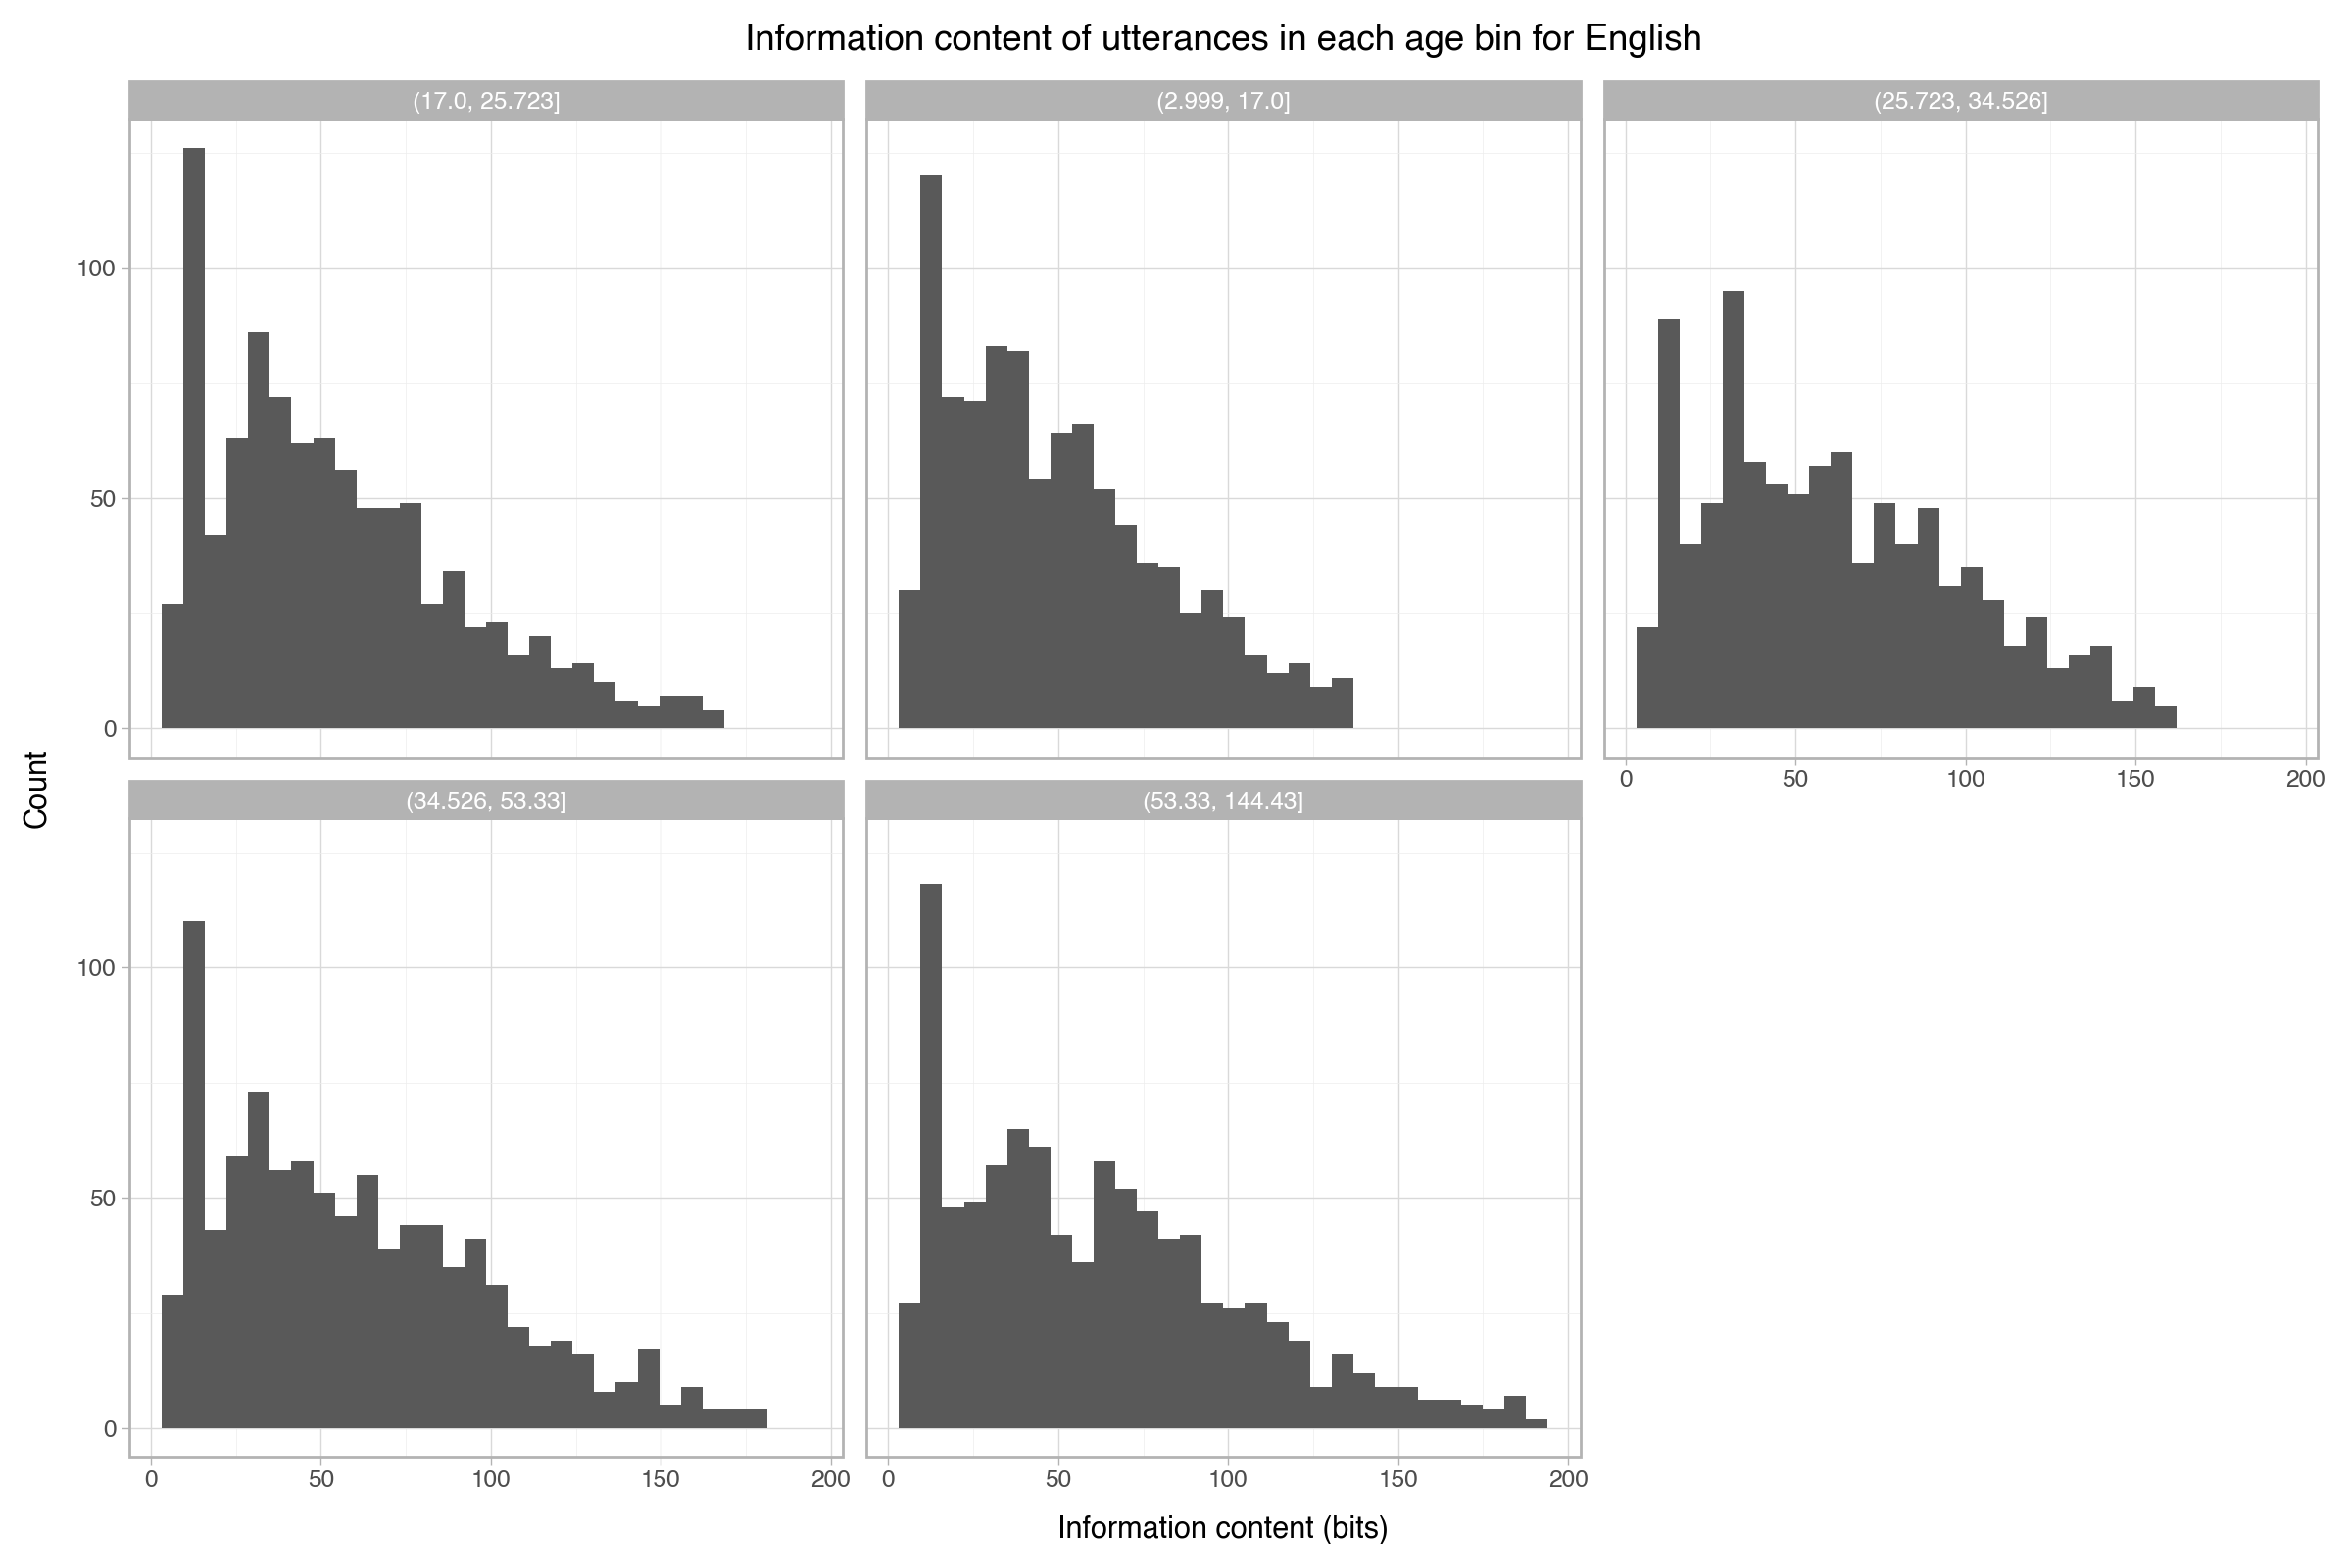

In [31]:
# Calculate the information content of each utterance in each age bin
information_content = {}
for age_bin in age_bins:
    lines = list(english[english['age_bin'] == age_bin]['phonemized_utterance'])
    lines = [line.replace(' WORD_BOUNDARY', '') for line in lines]
    np.random.shuffle(lines)
    lines = lines[:1000]
    information = [word_information(line, 'English') for line in lines]
    if len(information) > 0:
        information_content[age_bin] = information

# Remove top 5% of information content values for each age bin
for age_bin in information_content:
    percentile = np.percentile(information_content[age_bin], 95)
    information_content[age_bin] = [i for i in information_content[age_bin] if i <= percentile]

information_content = pd.DataFrame({'age_bin': [str(age_bin) for age_bin in information_content for _ in information_content[age_bin]],
                                    'information': [info for infos in information_content.values() for info in infos]})

p = (p9.ggplot(information_content, p9.aes(x='age_bin', y='information'))
        + p9.geom_boxplot()
        #+ p9.coord_flip()
        + p9.theme(figure_size=(12, 8))
        + p9.ggtitle('Information content of utterances in each age bin for English')
        + p9.xlab('Age bin')
        + p9.ylab('Information content (bits)')
    )

p.show()

# Now plot as separate histograms for each age bin

p = (p9.ggplot(information_content, p9.aes(x='information'))
        + p9.geom_histogram(bins=30)
        + p9.facet_wrap('age_bin')
        + p9.theme(figure_size=(12, 8))
        + p9.ggtitle('Information content of utterances in each age bin for English')
        + p9.xlab('Information content (bits)')
        + p9.ylab('Count')
    )

p.show()

In [41]:
bins = [0, 12, 24, 36, 48, 60, 72]

def plot_binned_information(type='utterance', column='phonemized_utterance', n_langs=10):

    bin_av_information = pd.DataFrame(columns=['language', 'bin', 'average_information'])
    bin_size = 10000

    sorted_languages = sorted(list(datasets.keys()), key=lambda x: len(datasets[x]), reverse=True)

    for language in sorted_languages[:n_langs]:
        # Get a subsample of 1000 utterances from each dataset for each bin
        dataset = datasets[language]
        binned_data = {bin : [] for bin in bins}

        # Add bin to each utterance
        dataset['bin'] = pd.cut(dataset['target_child_age'], bins=bins, labels=bins[1:])

        for bin in bins[1:]:
            if len(dataset[dataset['bin'] == bin]) < bin_size:
                binned_data[bin] = dataset[dataset['bin'] == bin]
            else:
                binned_data[bin] = dataset[dataset['bin'] == bin].sample(n=bin_size)

        # Calculate the average information content of each bin
        information_content = {bin : [] for bin in bins[1:]}
        for bin in bins[1:]:
            lines = list(binned_data[bin][column])
            if type == 'utterance':
                lines = [line.replace(' WORD_BOUNDARY', '') for line in lines]
                information_content[bin] = [word_information(line, language, type=('phoneme' if column == 'phonemized_utterance' else 'char'), bigram=False) for line in lines]
            elif type == 'mlu':
                information_content[bin] = [line.count('WORD_BOUNDARY') for line in lines]
            elif type == 'word':
                lines = [word.strip() for line in lines for word in line.split('WORD_BOUNDARY') if word.strip() != '']
                information_content[bin] = [word_information(line, language, type=('phoneme' if column == 'phonemized_utterance' else 'char'), bigram=False) for line in lines]
            
        for bin in information_content:
            if len(information_content[bin]) > 1000:
                bin_av_information.loc[len(bin_av_information)] = [language, bin, np.mean(information_content[bin])]

    x_labels = [f'{bin - 12} - {bin}' for bin in bins[1:]]

    # Use seaborn rocket theme for plotnine colors
    colors = sns.color_palette('rocket', n_colors=n_langs)


    p = (p9.ggplot(bin_av_information, p9.aes(x='bin', y='average_information', color='language'))
            + p9.geom_point(p9.aes(shape='language'), size=10)
            + p9.geom_line(p9.aes(group='language'), size=2)
            + p9.scale_x_continuous(breaks=bins[1:], labels=x_labels)
            + p9.theme(figure_size=(12, 8), axis_text=p9.element_text(size=25), axis_title=p9.element_text(size=25), legend_title=p9.element_text(size=25), legend_text=p9.element_text(size=25))
            #+ p9.scale_color_manual(values=colors)
            + p9.xlab('Child age (months)')
            + p9.ylab('Average information content (bits/utterance)')
        )

    p.show()


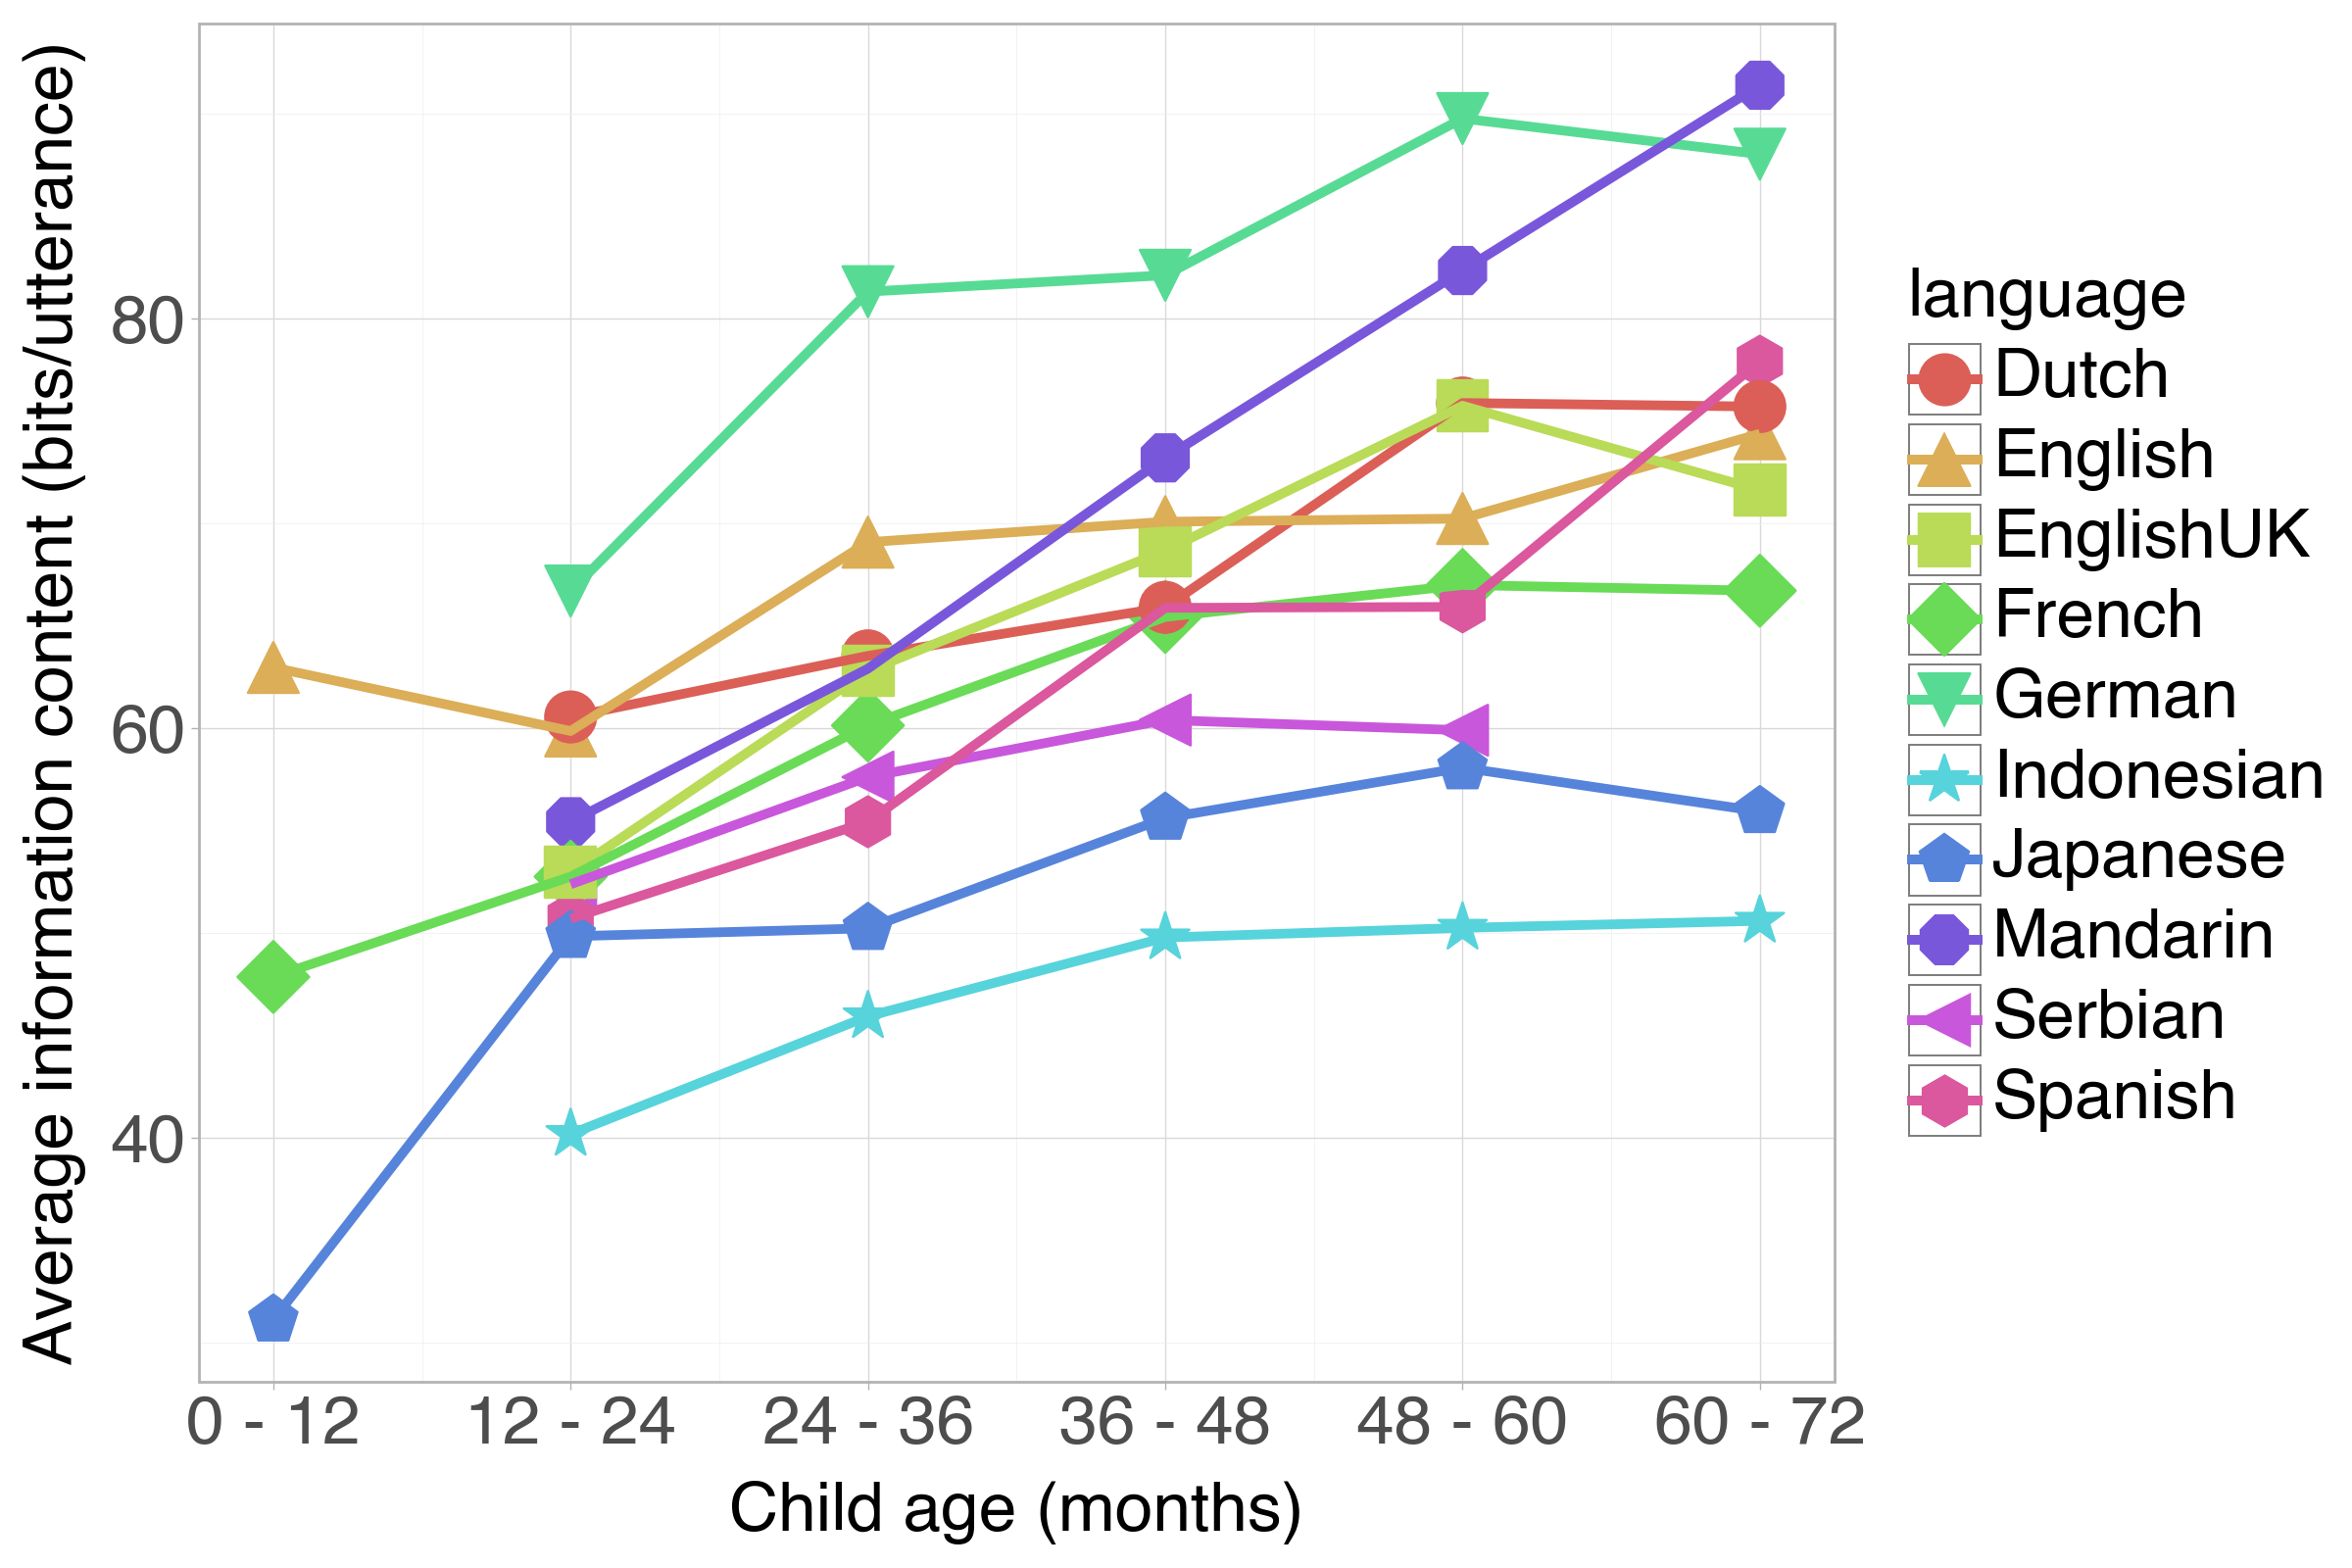

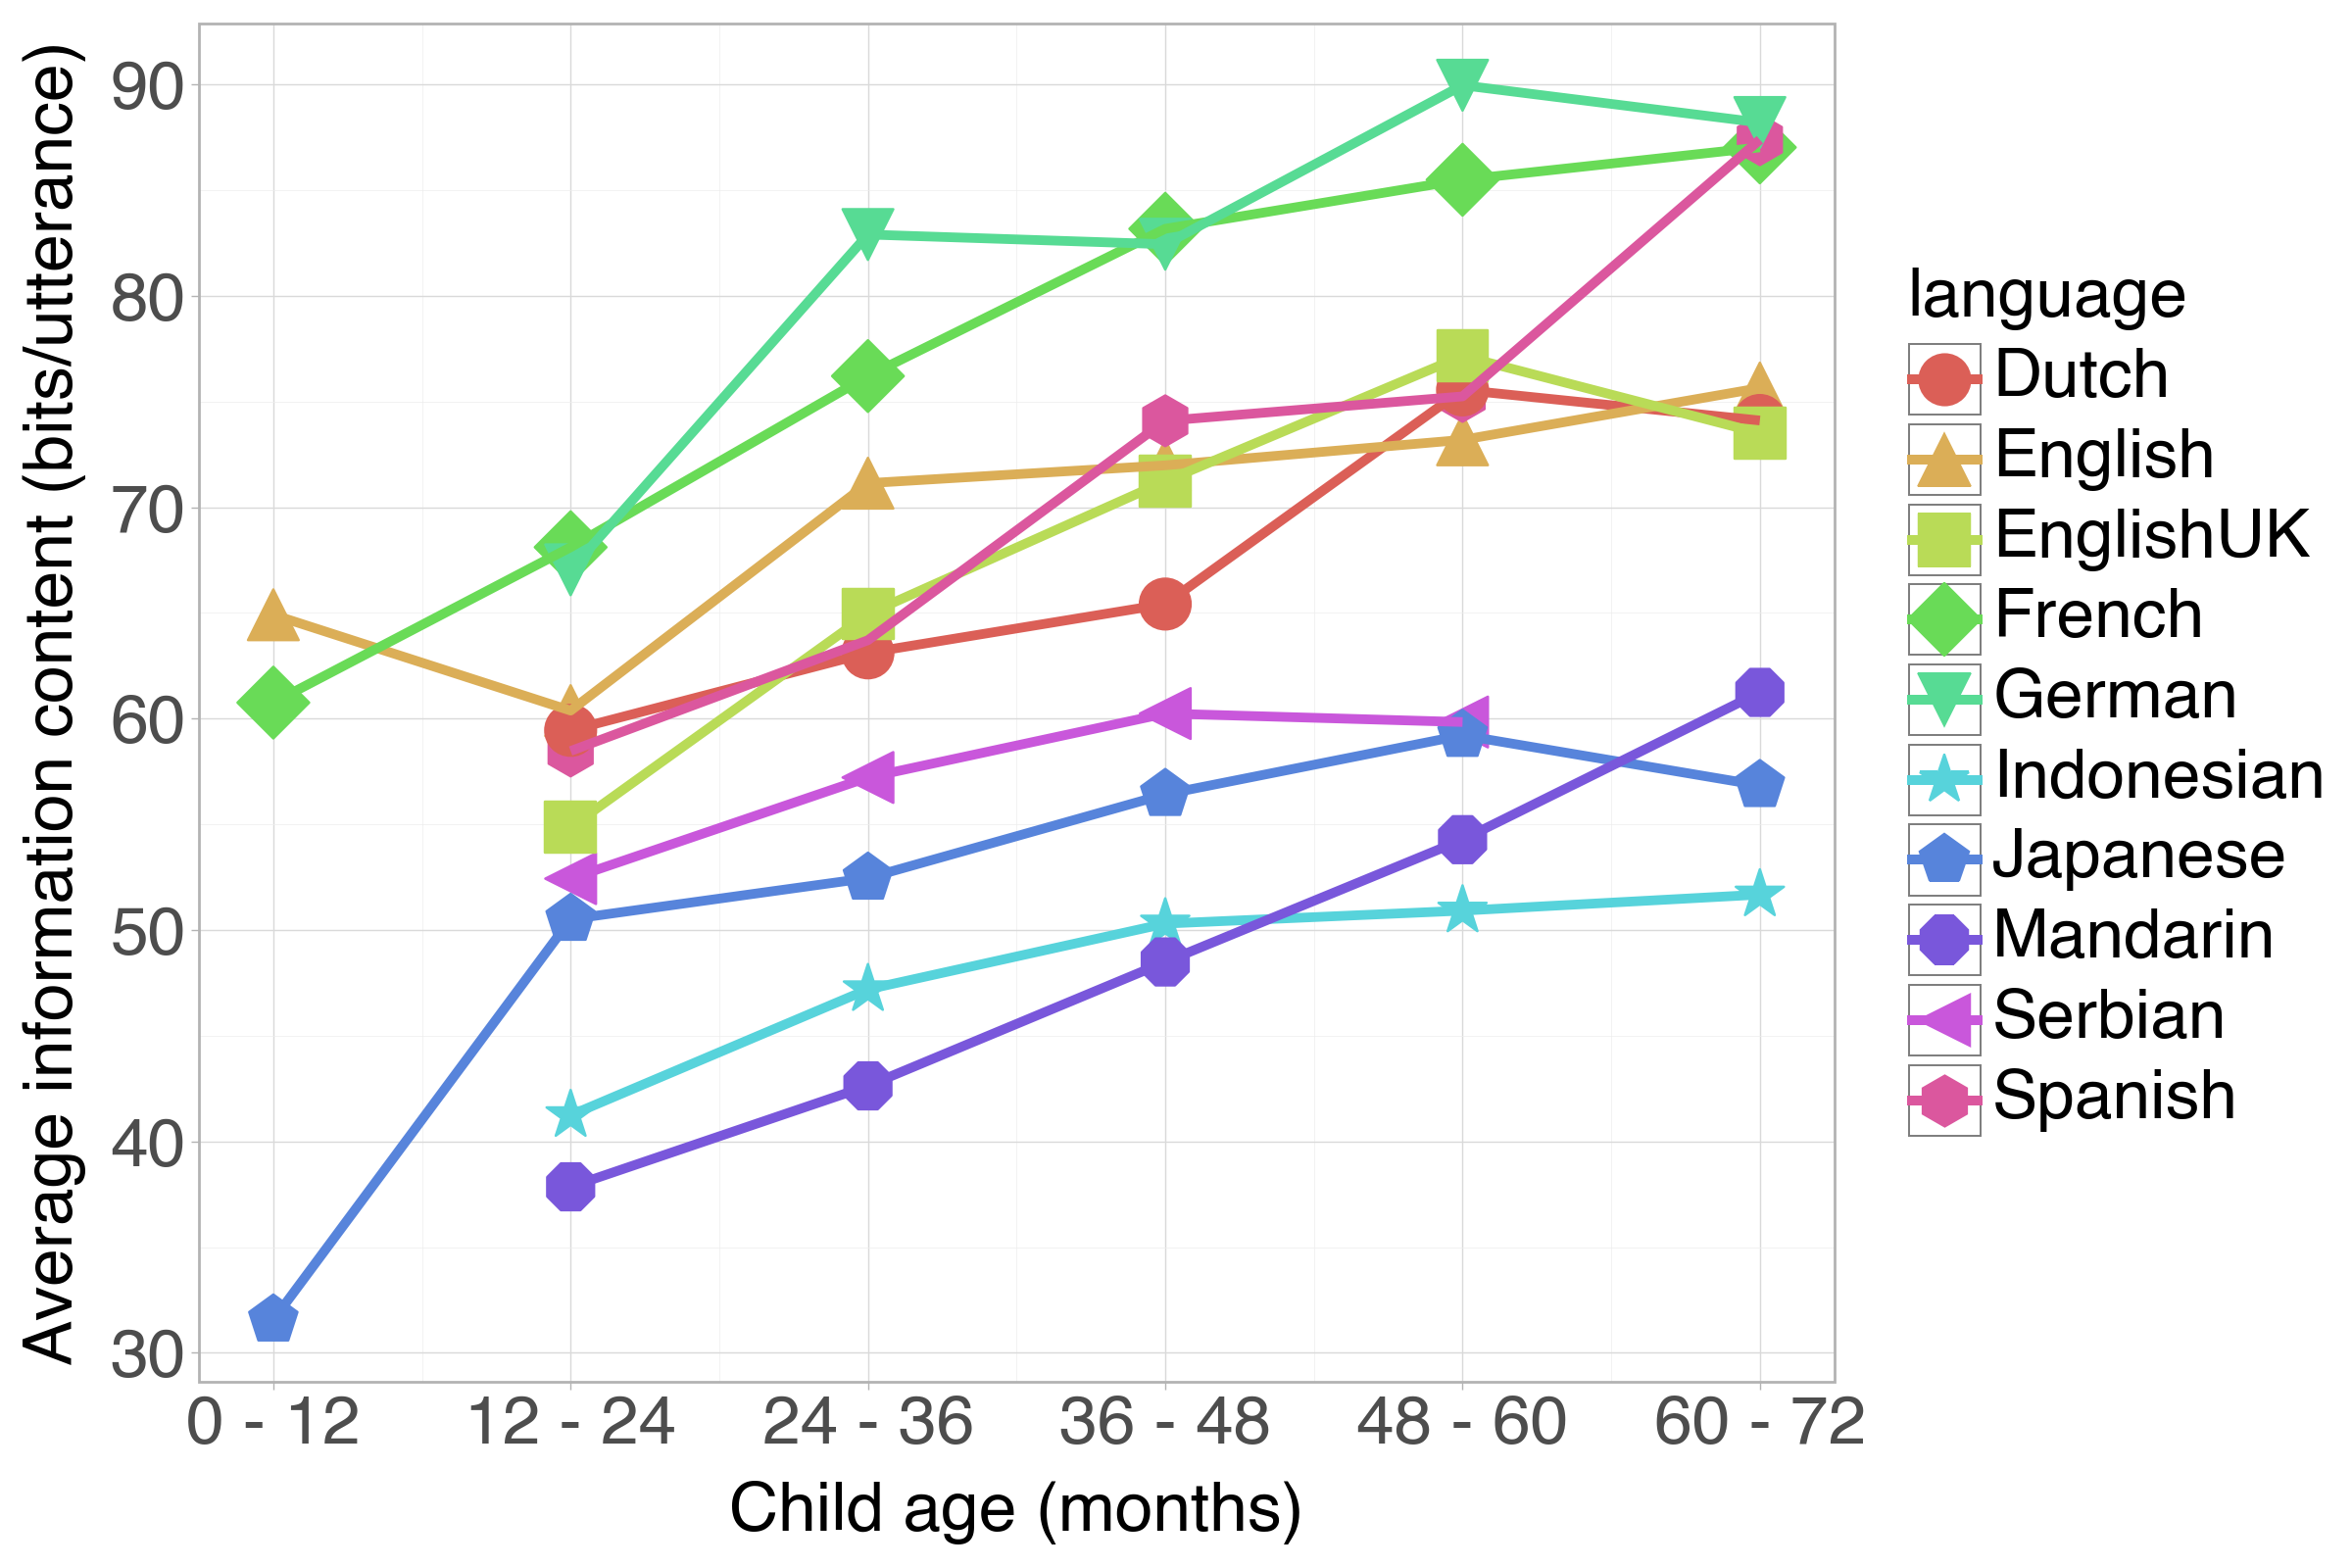

In [42]:
plot_binned_information('utterance')
plot_binned_information('utterance', 'character_split_utterance')

100%|██████████| 31/31 [00:01<00:00, 20.24it/s]


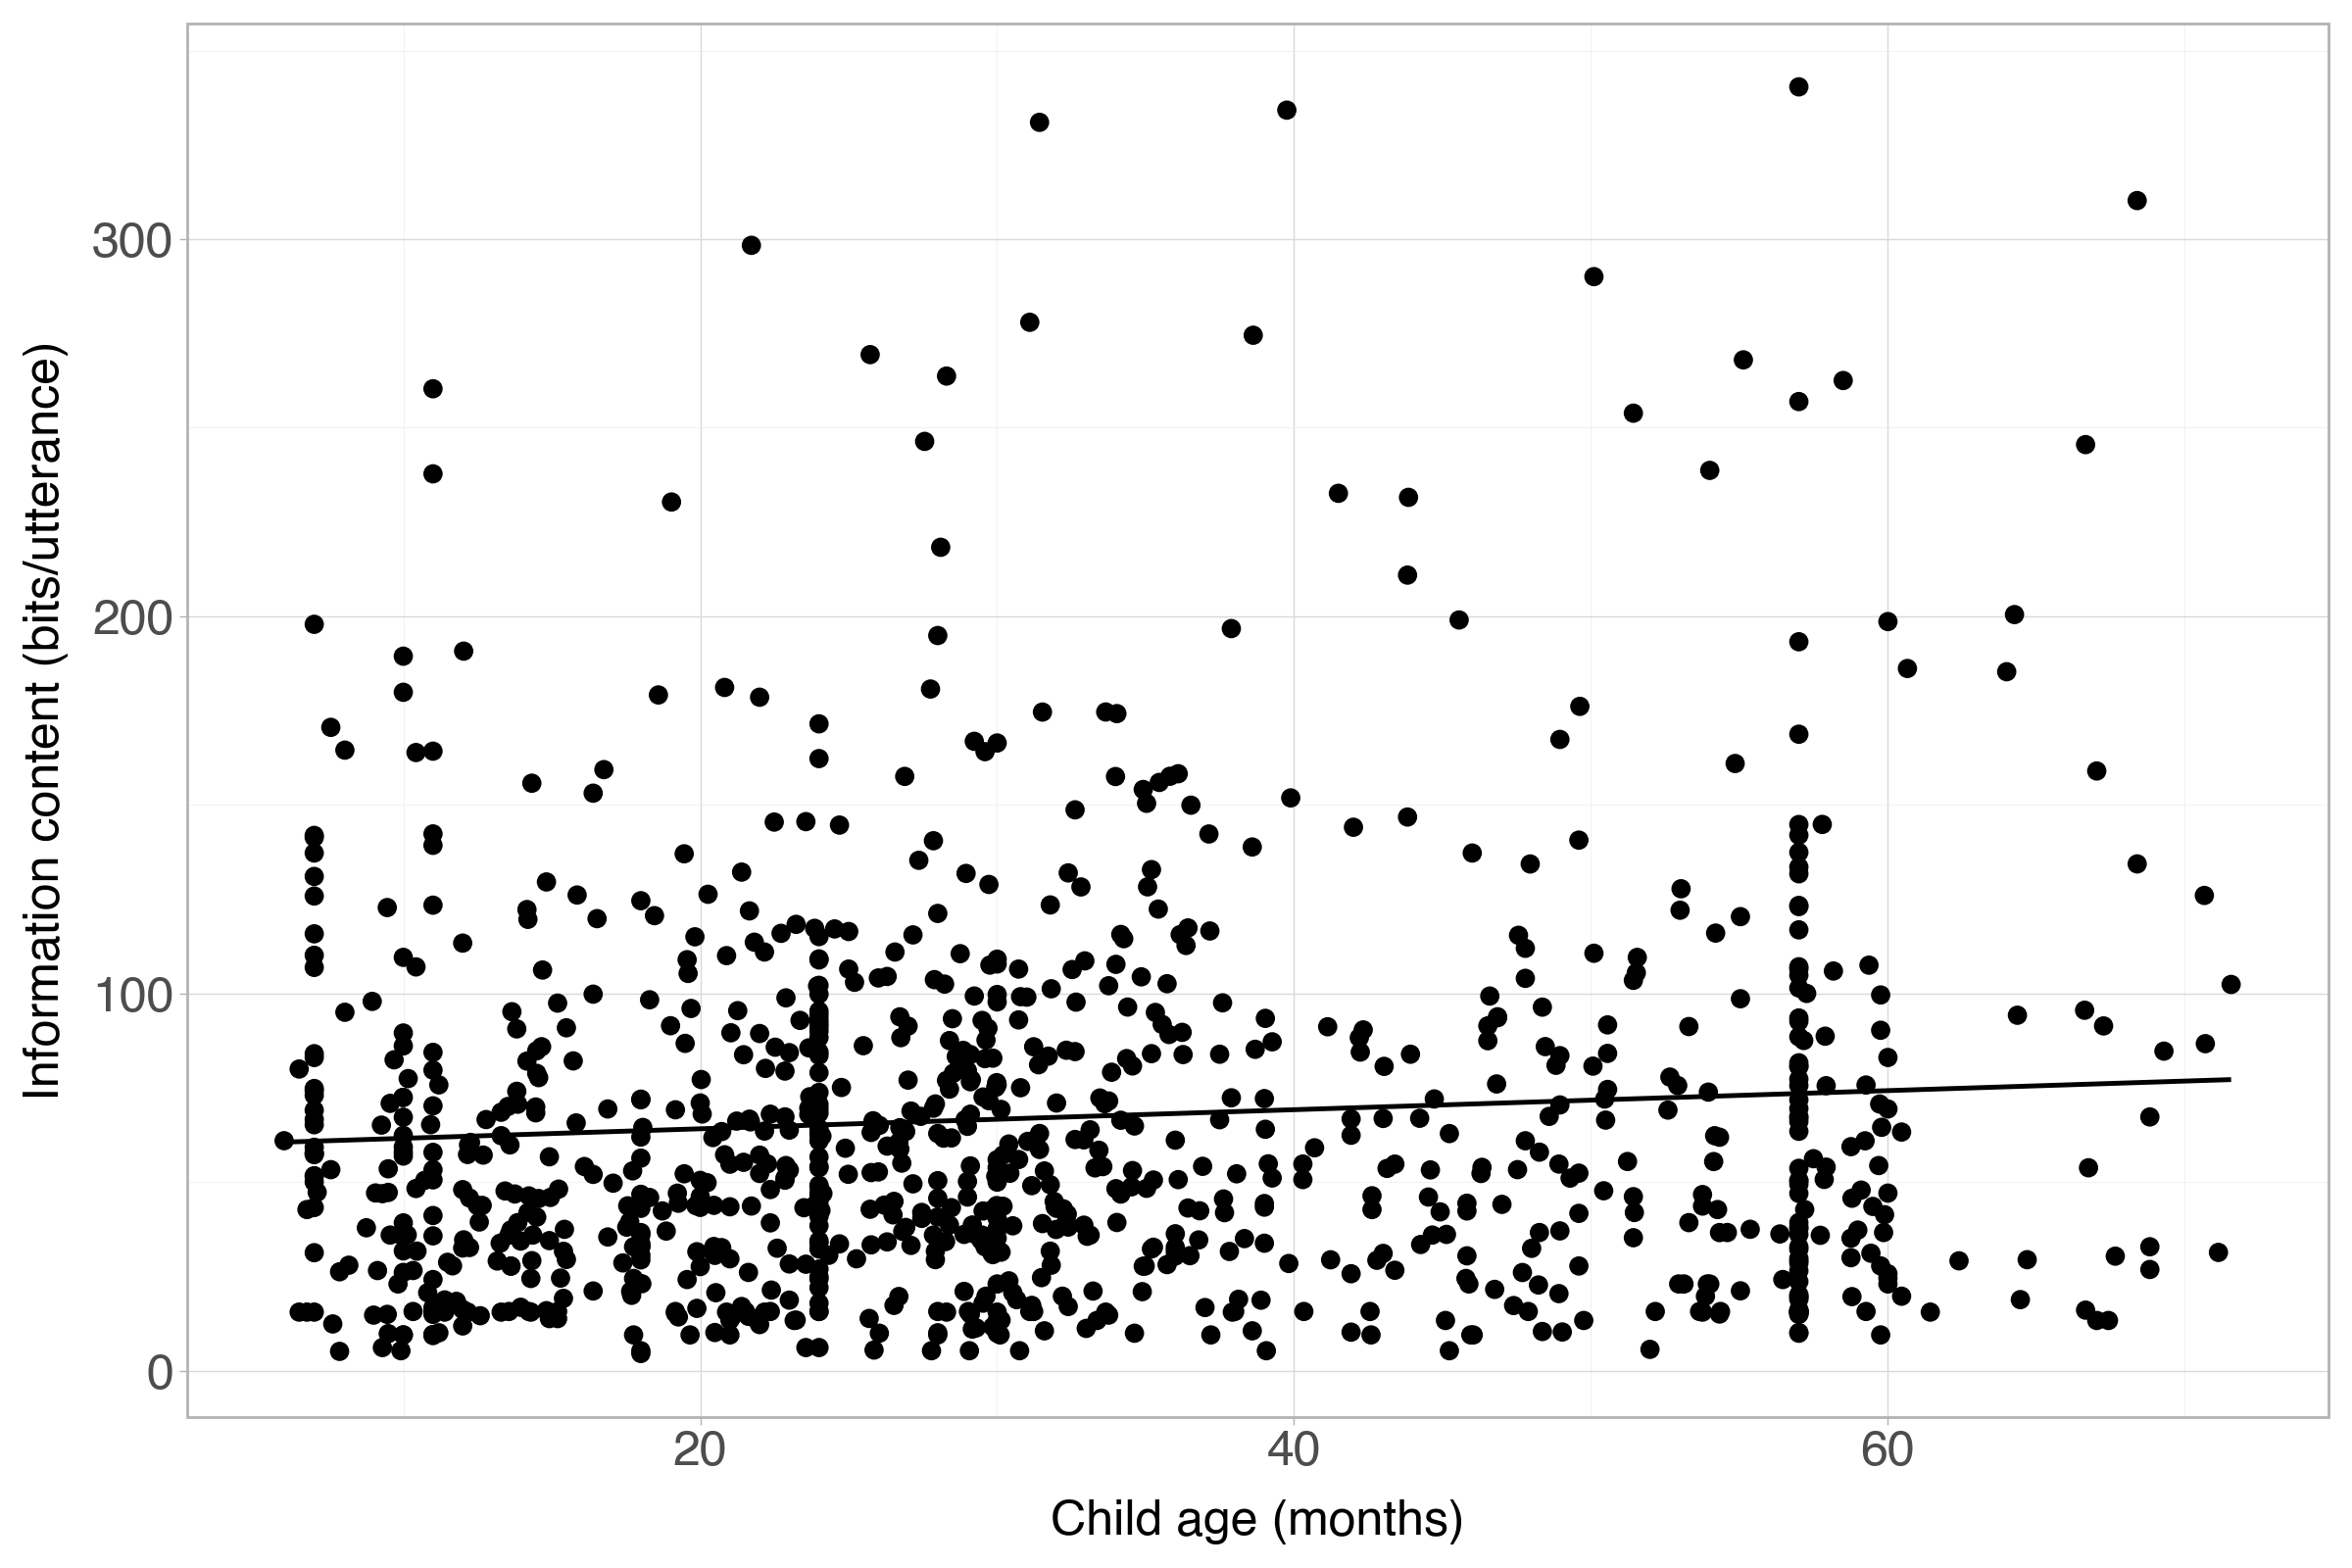

In [34]:
# Get correlation between age and information content for each language
correlations = pd.DataFrame(columns=['language', 'correlation'])

for language in tqdm(datasets):
    dataset = datasets[language]

    dataset = dataset[['target_child_age', 'phonemized_utterance']]
    dataset = dataset[dataset['target_child_age'] < 72].sample(1000)

    # Calculate the information content of each utterance
    dataset['information_content'] = [word_information(line, language) for line in dataset['phonemized_utterance']]

    # Get correlation
    correlation = dataset['target_child_age'].corr(dataset['information_content'])
    correlations.loc[len(correlations)] = [language, correlation]

correlations

# Plot target_child_age against information_content for English

english_dataset = datasets['English']
english_dataset = english_dataset[english_dataset['target_child_age'] < 72].sample(1000)
english_dataset['information_content'] = [word_information(line, 'English') for line in english_dataset['phonemized_utterance']]
english_dataset = english_dataset[['target_child_age', 'information_content']]

p = (p9.ggplot(english_dataset, p9.aes(x='target_child_age', y='information_content'))
        + p9.geom_point(size=3)
        + p9.geom_smooth(method='lm', se=False)
        + p9.theme(figure_size=(12, 8), axis_text=p9.element_text(size=18), axis_title=p9.element_text(size=18), legend_title=p9.element_text(size=18), legend_text=p9.element_text(size=18))
        + p9.xlab('Child age (months)')
        + p9.ylab('Information content (bits/utterance)')
    )

p.show()


# Zipf's law

In [35]:
rank_data = {}

for language, dataset in datasets.items():
    lines = list(dataset['phonemized_utterance'])
    np.random.shuffle(lines)
    lines = lines[:10000]
    if len(lines) != 10000:
        print(f'Warning: {language} has less than 10000 utterances')
    words = [word.strip() for line in lines for word in line.split('WORD_BOUNDARY') if word.strip() != '']
    if len(words) < 10000:
        print(f'Warning: {language} has less than 10000 words')

    rank_data[language] = pd.DataFrame(columns=['rank', 'count'])
    for i in range(10):
        np.random.shuffle(words)
        sample_words = words[:10000]
        word_counts = pd.Series(sample_words).value_counts()
        word_counts.sort_values(ascending=False, inplace=True)
        ranks = np.arange(1, len(word_counts) + 1)
        # Create map of rank to word_count
        rank_data[language] = pd.concat([rank_data[language], pd.DataFrame({'rank': ranks, 'count': word_counts.values})])


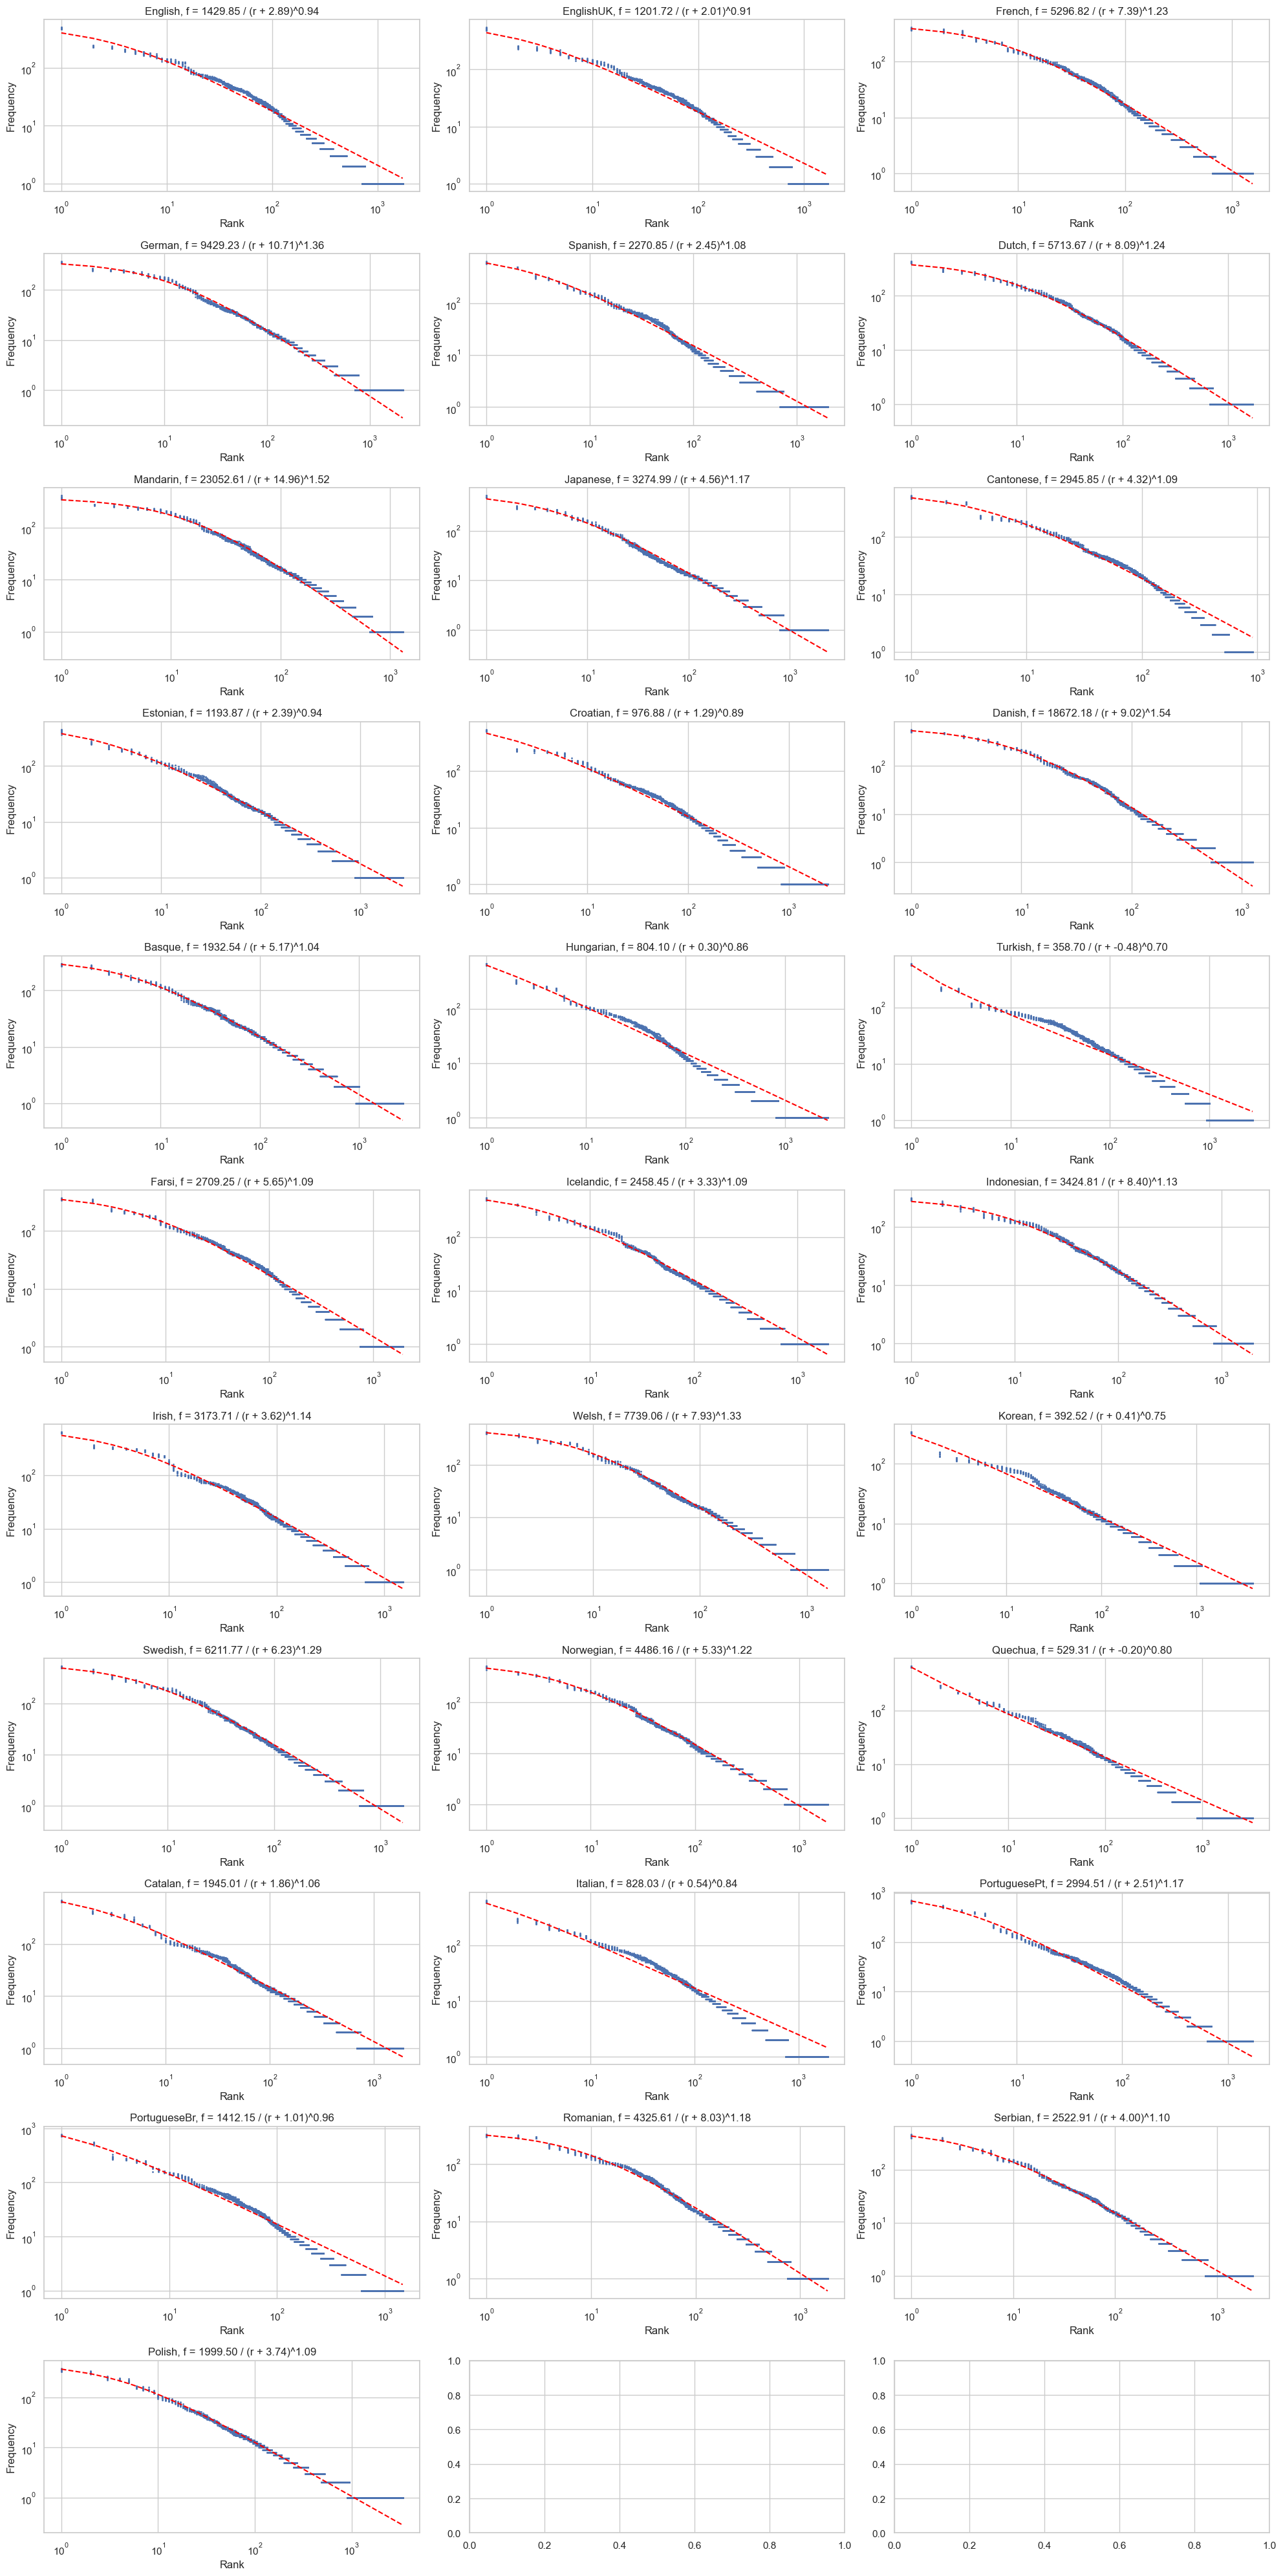

In [36]:
# Find a fit for Zipf's law

def zipf_law(x, a, b, c):
    return c / np.power((x + b), a)

def get_zipf_parameters(language):
    grouped_freqs = pd.DataFrame({
        'rank': rank_data[language]['rank'],
        'frequency': rank_data[language]['count']
    }).groupby('rank')['frequency'].mean()
    
    # Convert to arrays for curve_fit
    x_data = np.array(grouped_freqs.index)
    y_data = np.array(grouped_freqs.values)

    popt, pcov = curve_fit(zipf_law, x_data, y_data, bounds=([0.5, -1, 0], [np.inf, np.inf, np.inf]))
    a, b, c = popt
    return a, b, c

zipf_parameters = {language : get_zipf_parameters(language) for language in rank_data}

def plot_zipf(language):

    a, b, c = zipf_parameters[language]

    p = (p9.ggplot(pd.DataFrame({'ranks': rank_data[language]['rank'], 'counts': rank_data[language]['count']}), p9.aes(x='ranks', y='counts'))
            + p9.geom_point()
            + p9.geom_line(p9.aes(y=zipf_law(ranks[language], a, b, c)), color='red')
            + p9.theme(figure_size=(6, 4))
            + p9.ggtitle(f'Zipf\'s law for {language}, f = {c:.2f} / (r + {b:.2f})^{a:.2f}')
            + p9.xlab('Rank')
            + p9.ylab('Frequency')
        )
    
    # # Add labels next to top 10 words
    # top_words = word_counts.head(3)
    # for word, count in top_words.items():
    #     rank = ranks[language][word_counts.index.get_loc(word)]
    #     word_text = ''.join(word.split(' '))
    #     p += p9.annotate('text', x=rank, y=count, label=word_text, nudge_x=12, nudge_y=0.5, size=12)
    
    p.show()

def plot_all_zipf():
    # Plot as one big figure with subplots
    n_languages = len(rank_data)
    n_cols = 3

    n_rows = n_languages // n_cols
    if n_languages % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))
    axes = axes.flatten()

    for i, (language, ranks) in enumerate(rank_data.items()):
        a, b, c = zipf_parameters[language]
        unique_ranks = ranks['rank'].unique()
        ax = axes[i]
        # Plot a scatter plot of rank vs frequency
        ax.scatter(ranks['rank'], ranks['count'], s=1)
        ax.plot(unique_ranks, zipf_law(unique_ranks, a, b, c), color='red', linestyle='--')
        ax.set_title(f'{language}, f = {c:.2f} / (r + {b:.2f})^{a:.2f}')
        ax.set_xlabel('Rank')
        ax.set_ylabel('Frequency')
        ax.set_xscale('log')
        ax.set_yscale('log')

    plt.tight_layout()

    plt.show()

plot_all_zipf()

In [37]:
def plot_zipf(language):

    a, b, c = zipf_parameters[language]

    p = (p9.ggplot(pd.DataFrame({'ranks': rank_data[language]['rank'], 'counts': rank_data[language]['count']}))
            + p9.geom_point()
            + p9.geom_line(p9.aes(y=zipf_law(ranks[language], a, b, c)), color='red')
            + p9.theme(figure_size=(6, 4))
            + p9.ggtitle(f'Zipf\'s law for {language}, f = {c:.2f} / (r + {b:.2f})^{a:.2f}')
            + p9.xlab('Rank')
            + p9.ylab('Frequency')
        )
    
    # # Add labels next to top 10 words
    # top_words = word_counts.head(3)
    # for word, count in top_words.items():
    #     rank = ranks[language][word_counts.index.get_loc(word)]
    #     word_text = ''.join(word.split(' '))
    #     p += p9.annotate('text', x=rank, y=count, label=word_text, nudge_x=12, nudge_y=0.5, size=12)
    
    p.show()

In [38]:
# Print table of Zipf's law parameters

zipf_table = pd.DataFrame(columns=['language', 'a', 'b', 'c'])
zipf_table.set_index('language', inplace=True)
zipf_table.index.name = 'language'

for language in zipf_parameters:
    a, b, c = zipf_parameters[language]
    zipf_table.loc[language] = [a, b, c]

zipf_table


a          b             c
language                                       
English       0.944148   2.892131   1429.846145
EnglishUK     0.907327   2.009644   1201.722304
French        1.225116   7.387451   5296.817530
German        1.362239  10.714342   9429.227427
Spanish       1.080865   2.451498   2270.851703
Dutch         1.240509   8.092597   5713.667687
Mandarin      1.521715  14.958834  23052.613220
Japanese      1.172539   4.557048   3274.988966
Cantonese     1.085430   4.319468   2945.847978
Estonian      0.942145   2.388034   1193.870719
Croatian      0.893109   1.292571    976.877487
Danish        1.535639   9.017479  18672.179494
Basque        1.043163   5.165576   1932.538718
Hungarian     0.863367   0.302150    804.100339
Turkish       0.698241  -0.484254    358.704380
Farsi         1.085771   5.654914   2709.250064
Icelandic     1.088281   3.325850   2458.448861
Indonesian    1.126324   8.397095   3424.813046
Irish         1.141176   3.617211   3173.712124
Welsh         1.330906   7.933127   7739.062774
Korean        0.745744   0.412886    392.523779
Swedish       1.285064   6.229342   6211.768203
Norwegian     1.223604   5.329514   4486.157115
Quechua       0.798771  -0.203651    529.305244
Catalan       1.055133   1.862557   1945.006074
Italian       0.840233   0.535157    828.025120
PortuguesePt  1.173381   2.508761   2994.512716
PortugueseBr  0.957364   1.014380   1412.146220
Romanian      1.178962   8.031827   4325.609054
Serbian       1.100230   3.999382   2522.907244
Polish        1.090734   3.736625   1999.500552

In [39]:
zipf_table['family'] = [families[language] for language in zipf_table.index]
zipf_table['classification'] = [languages_classification[language] for language in zipf_table.index]

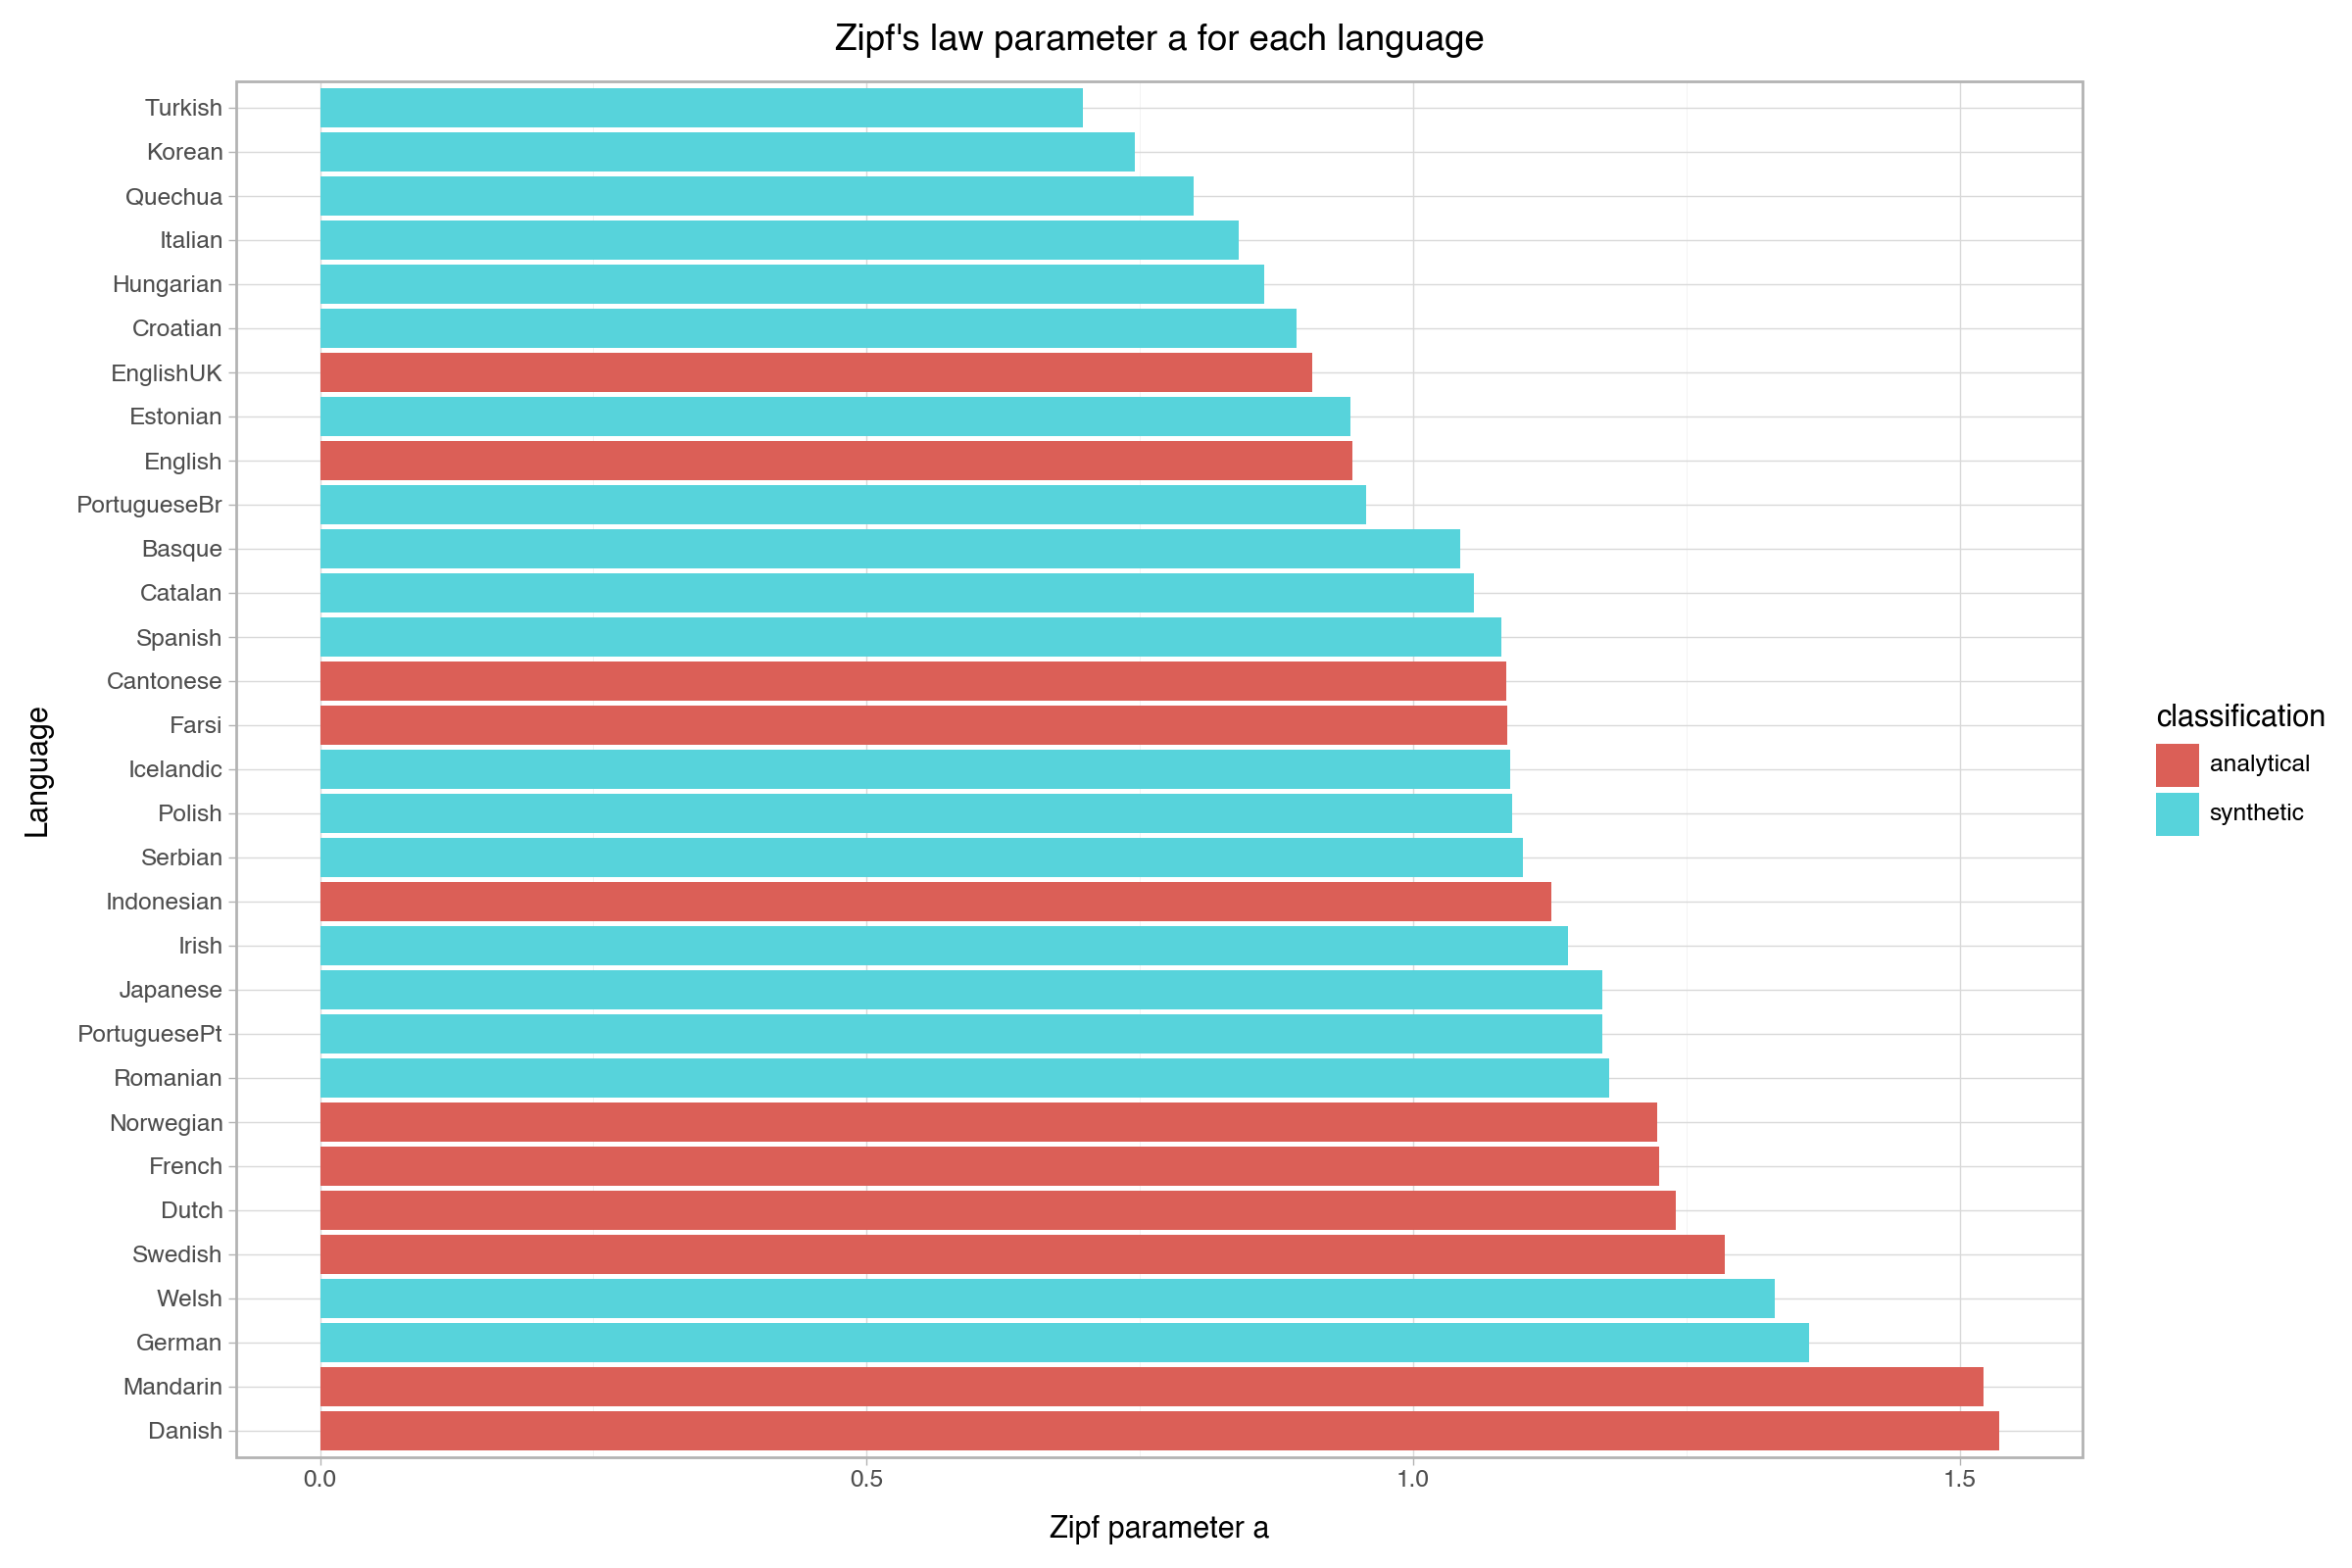

In [40]:
to_plot = zipf_table.reset_index()
to_plot = to_plot.sort_values('a', ascending=False)
to_plot['language'] = pd.Categorical(to_plot['language'], categories=to_plot['language'].tolist(), ordered=True)

p = (p9.ggplot(to_plot, p9.aes(x='language', y='a', fill='classification'))
        + p9.geom_bar(stat='identity')
        + p9.coord_flip()
        + p9.theme(figure_size=(12, 8))
        + p9.ggtitle('Zipf\'s law parameter a for each language')
        + p9.xlab('Language')
        + p9.ylab('Zipf parameter a')
    )

p.show()